In [1]:
import pandas as P
import numpy as N
import seaborn as S
import math
from matplotlib import pyplot as plt

In [2]:
S.set_theme(style='darkgrid', palette=S.color_palette('bright6'))

In [3]:
data = P.read_csv('RT_IOT2022.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [4]:
data.describe()

Unnamed: 0      id.orig_p      id.resp_p  flow_duration  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    37035.089248   34639.258738    1014.305092       3.809566   
std     30459.106367   19070.620354    5256.371994     130.005408   
min         0.000000       0.000000       0.000000       0.000000   
25%      6059.000000   17702.000000      21.000000       0.000001   
50%     33100.000000   37221.000000      21.000000       0.000004   
75%     63879.000000   50971.000000      21.000000       0.000005   
max     94658.000000   65535.000000   65389.000000   21728.335578   

        fwd_pkts_tot   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
count  123117.000000  123117.000000      123117.000000      123117.000000   
mean        2.268826       1.909509           1.471218           0.820260   
std        22.336565      33.018311          19.635196          32.293948   
min         0.000000       0.000000           0.000000           0.000000   
25%         1.000000       1.000000           1.000000           0.000000   
50%         1.000000       1.000000           1.000000           0.000000   
75%         1.000000       1.000000           1.000000           0.000000   
max      4345.000000   10112.000000        4345.000000       10105.000000   

       fwd_pkts_per_sec  bwd_pkts_per_sec  ...    active.avg    active.std  \
count      1.231170e+05      1.231170e+05  ...  1.231170e+05  1.231170e+05   
mean       3.518063e+05      3.517620e+05  ...  1.481354e+05  2.353599e+04   
std        3.707645e+05      3.708015e+05  ...  1.613007e+06  1.477935e+06   
min        0.000000e+00      0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%        7.454354e+01      7.288927e+01  ...  9.536740e-01  0.000000e+00   
50%        2.467238e+05      2.467238e+05  ...  4.053116e+00  0.000000e+00   
75%        5.242880e+05      5.242880e+05  ...  5.006790e+00  0.000000e+00   
max        1.048576e+06      1.048576e+06  ...  4.374931e+08  4.774862e+08   

           idle.min      idle.max      idle.tot      idle.avg      idle.std  \
count  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05   
mean   1.616655e+06  1.701956e+06  3.517644e+06  1.664985e+06  4.550183e+04   
std    8.809396e+06  9.252337e+06  1.229508e+08  9.007064e+06  1.091361e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.000000e+08  3.000000e+08  2.096777e+10  3.000000e+08  1.208029e+08   

       fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  
count         123117.000000         123117.000000         123117.000000  
mean            6118.905123           2739.776018            751.647514  
std            18716.313861          10018.848534           6310.183843  
min                0.000000              0.000000              0.000000  
25%               64.000000              0.000000             64.000000  
50%               64.000000              0.000000             64.000000  
75%               64.000000              0.000000             64.000000  
max            65535.000000          65535.000000          65535.000000  

[8 rows x 82 columns]

In [5]:
data.describe(include=['O'])

proto service    Attack_type
count   123117  123117         123117
unique       3      10             12
top        tcp       -  DOS_SYN_Hping
freq    110427  102861          94659

In [6]:
data.proto.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [7]:
data.service.unique()

array(['mqtt', '-', 'http', 'dns', 'ntp', 'ssl', 'dhcp', 'irc', 'ssh',
       'radius'], dtype=object)

In [8]:
data.Attack_type.unique()

array(['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb', 'ARP_poisioning',
       'DDOS_Slowloris', 'DOS_SYN_Hping', 'Metasploit_Brute_Force_SSH',
       'NMAP_FIN_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN'], dtype=object)

In [9]:
data.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [10]:
data.isnull().sum().any()

False

In [11]:
data.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [12]:
data.index

RangeIndex(start=0, stop=123117, step=1)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [14]:
catCols = ['proto', 'service', 'Attack_type']
data[catCols] = enc.fit_transform(data[catCols])
data.head()

Unnamed: 0  id.orig_p  id.resp_p  proto  service  flow_duration  \
0           0      38667       1883    1.0      5.0      32.011598   
1           1      51143       1883    1.0      5.0      31.883584   
2           2      44761       1883    1.0      5.0      32.124053   
3           3      60893       1883    1.0      5.0      31.961063   
4           4      51087       1883    1.0      5.0      31.902362   

   fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0             9             5                  3                  3  ...   
1             9             5                  3                  3  ...   
2             9             5                  3                  3  ...   
3             9             5                  3                  3  ...   
4             9             5                  3                  3  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0       0.0                 64240                 26847                   502   
1       0.0                 64240                 26847                   502   
2       0.0                 64240                 26847                   502   
3       0.0                 64240                 26847                   502   
4       0.0                 64240                 26847                   502   

   Attack_type  
0          3.0  
1          3.0  
2          3.0  
3          3.0  
4          3.0  

[5 rows x 85 columns]

<Axes: >

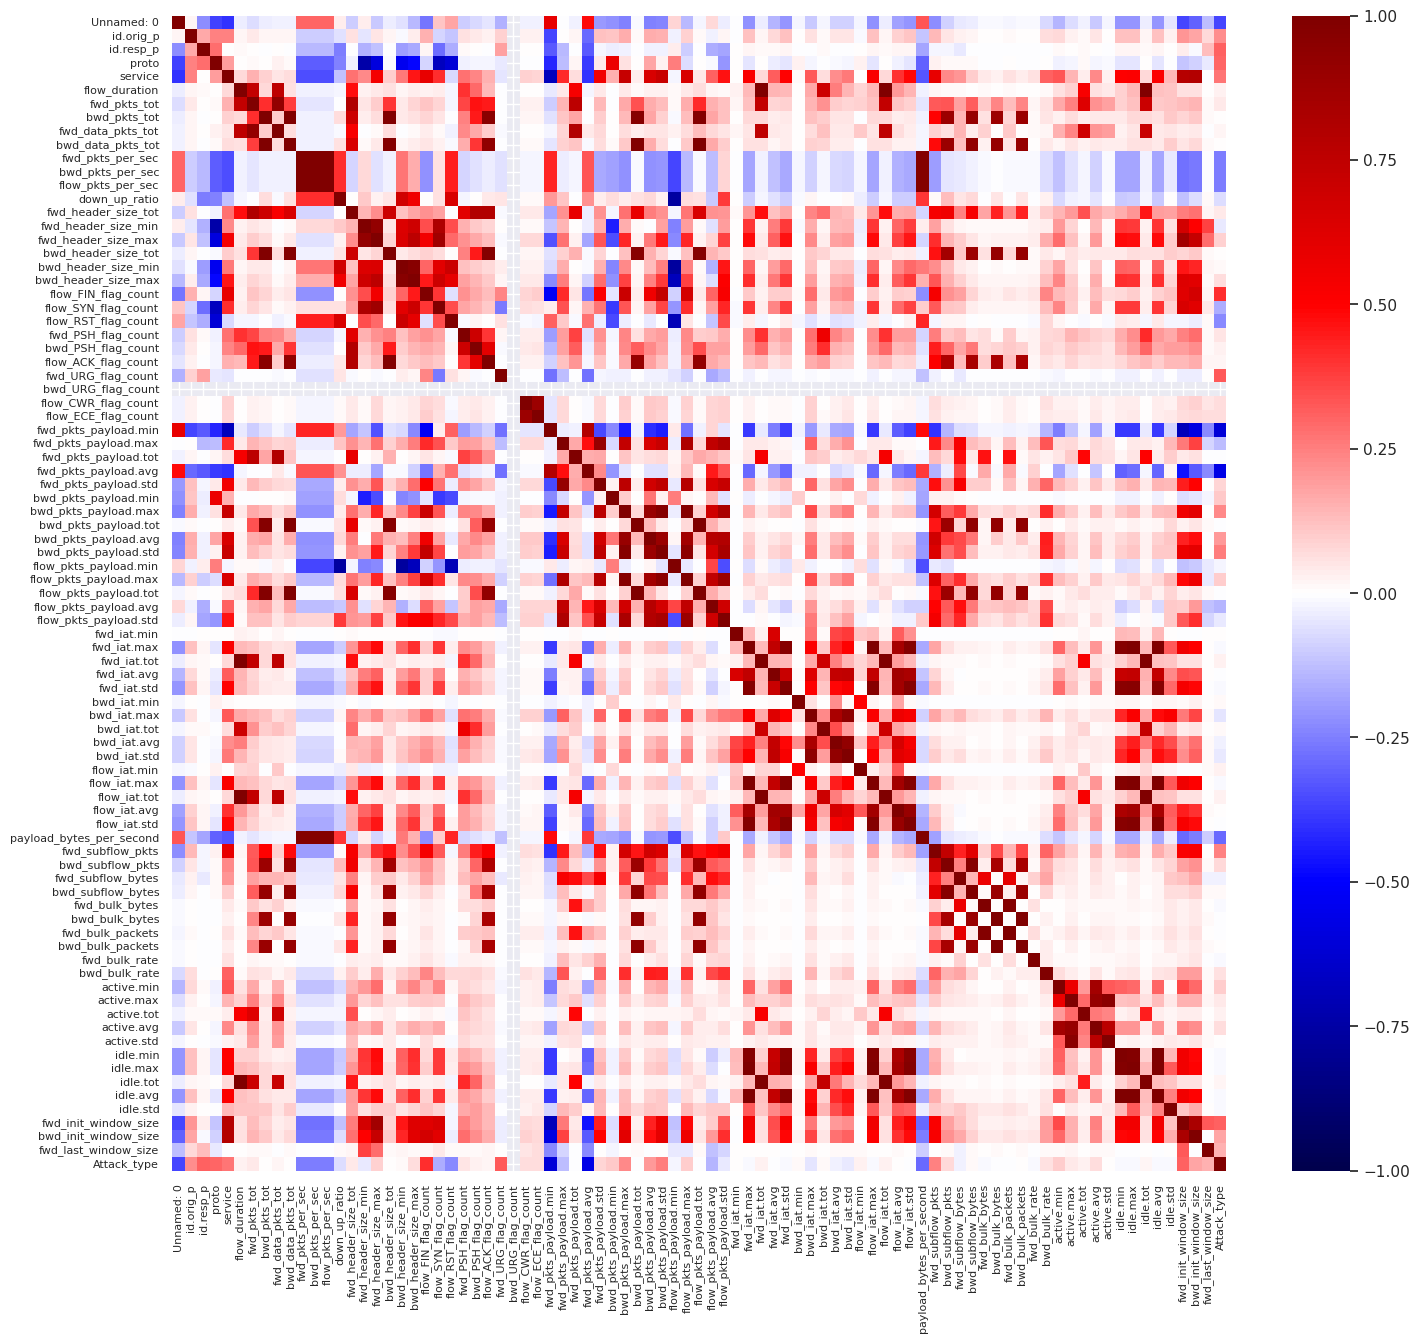

In [15]:
f , ax = plt.subplots(figsize=(17, 15))
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)
S.heatmap(data.corr(numeric_only = True),vmax=1,vmin=-1, cmap='seismic',
                xticklabels=data.columns, yticklabels=data.columns)

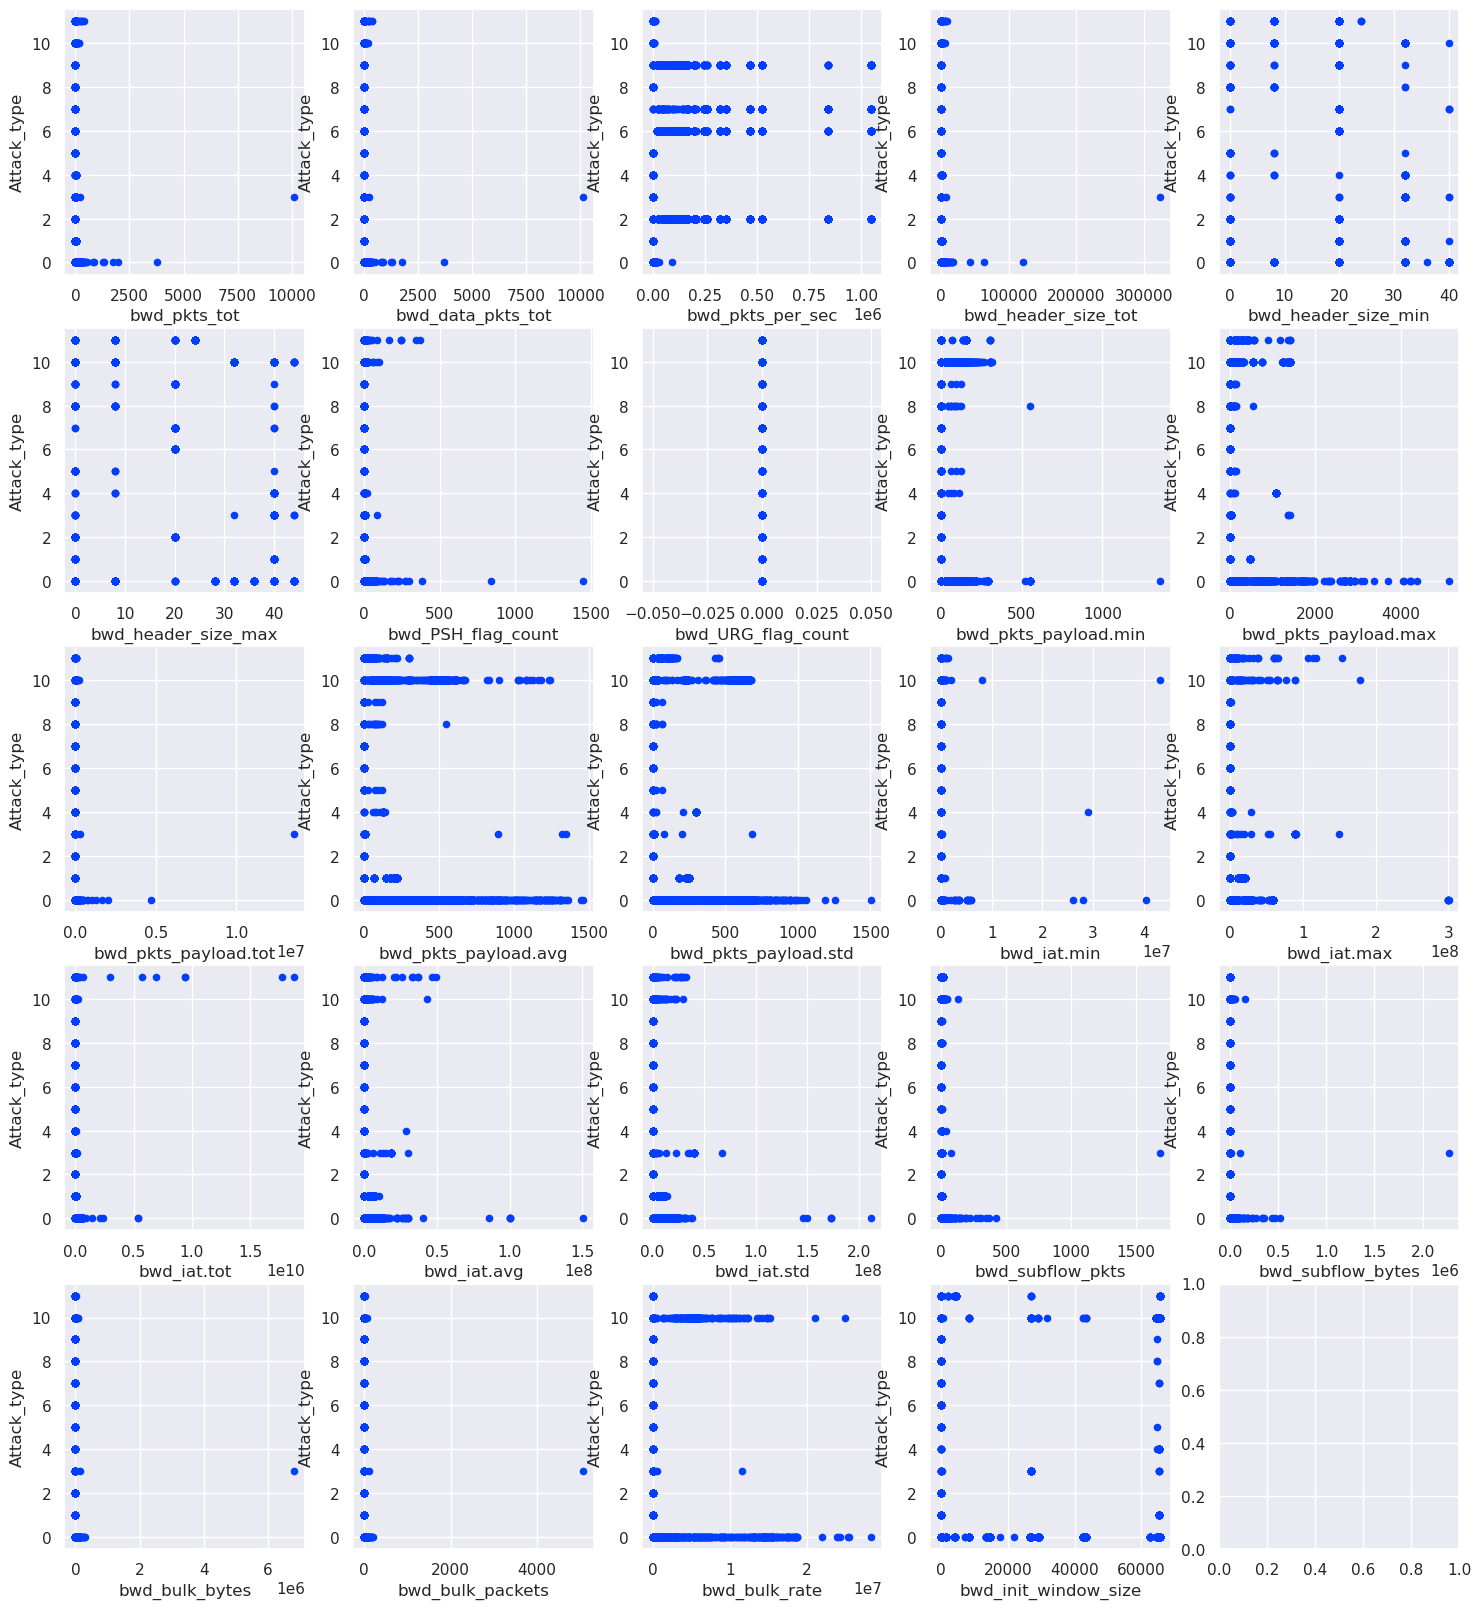

In [16]:
cols = data.filter(like="bwd").columns
nr = math.ceil(len(cols)/5)
fig, axes = plt.subplots(nrows=nr,ncols=5, figsize=(18, nr*4))

for idx, feature in enumerate(cols):
    data.plot(feature, 'Attack_type', subplots=True, kind='scatter', ax=axes[idx // 5, idx % 5])

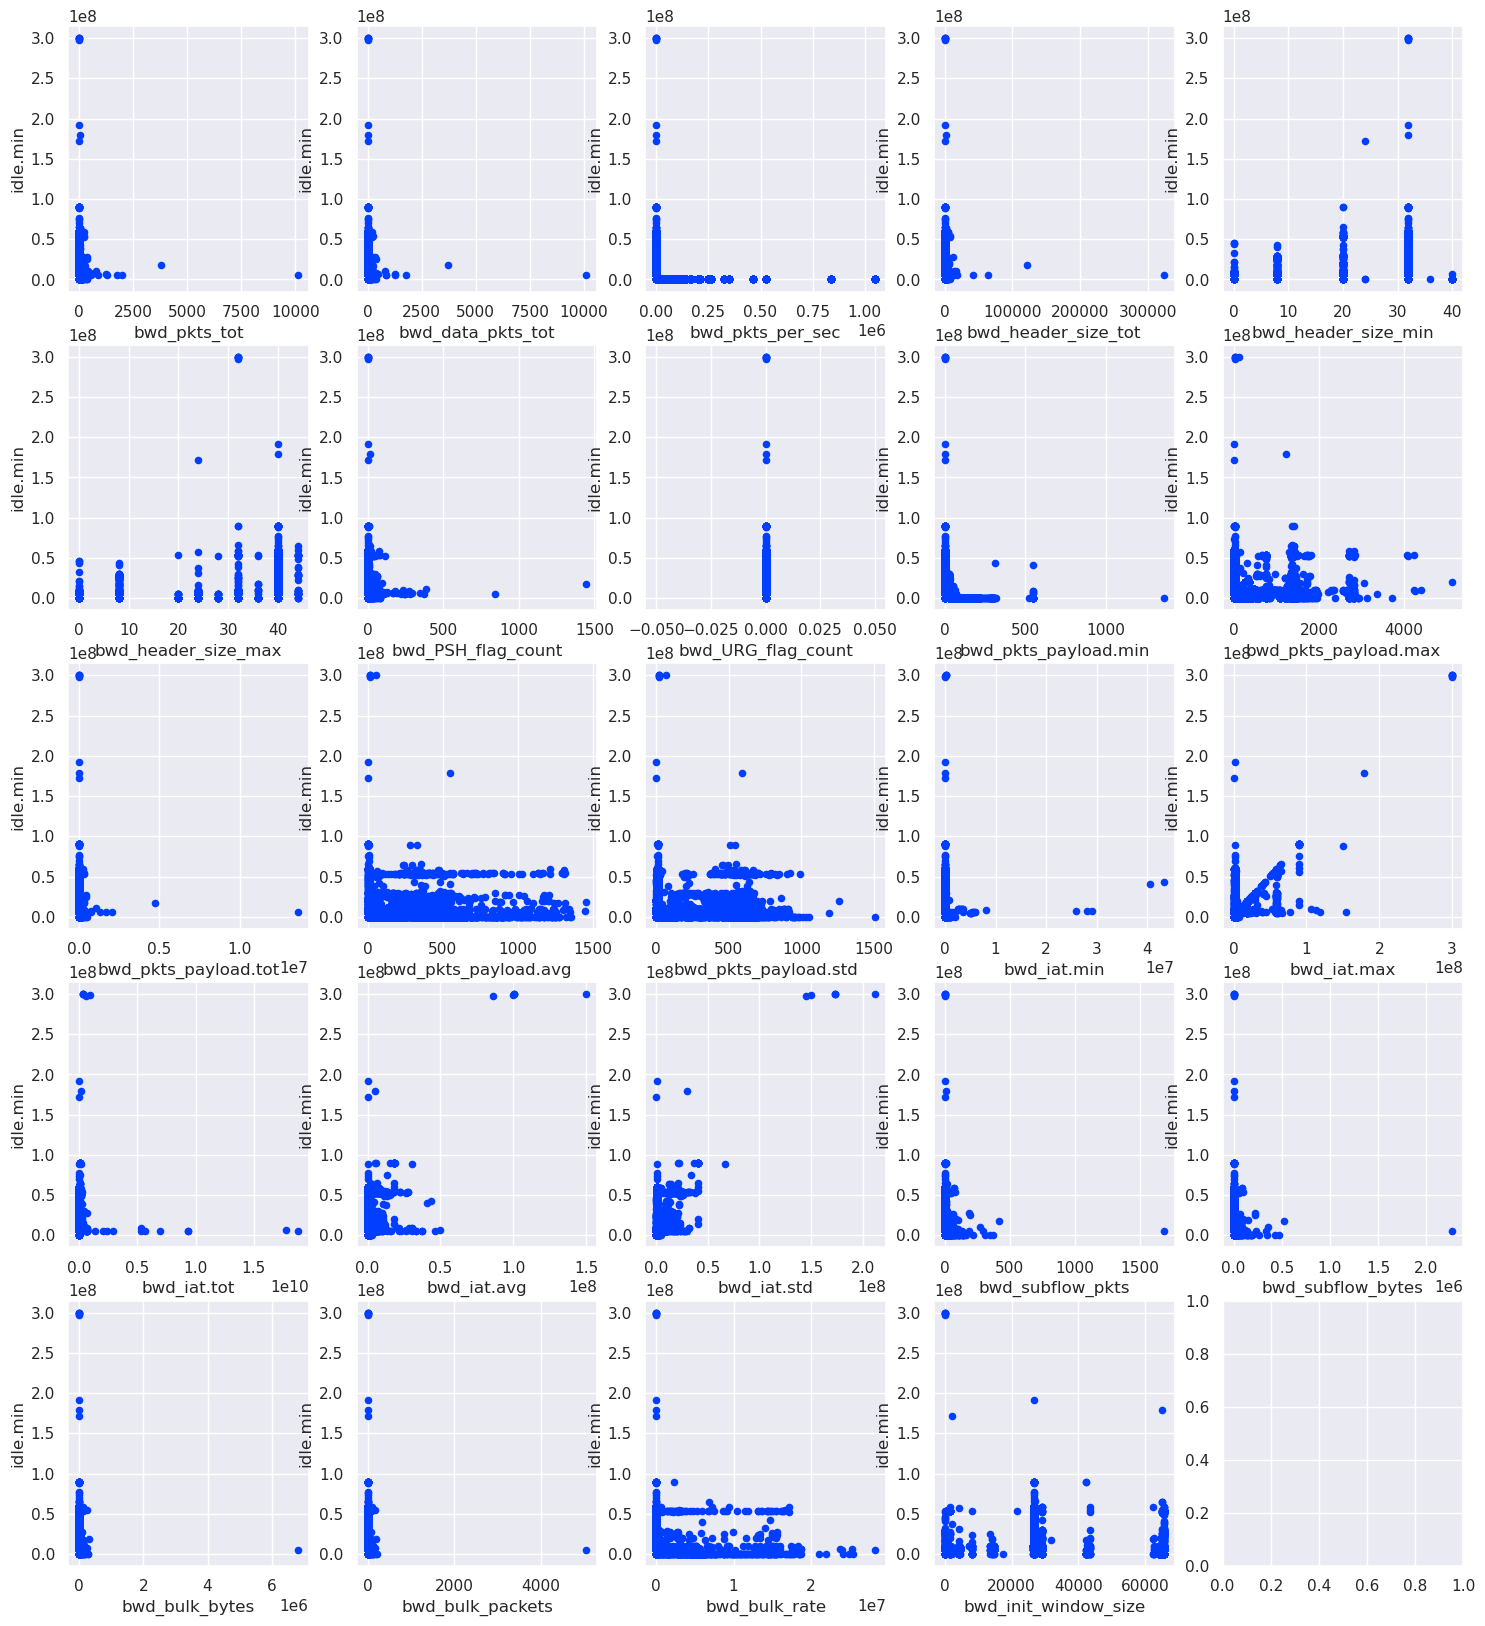

In [17]:
cols = data.filter(like="bwd").columns
nr = math.ceil(len(cols)/5)
fig, axes = plt.subplots(nrows=nr,ncols=5, figsize=(18, nr*4))

for idx, feature in enumerate(cols):
    data.plot(feature, 'idle.min', subplots=True, kind='scatter', ax=axes[idx // 5, idx % 5])

/home/cxii112/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


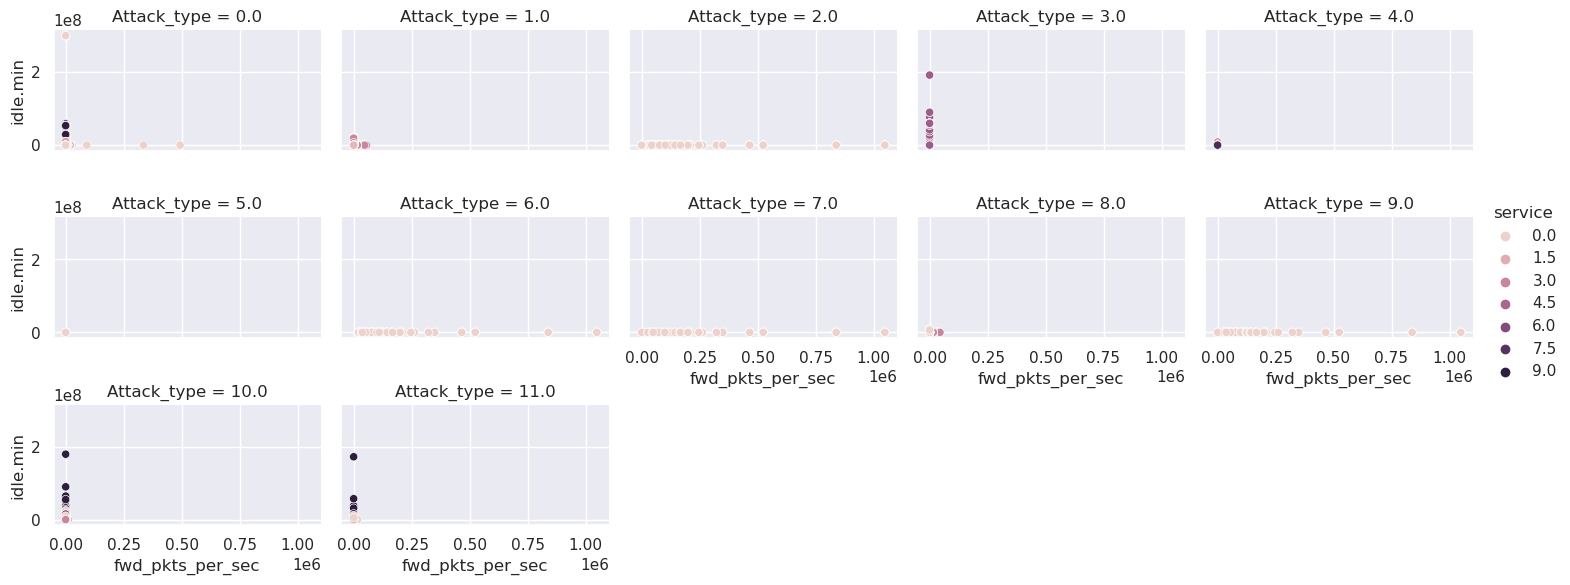

In [18]:
S.relplot(
    data=data,
    x="fwd_pkts_per_sec", y="idle.min", col="Attack_type", hue="service",
    kind="scatter", col_wrap=5, height=2, aspect=1.5, legend=True,
)

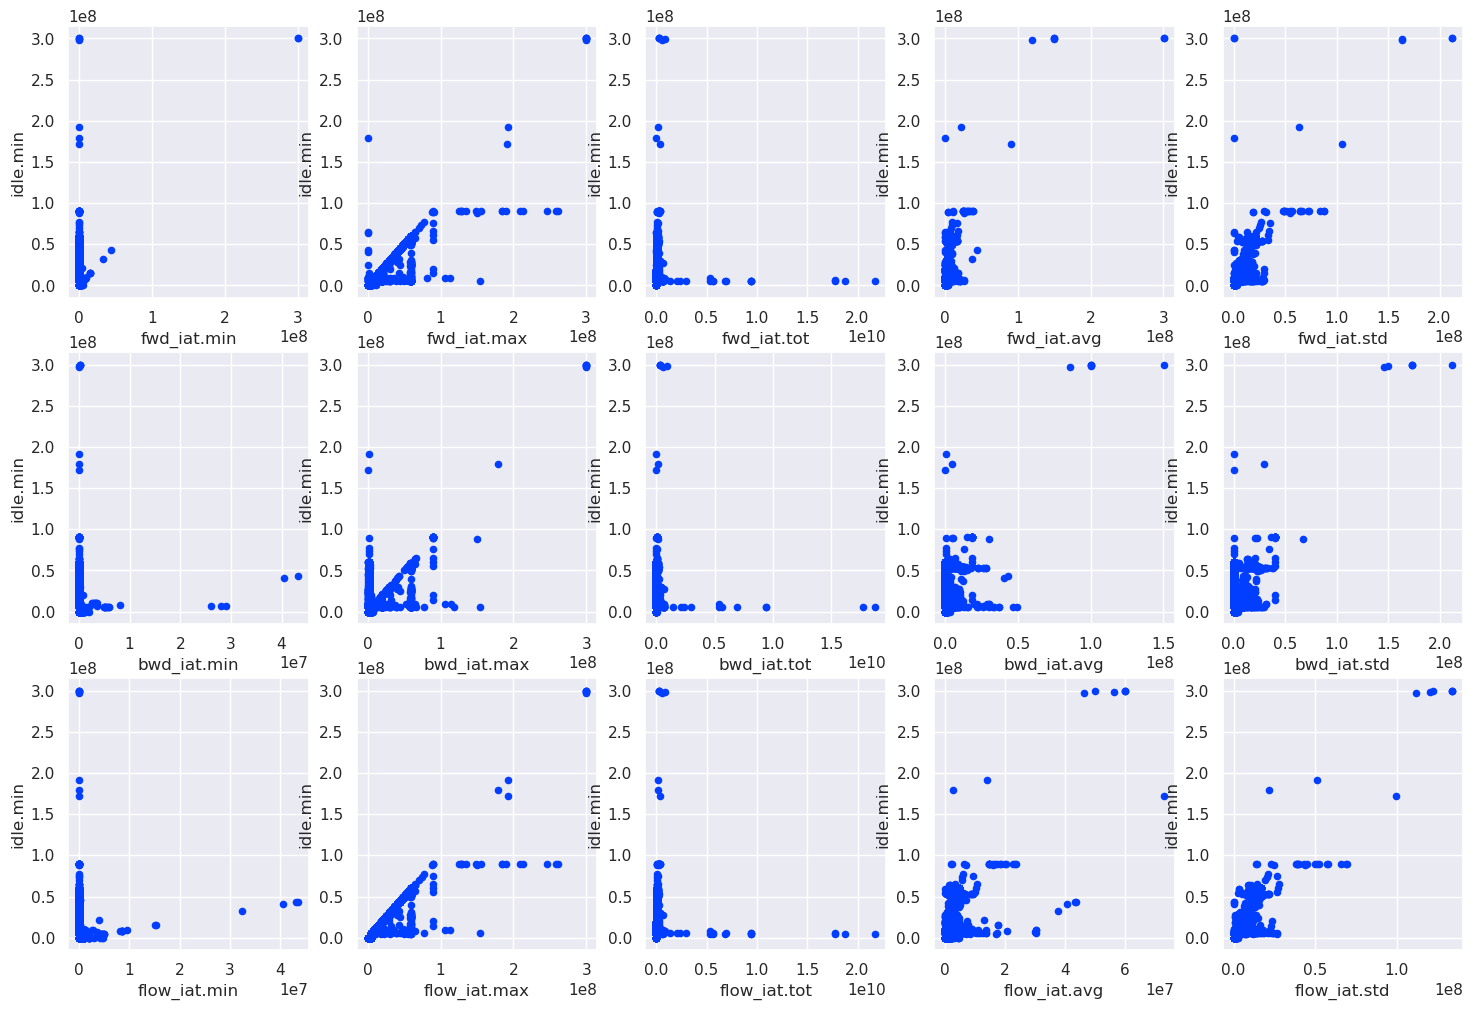

In [19]:
cols = data.filter(like="iat").columns
nr = math.ceil(len(cols)/5)
fig, axes = plt.subplots(nrows=nr,ncols=5, figsize=(18, nr*4))

for idx, feature in enumerate(cols):
    data.plot(feature, 'idle.min', subplots=True, kind='scatter', ax=axes[idx // 5, idx % 5])

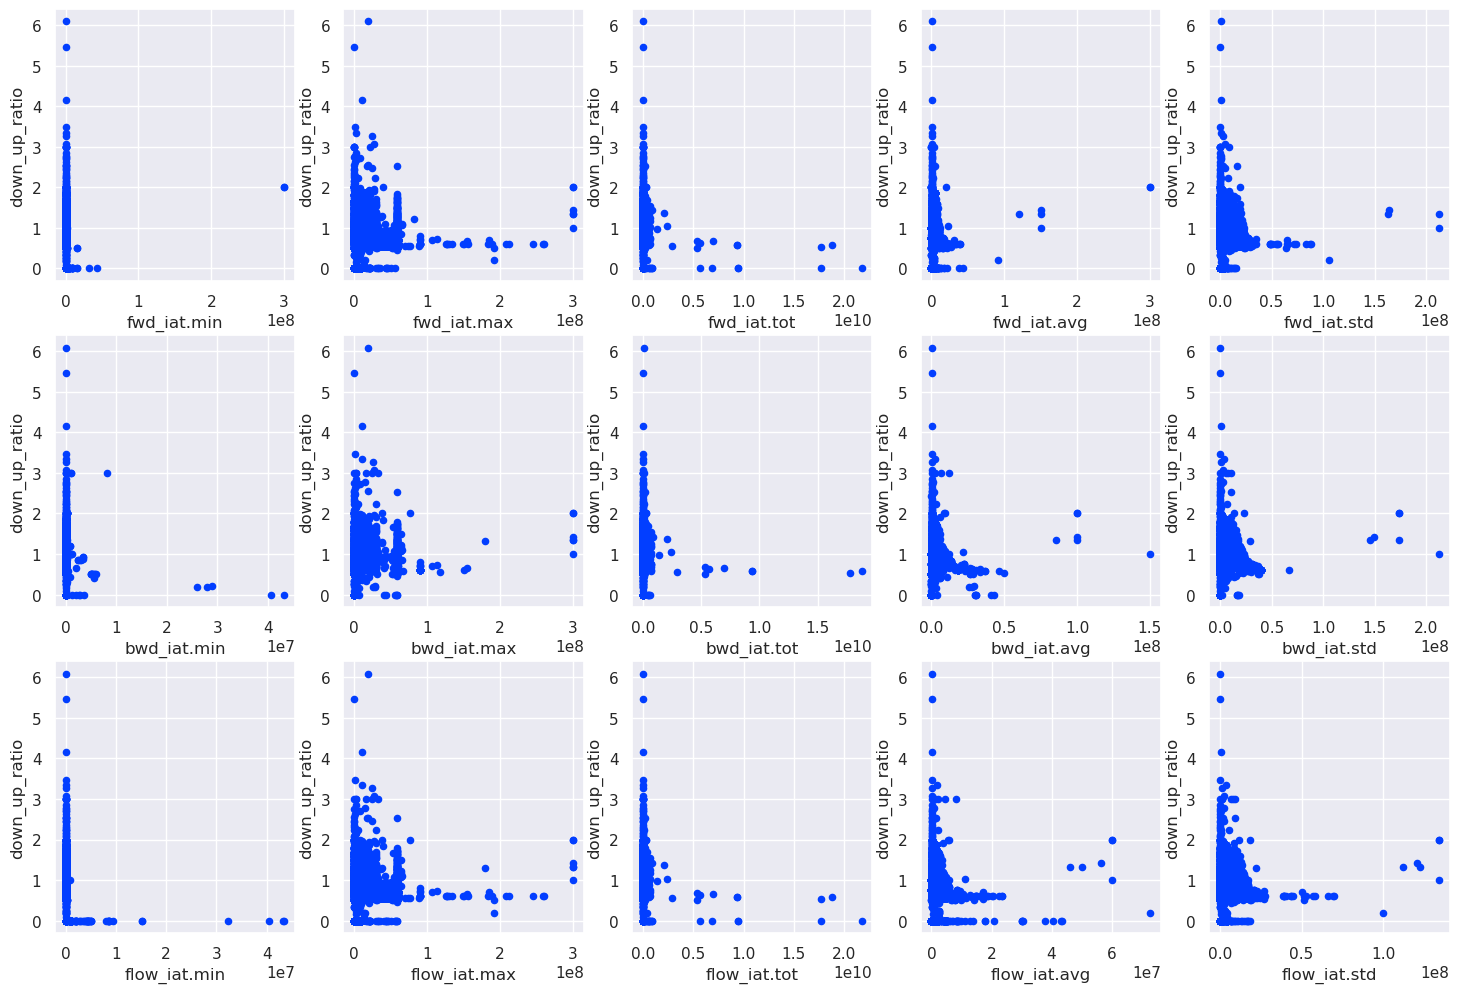

In [20]:
cols = data.filter(like="iat").columns
nr = math.ceil(len(cols)/5)
fig, axes = plt.subplots(nrows=nr,ncols=5, figsize=(18, nr*4))

for idx, feature in enumerate(cols):
    data.plot(feature, 'down_up_ratio', subplots=True, kind='scatter', ax=axes[idx // 5, idx % 5])

/tmp/ipykernel_67510/1698747351.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=nr,ncols=5, figsize=(18, nr*4))


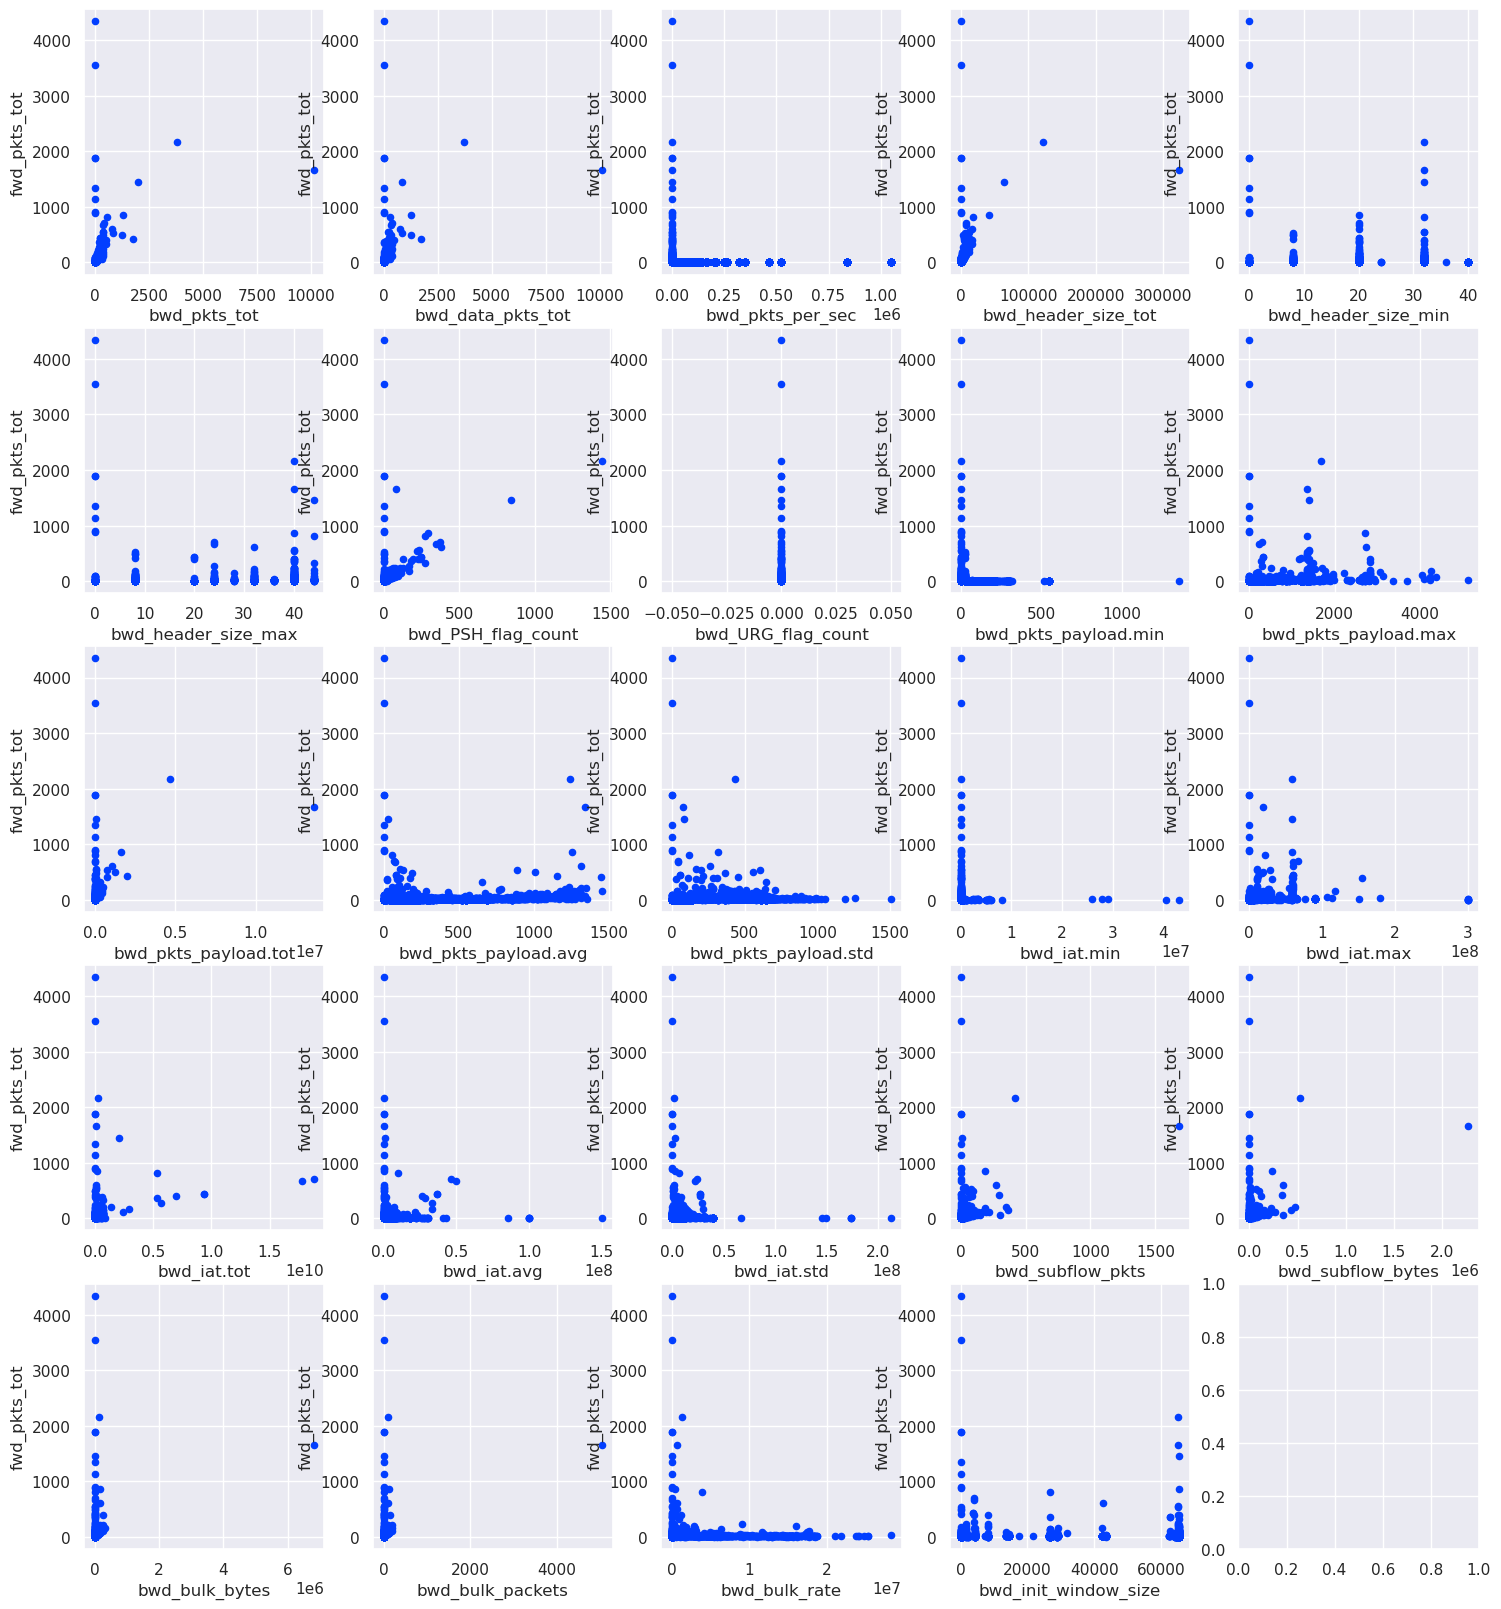

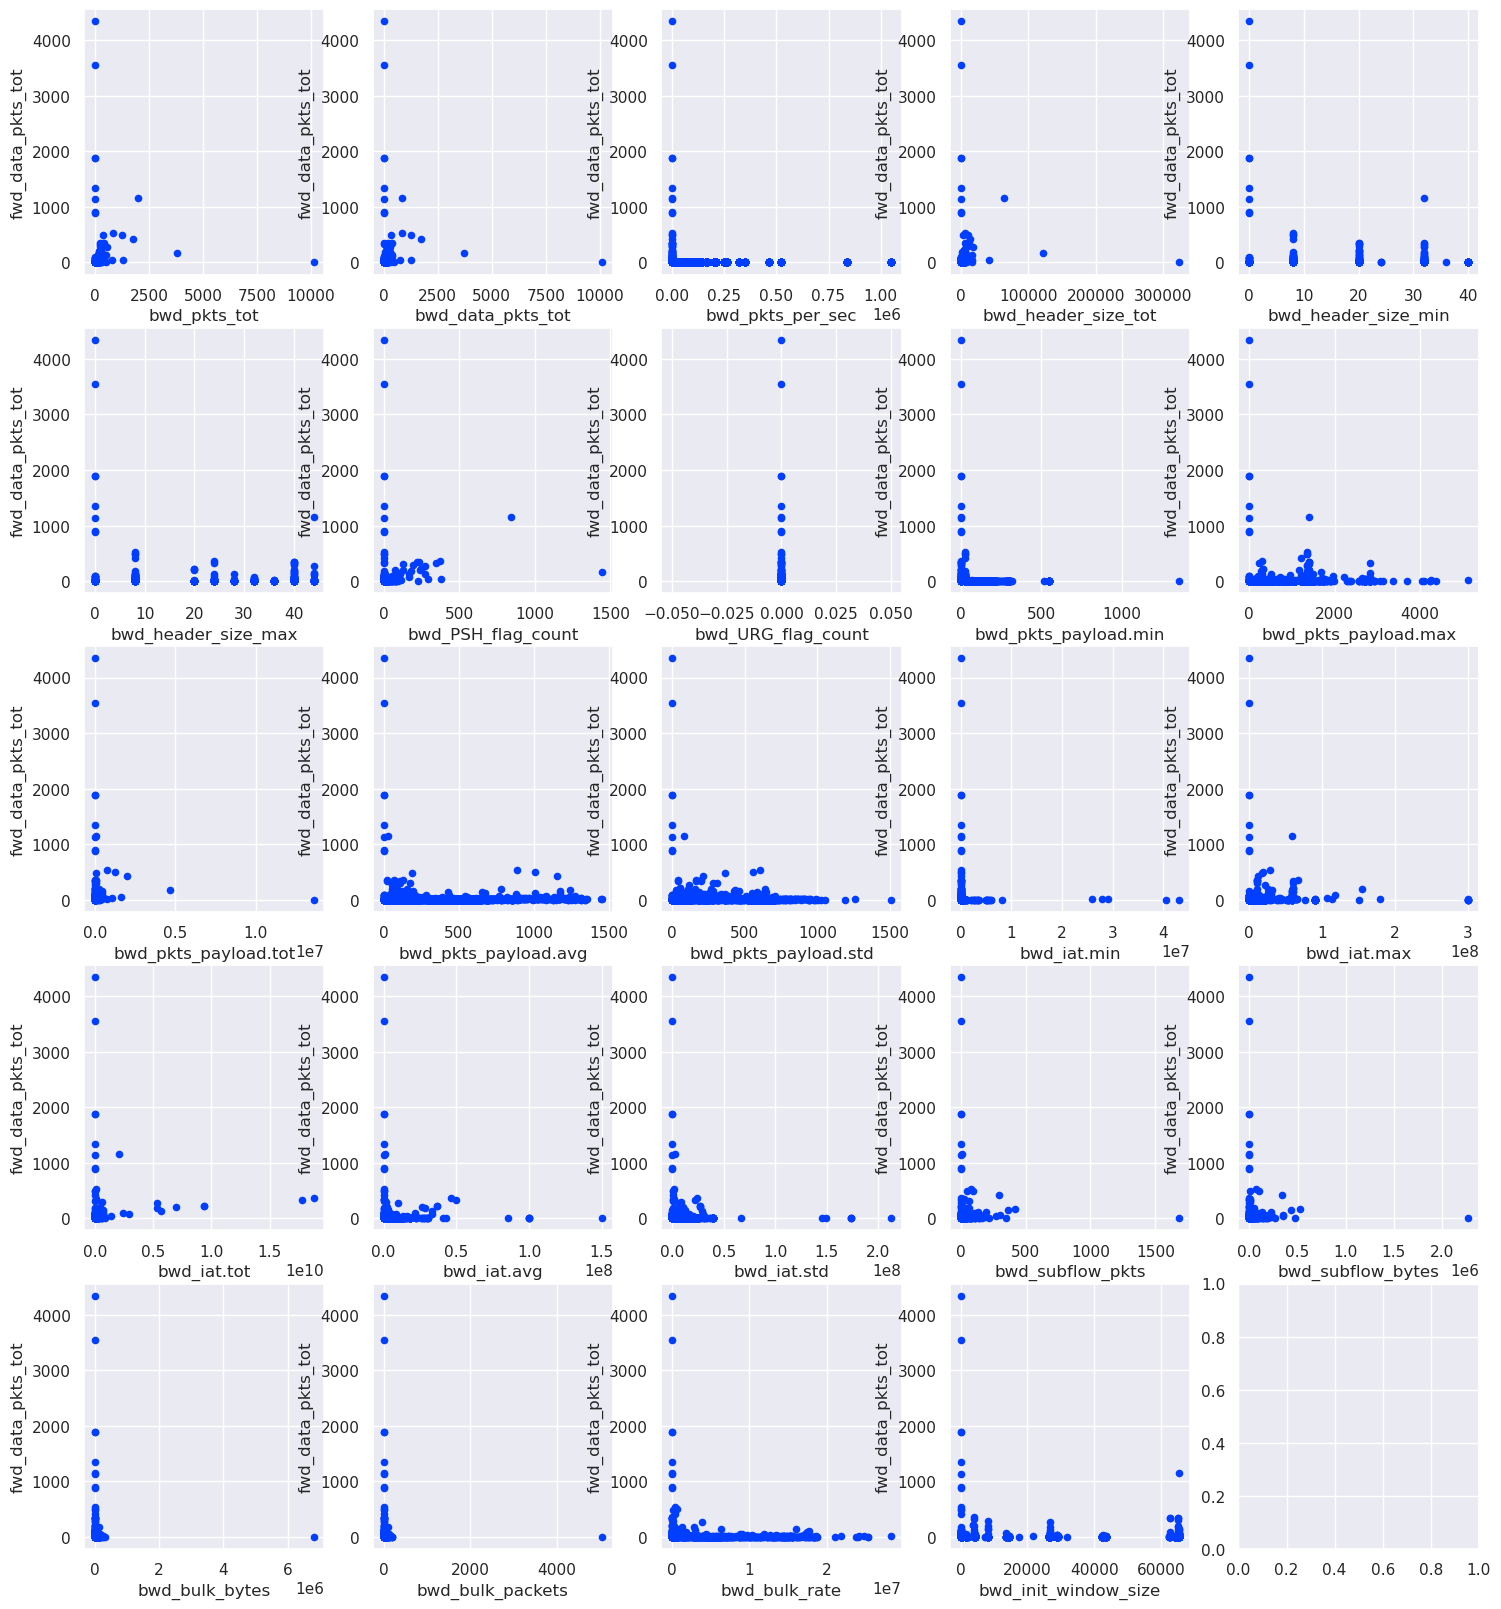

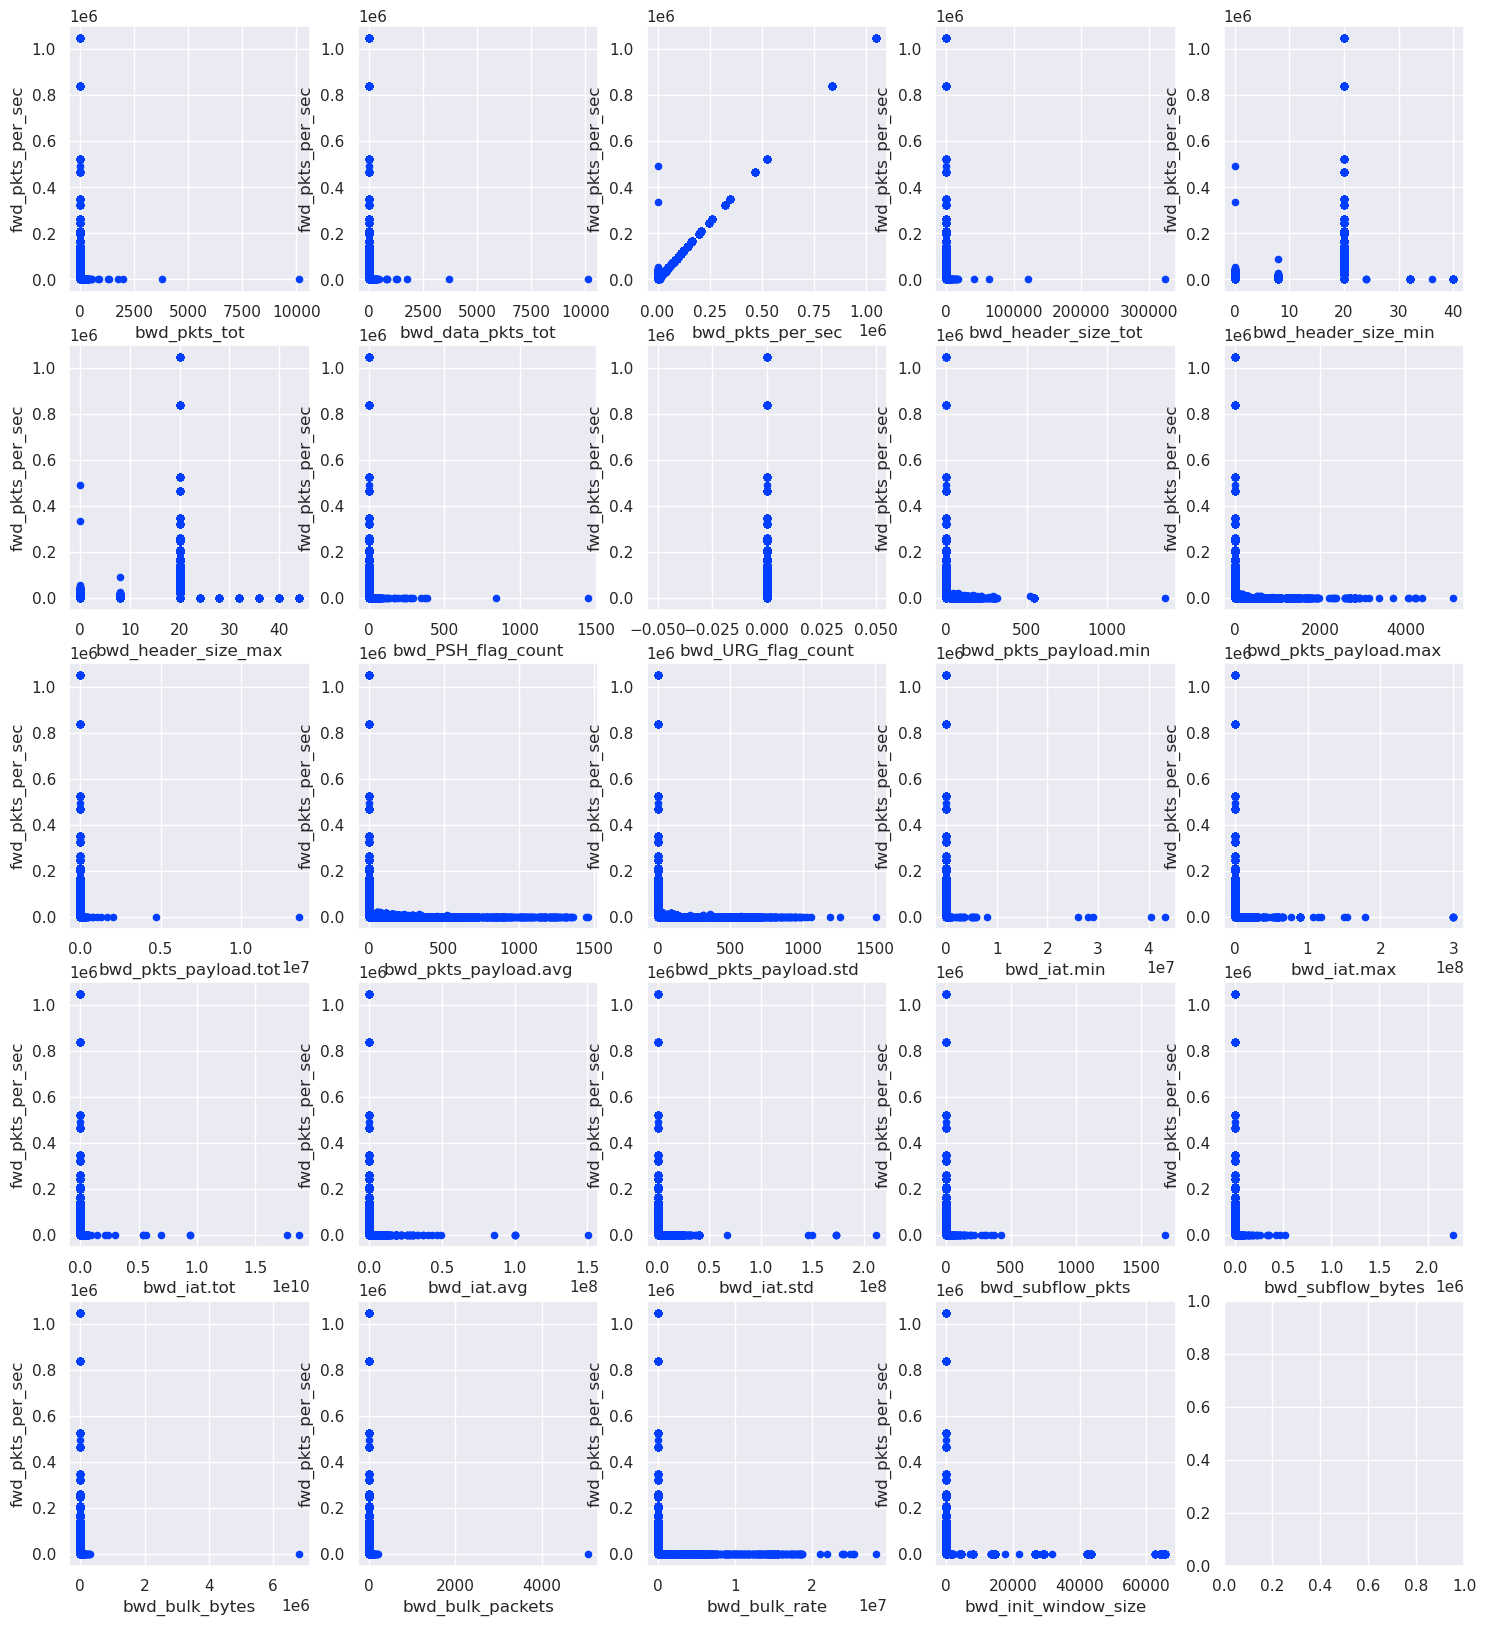

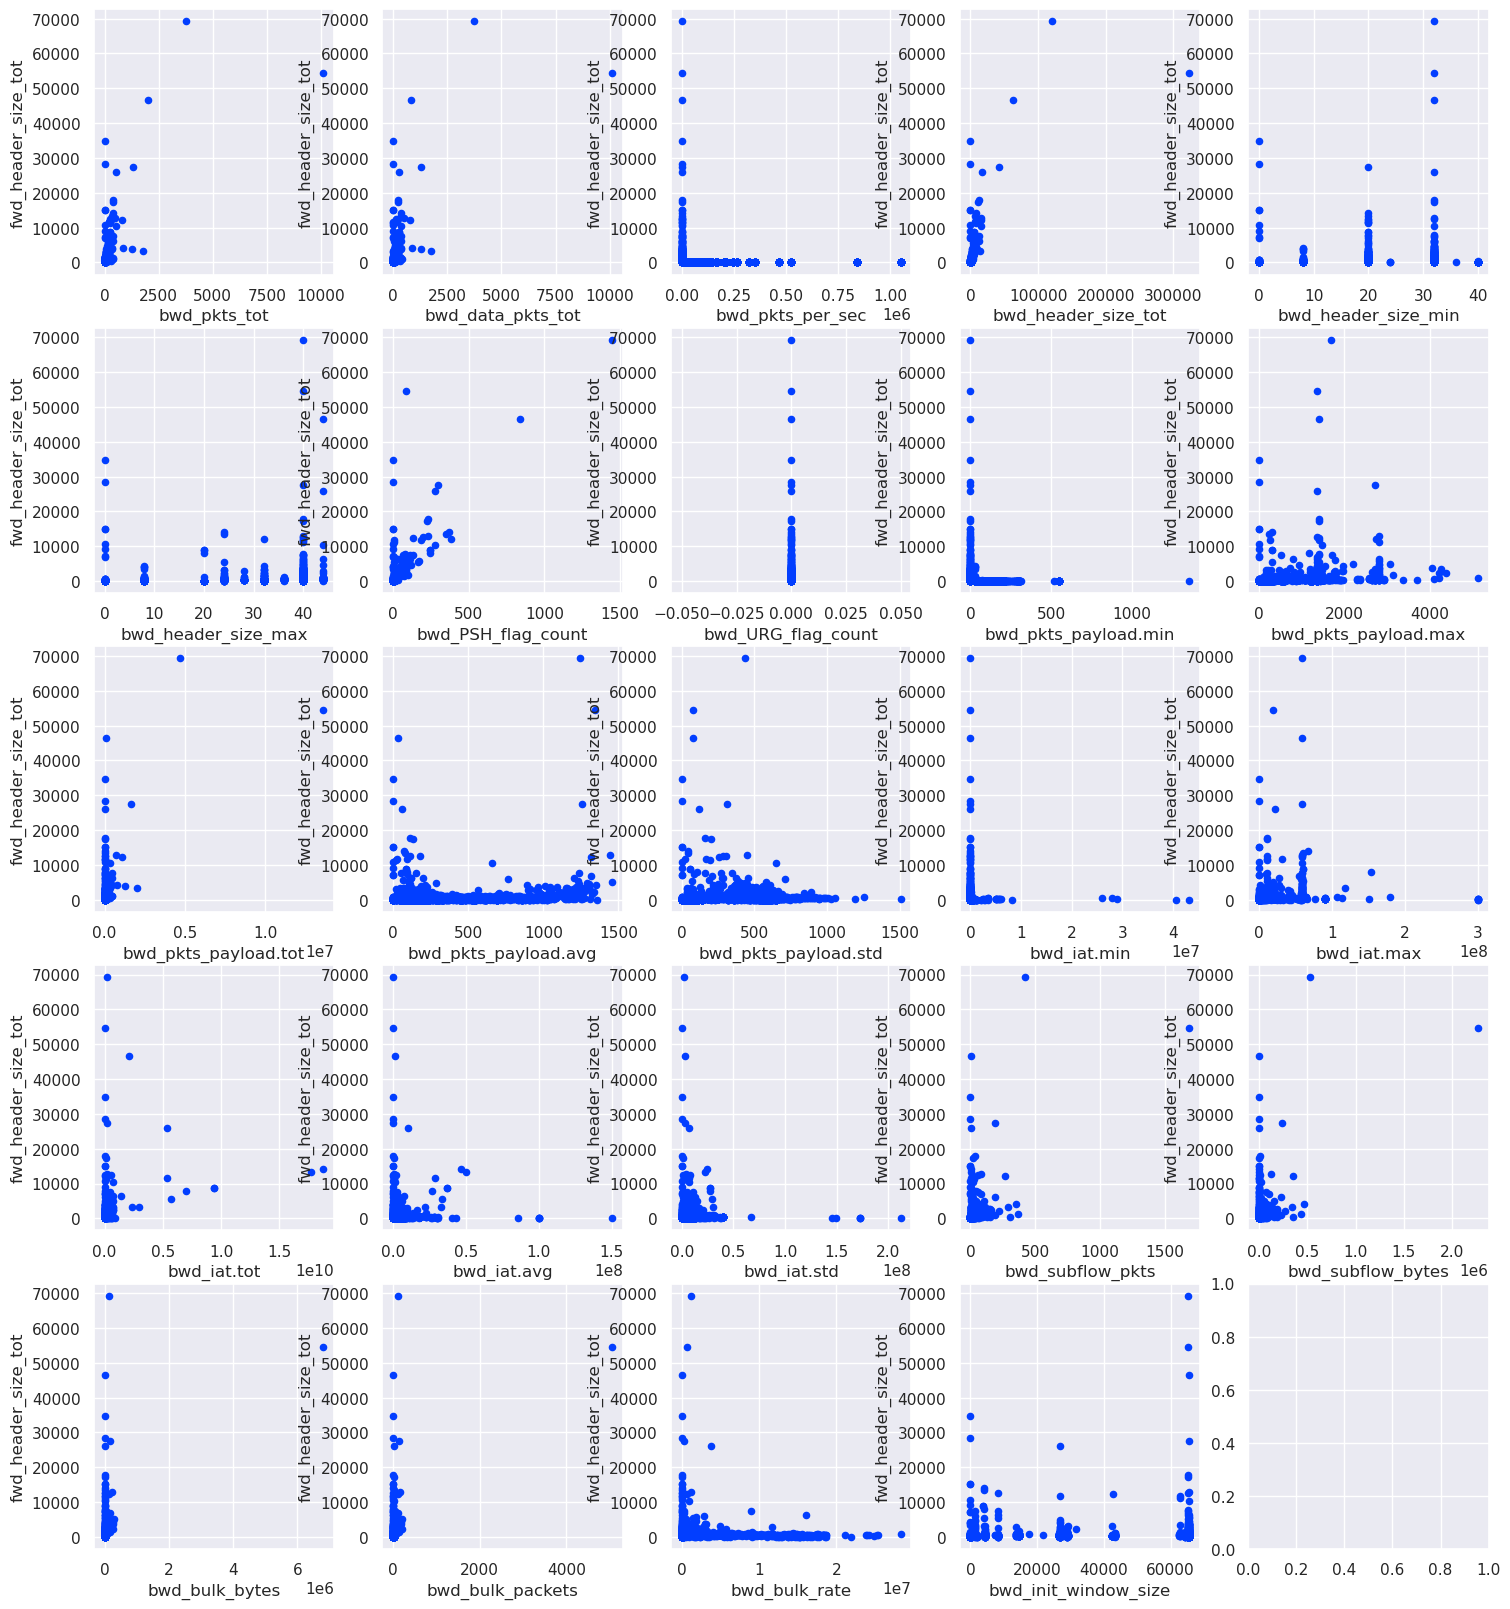

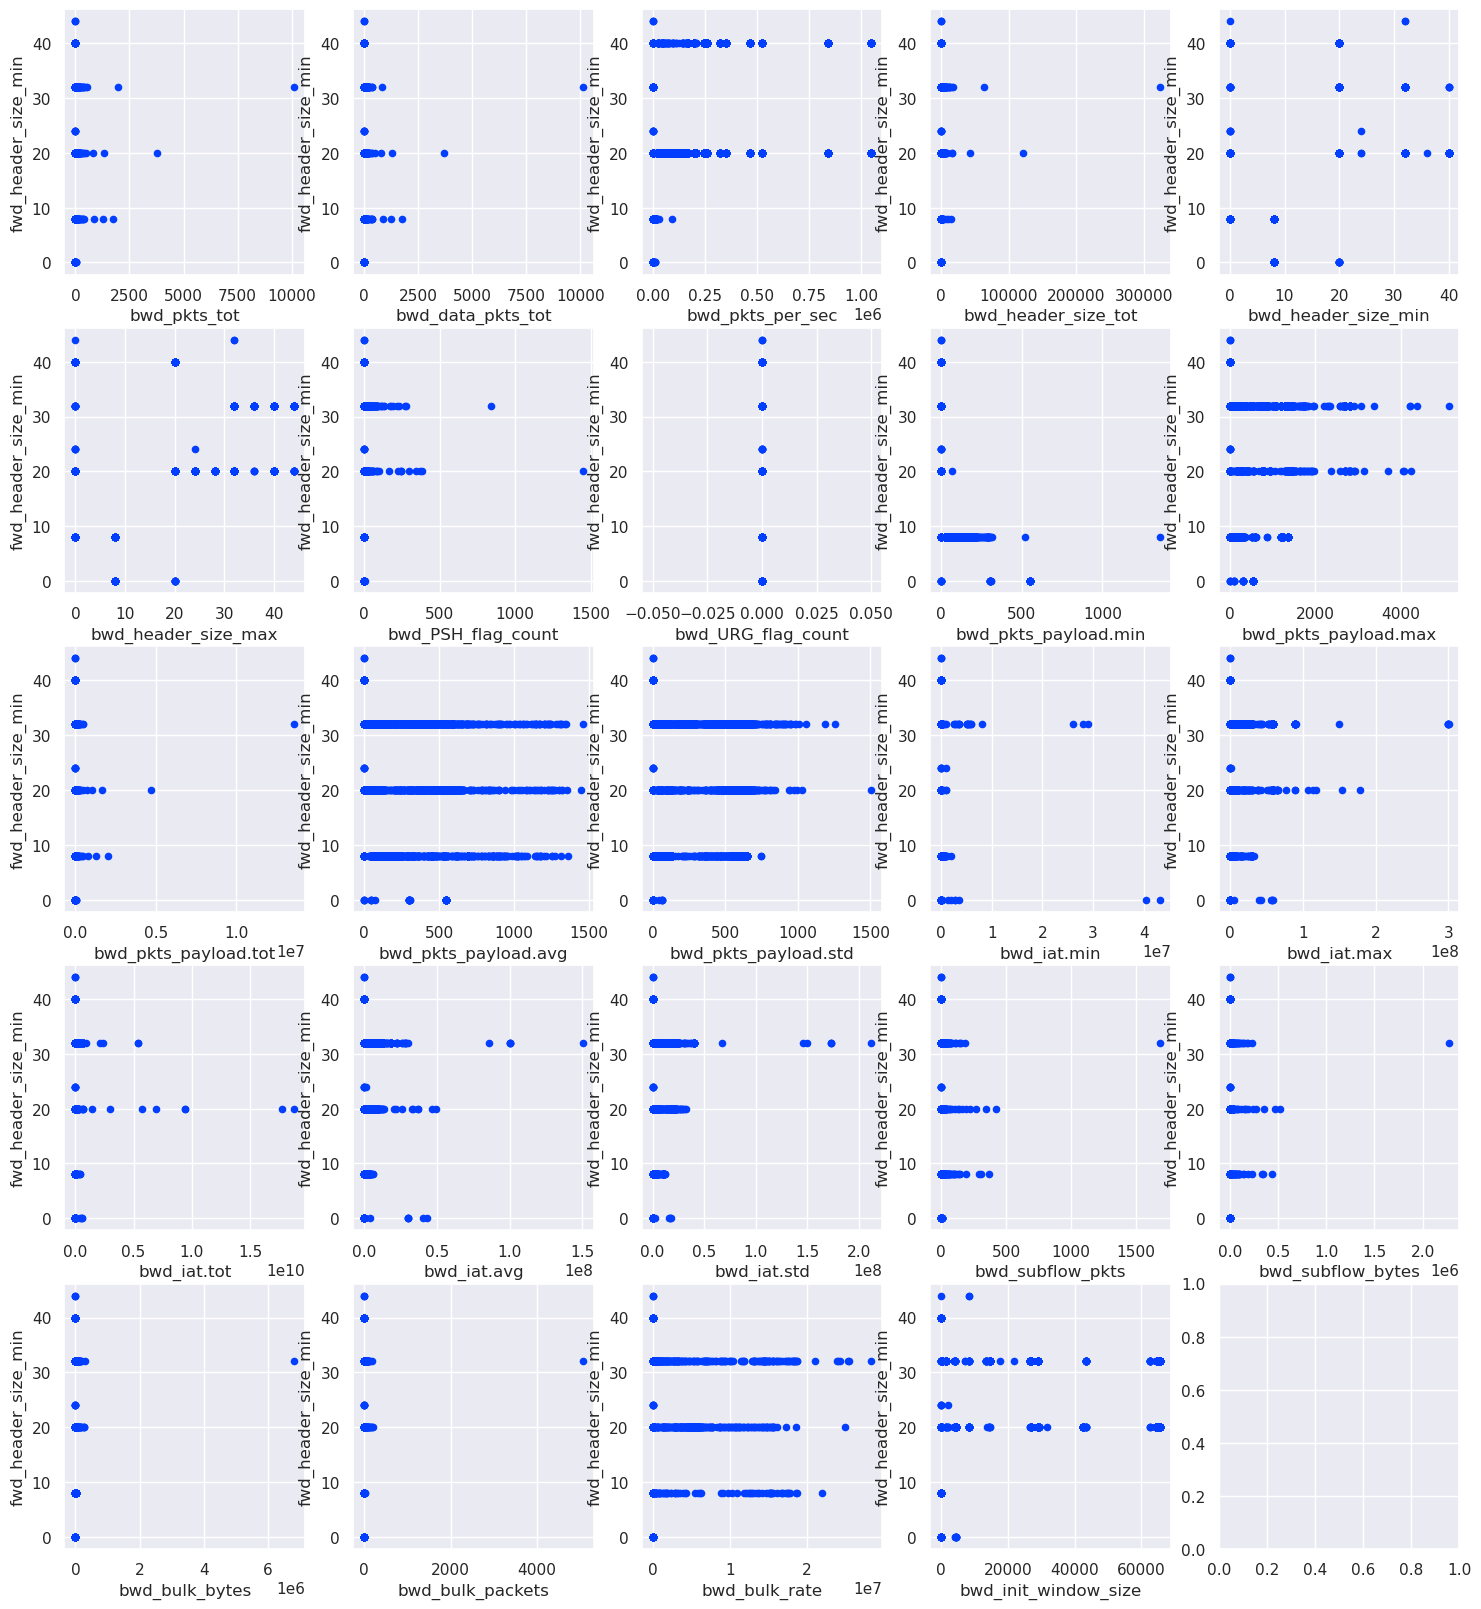

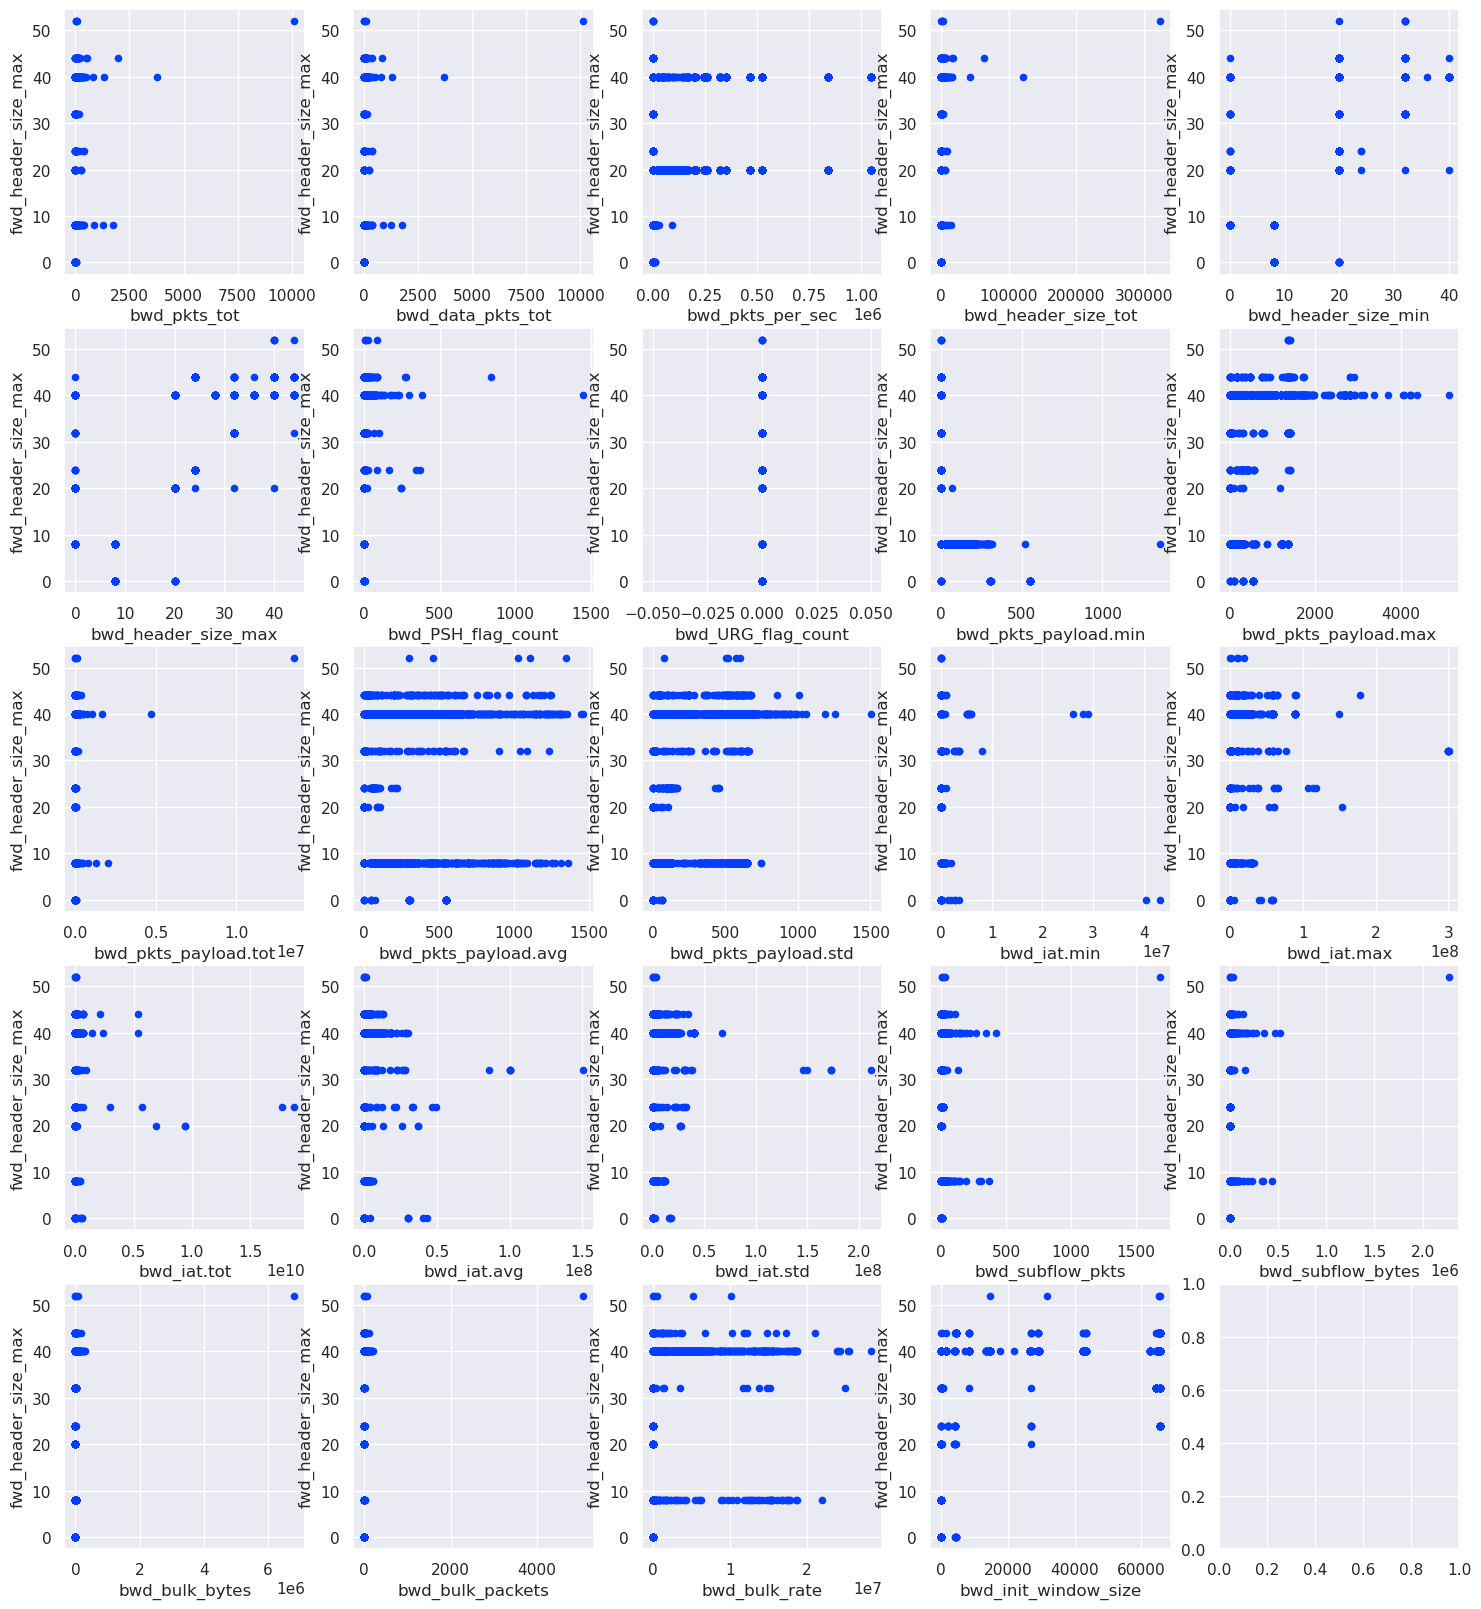

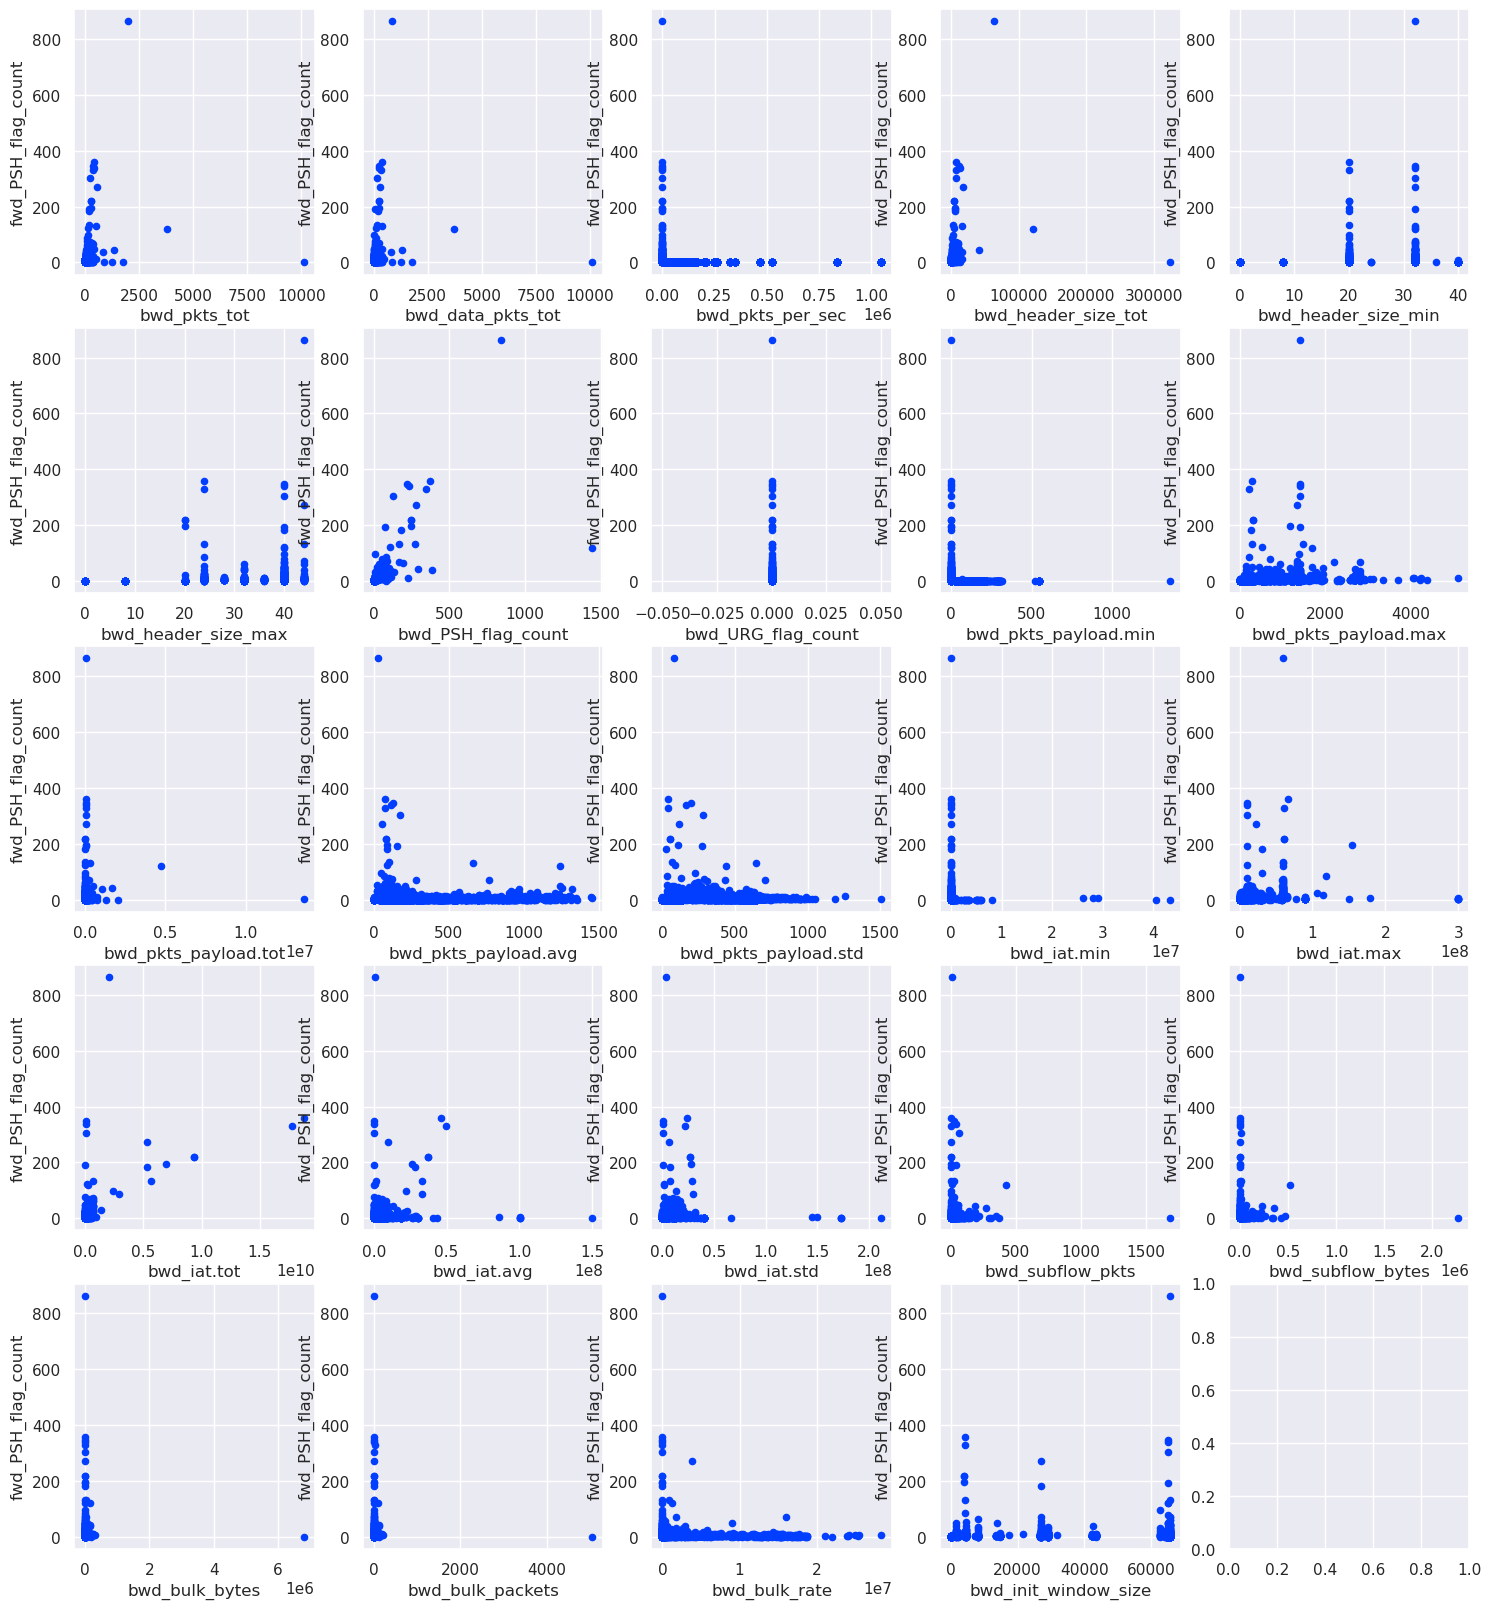

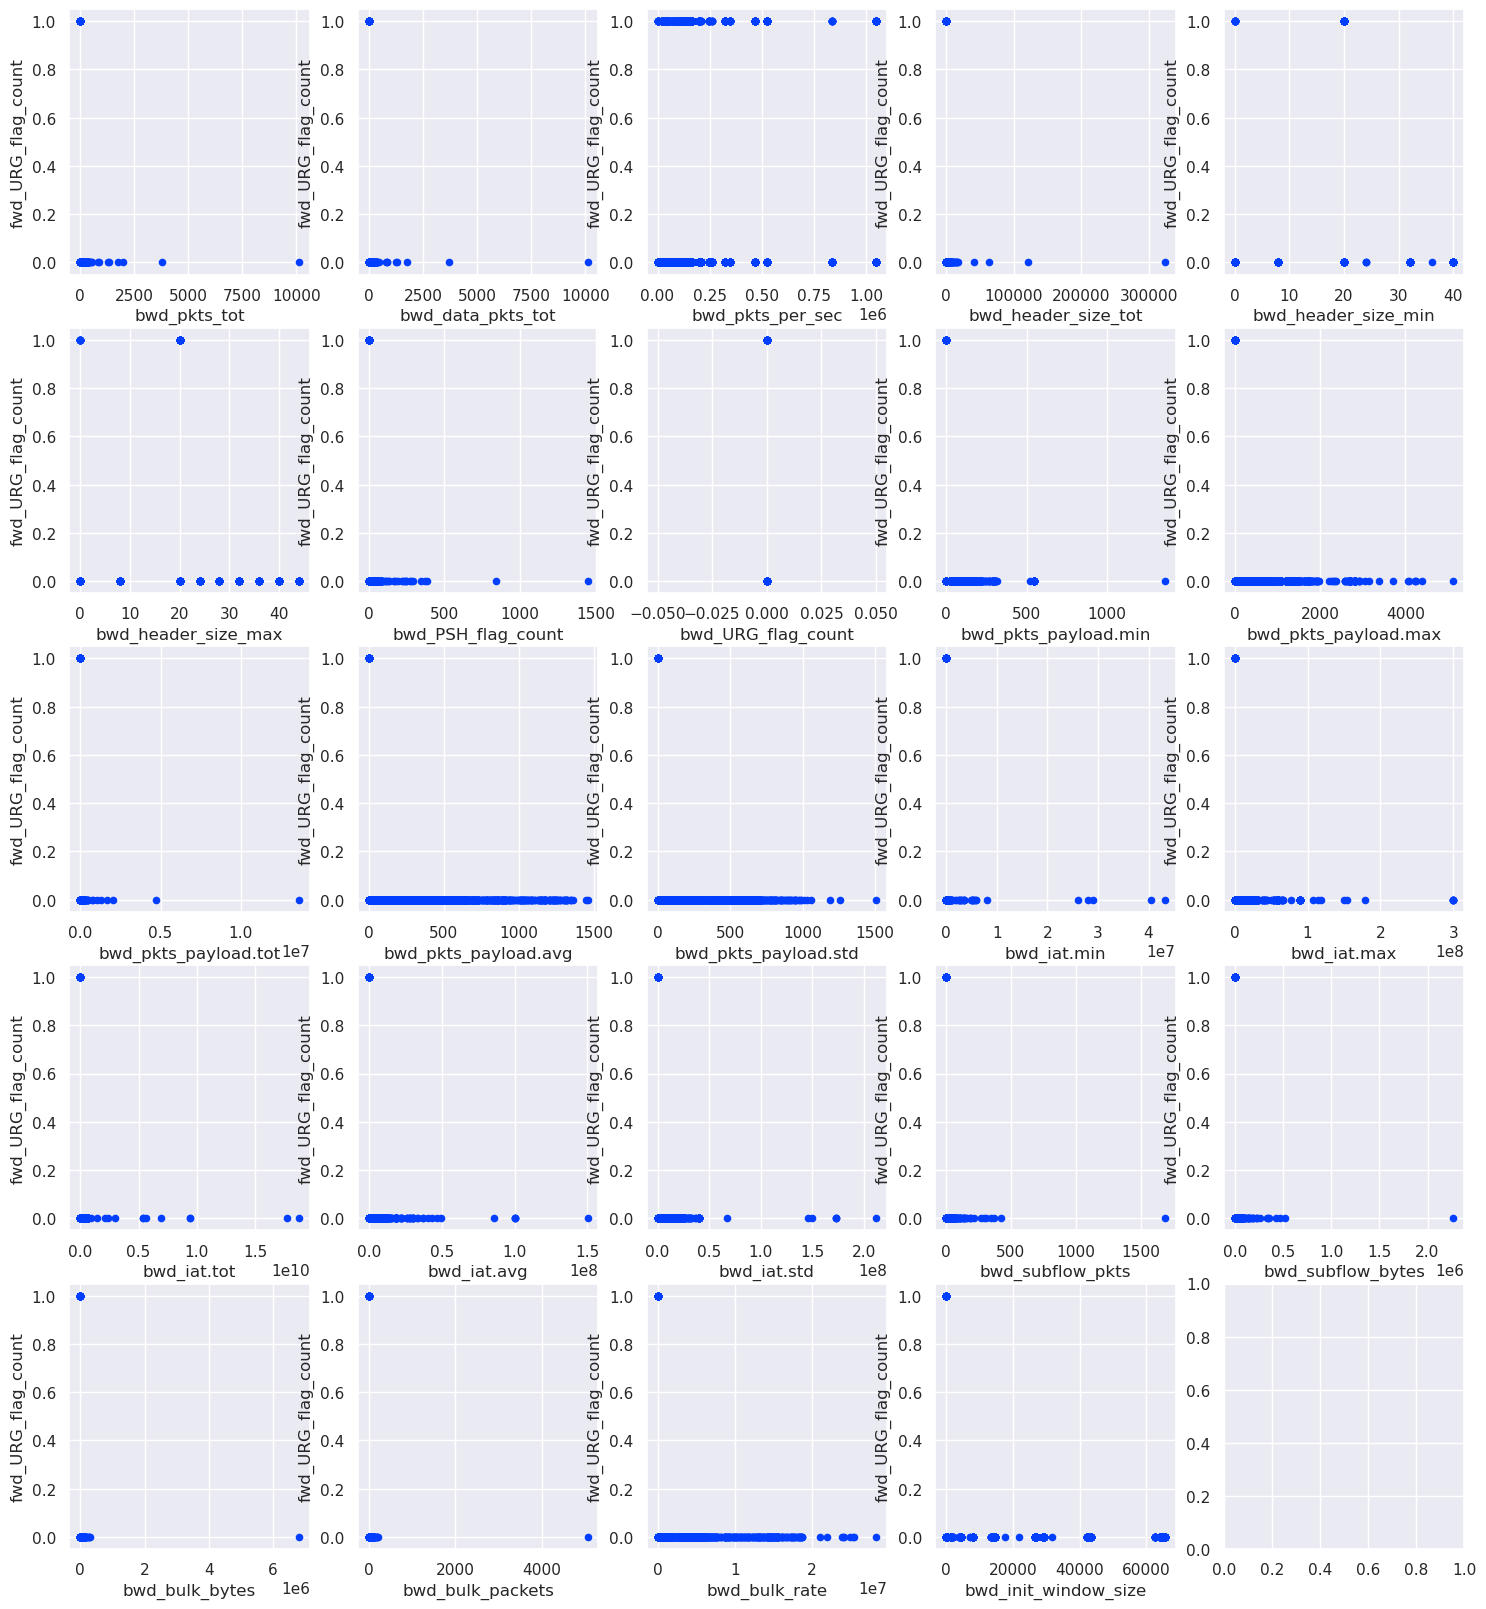

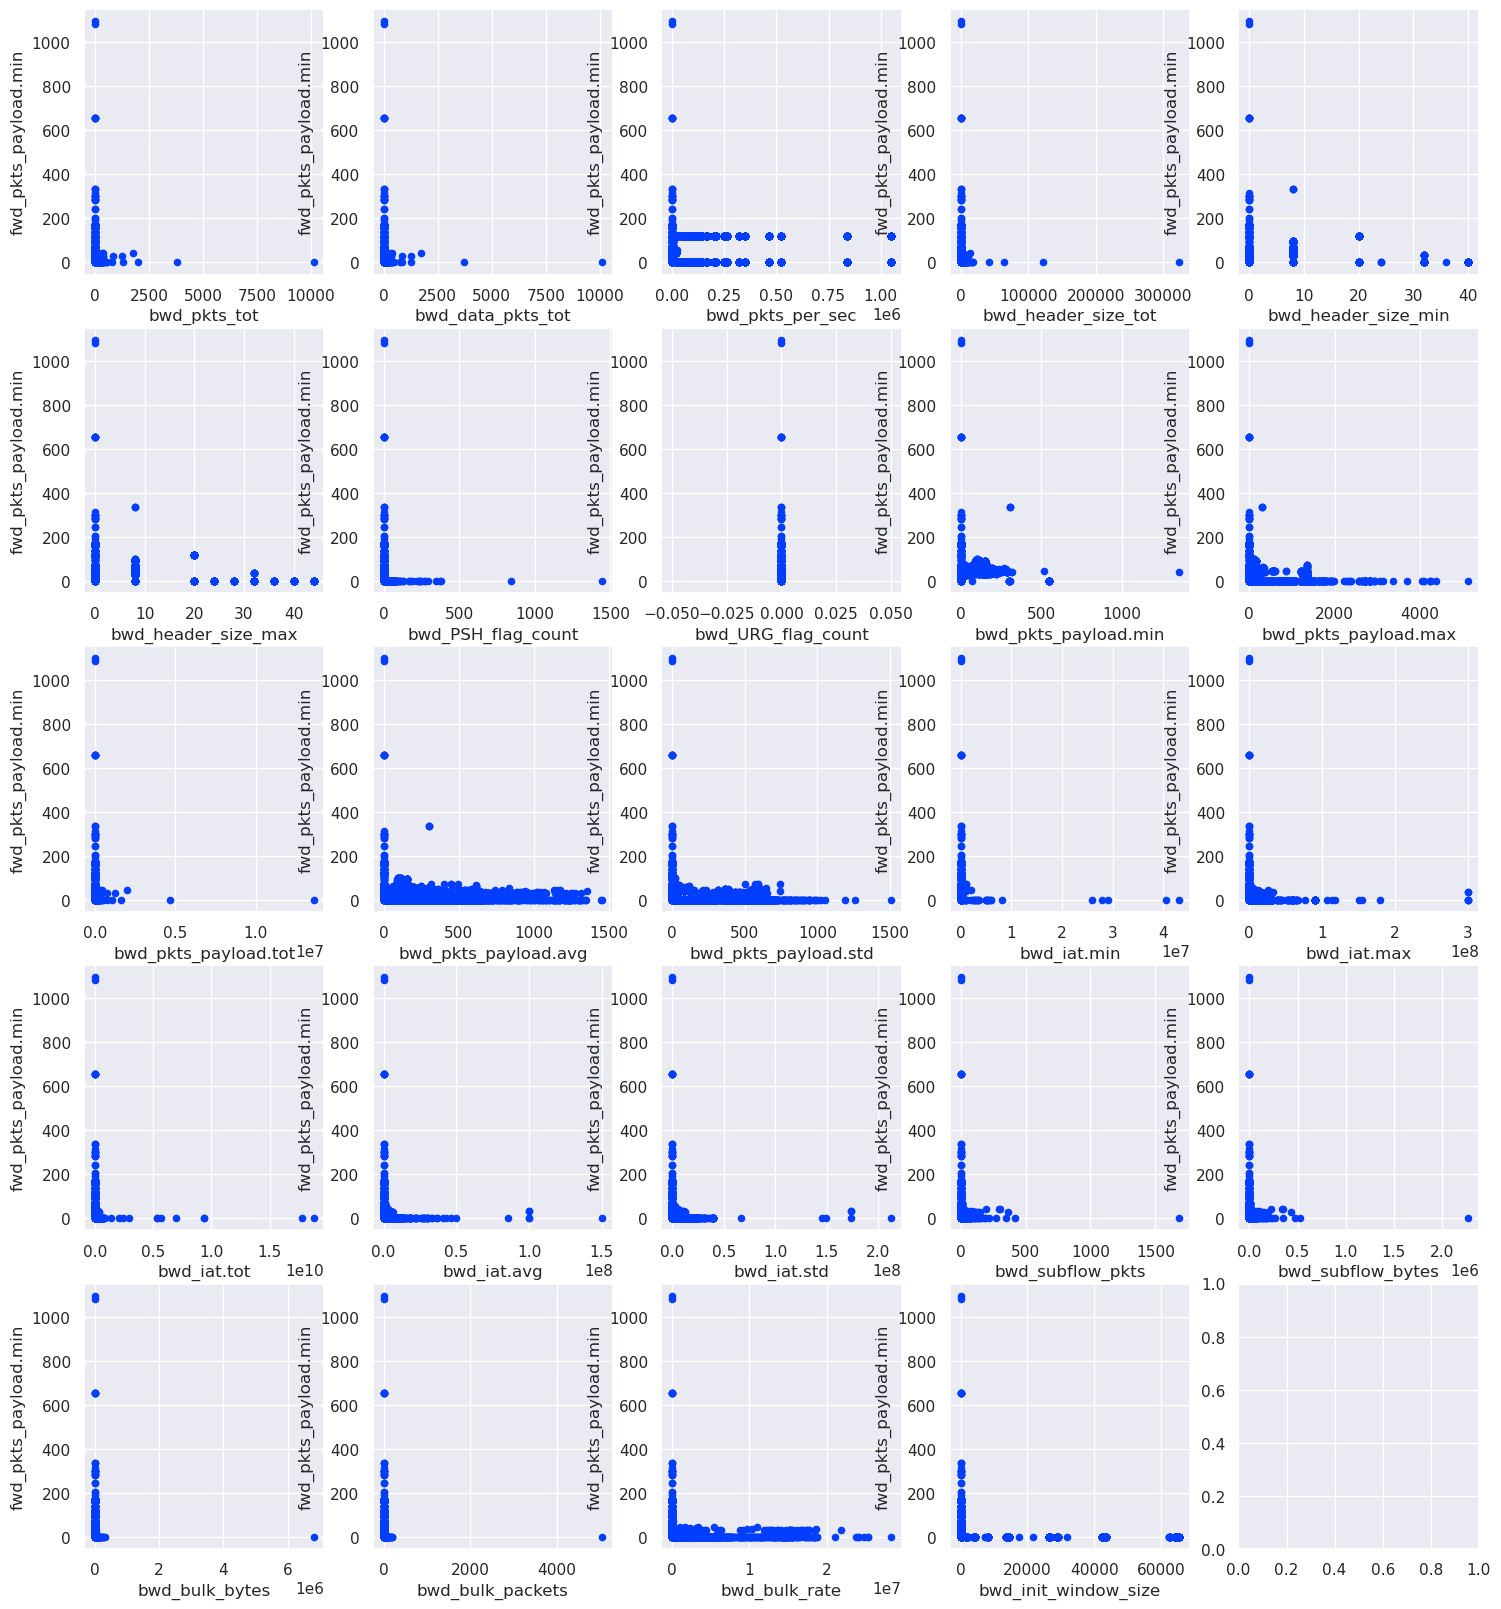

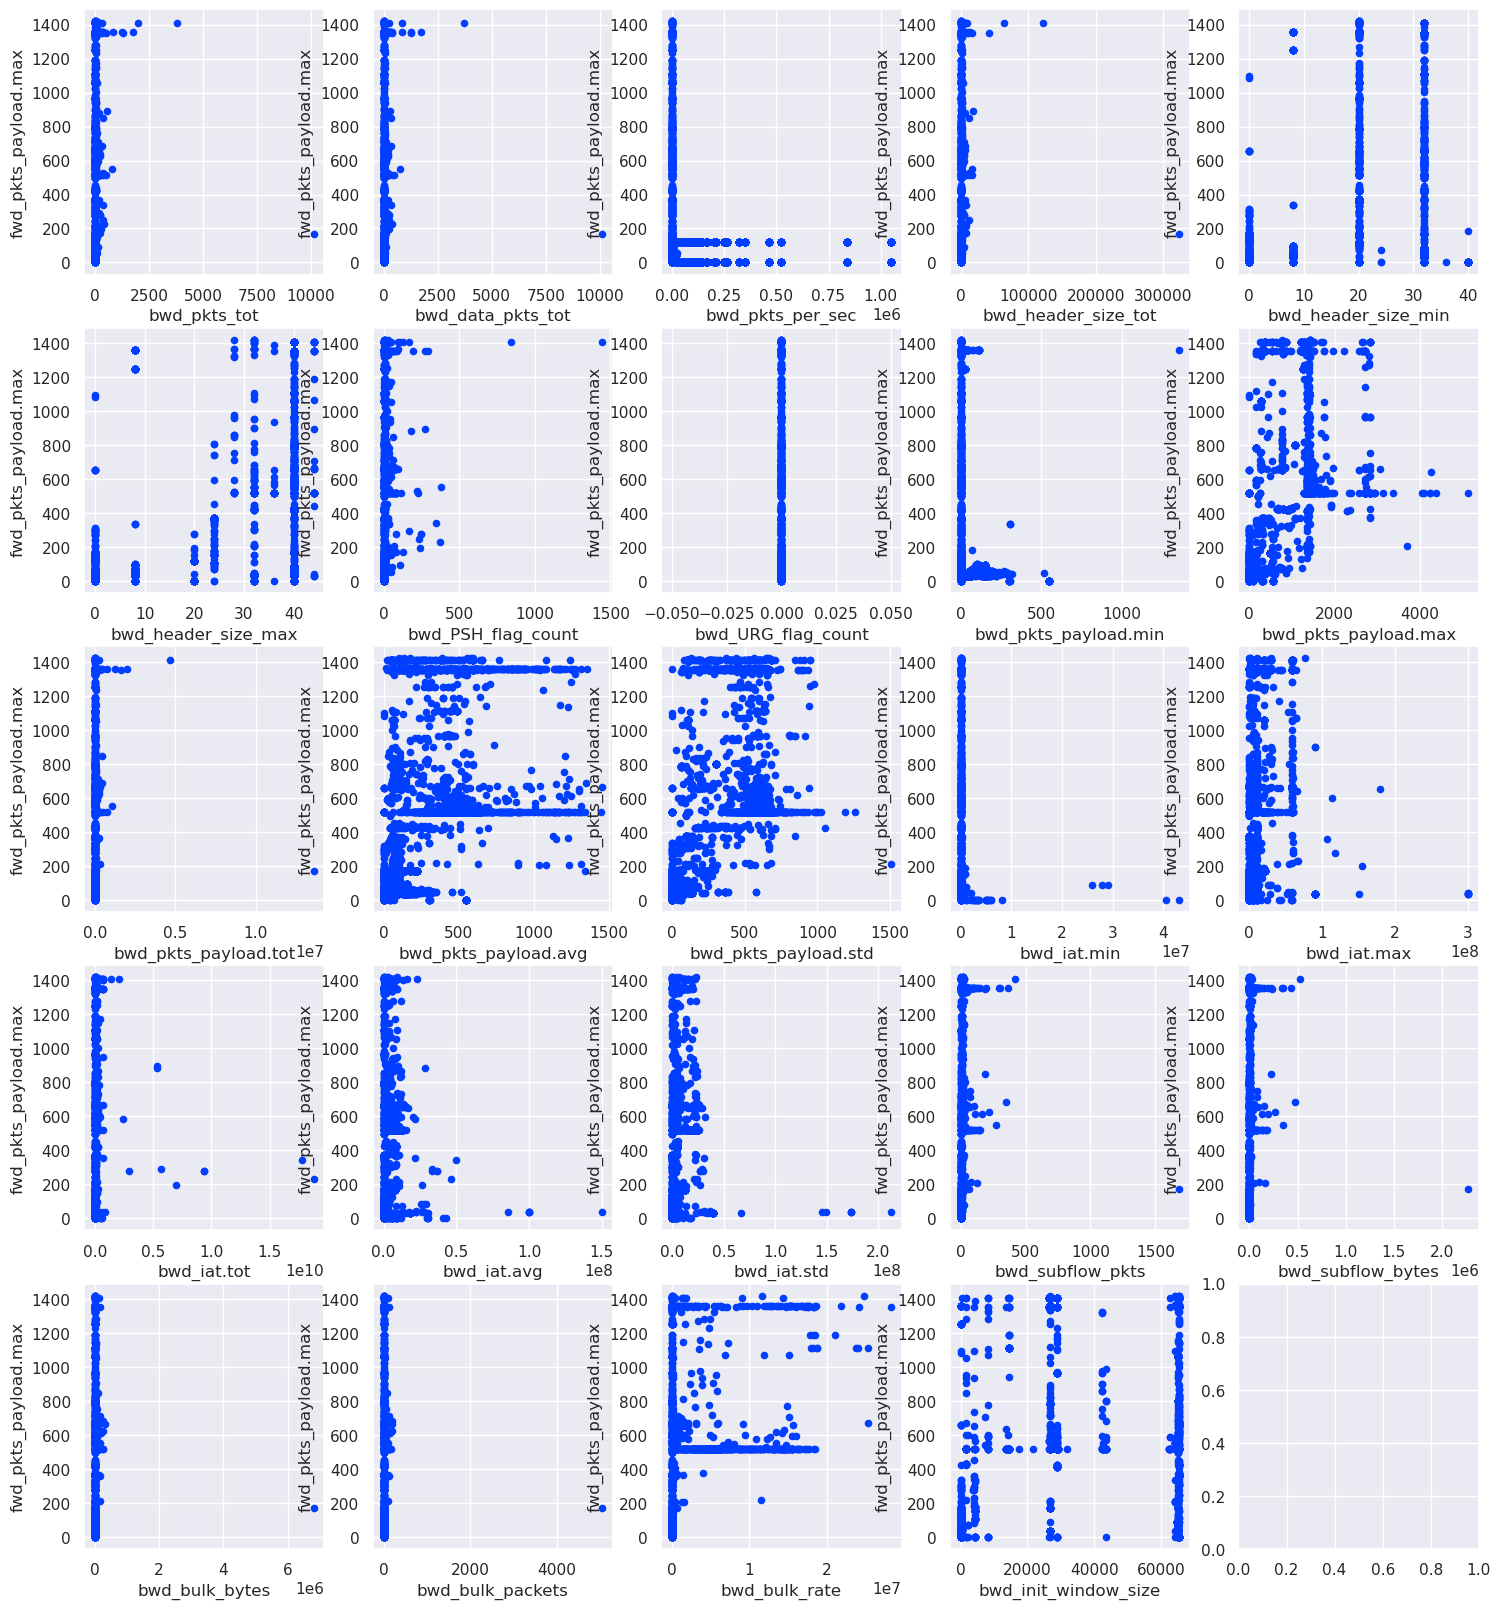

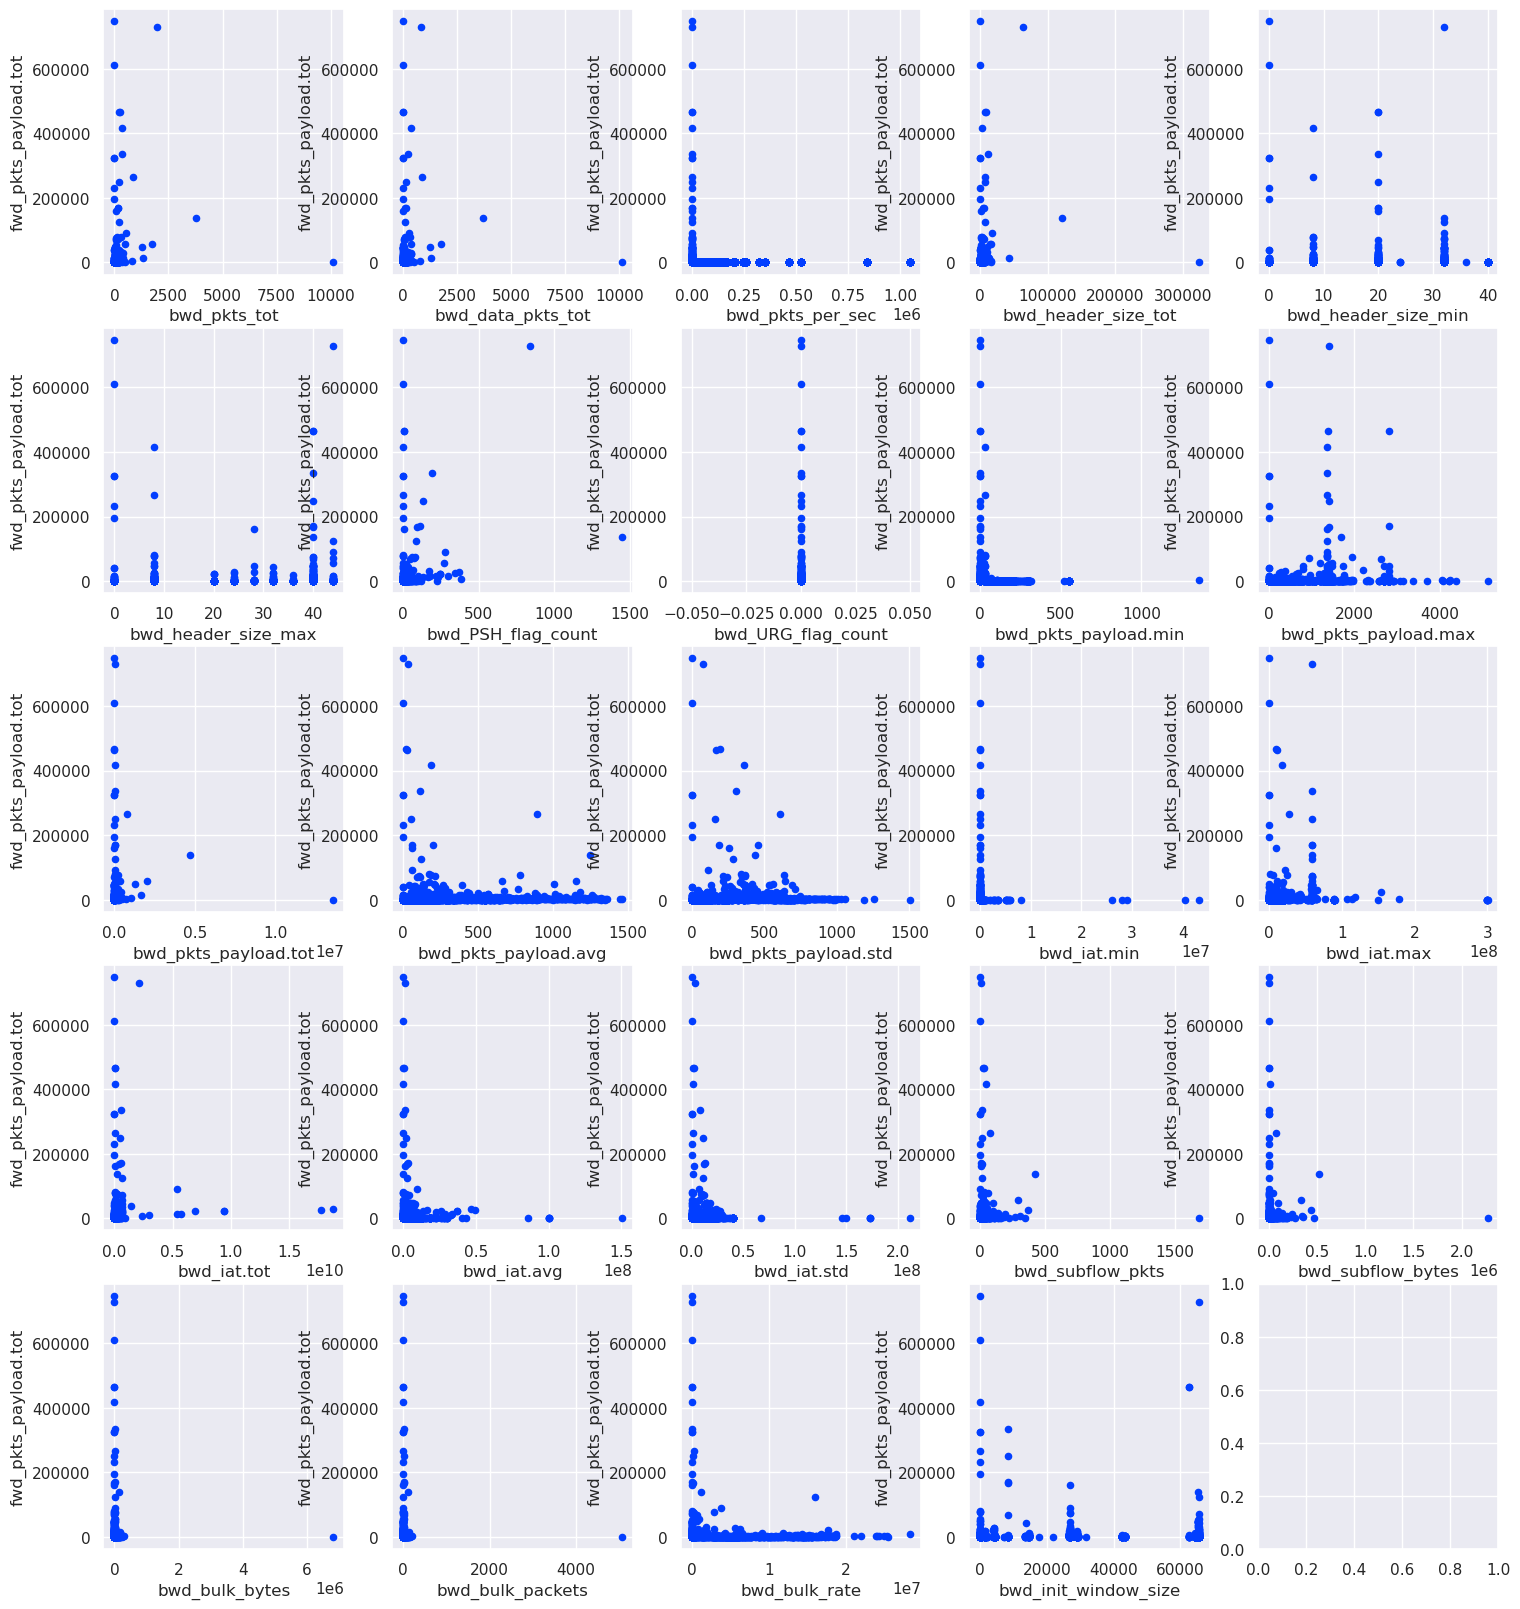

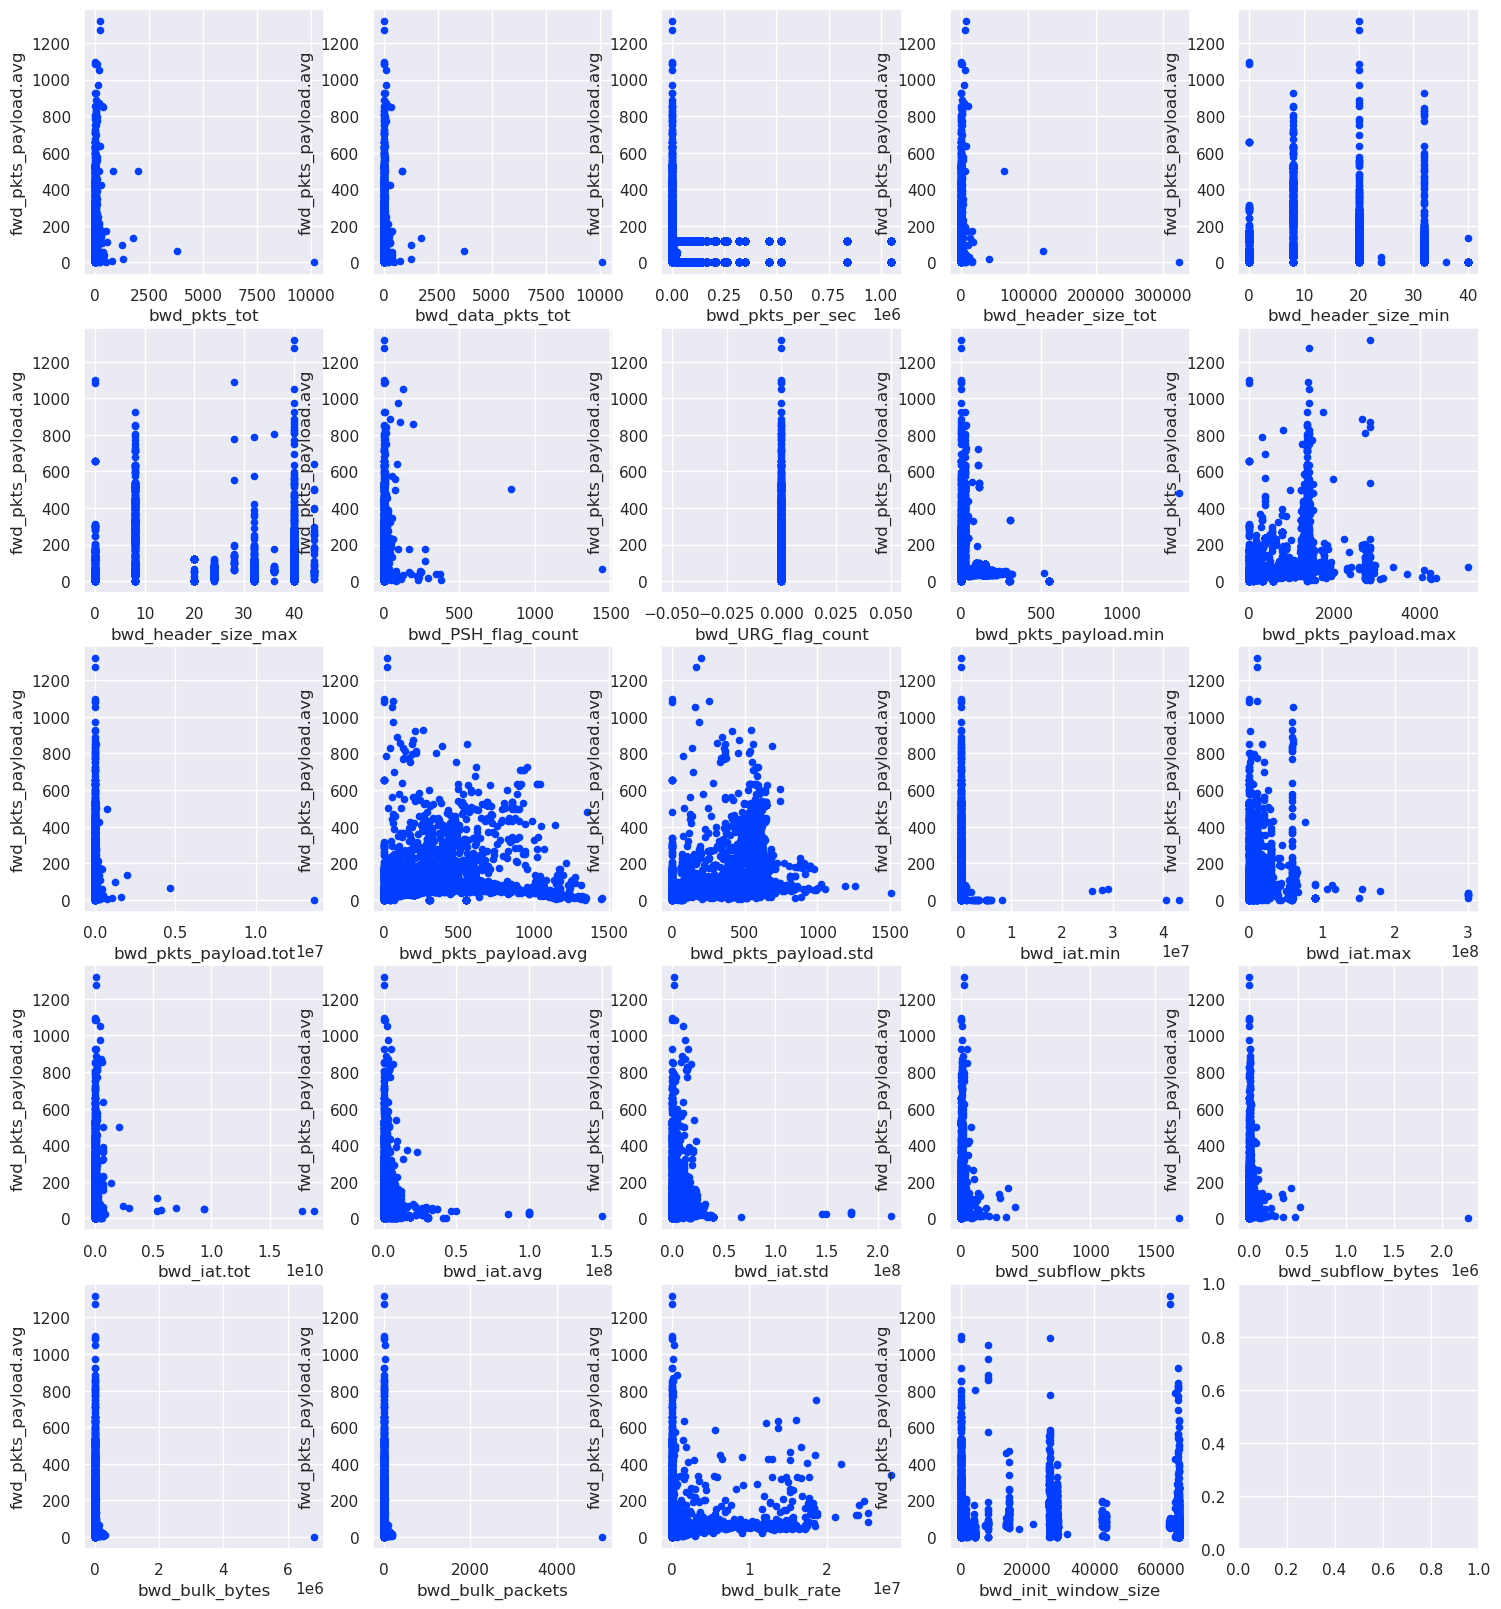

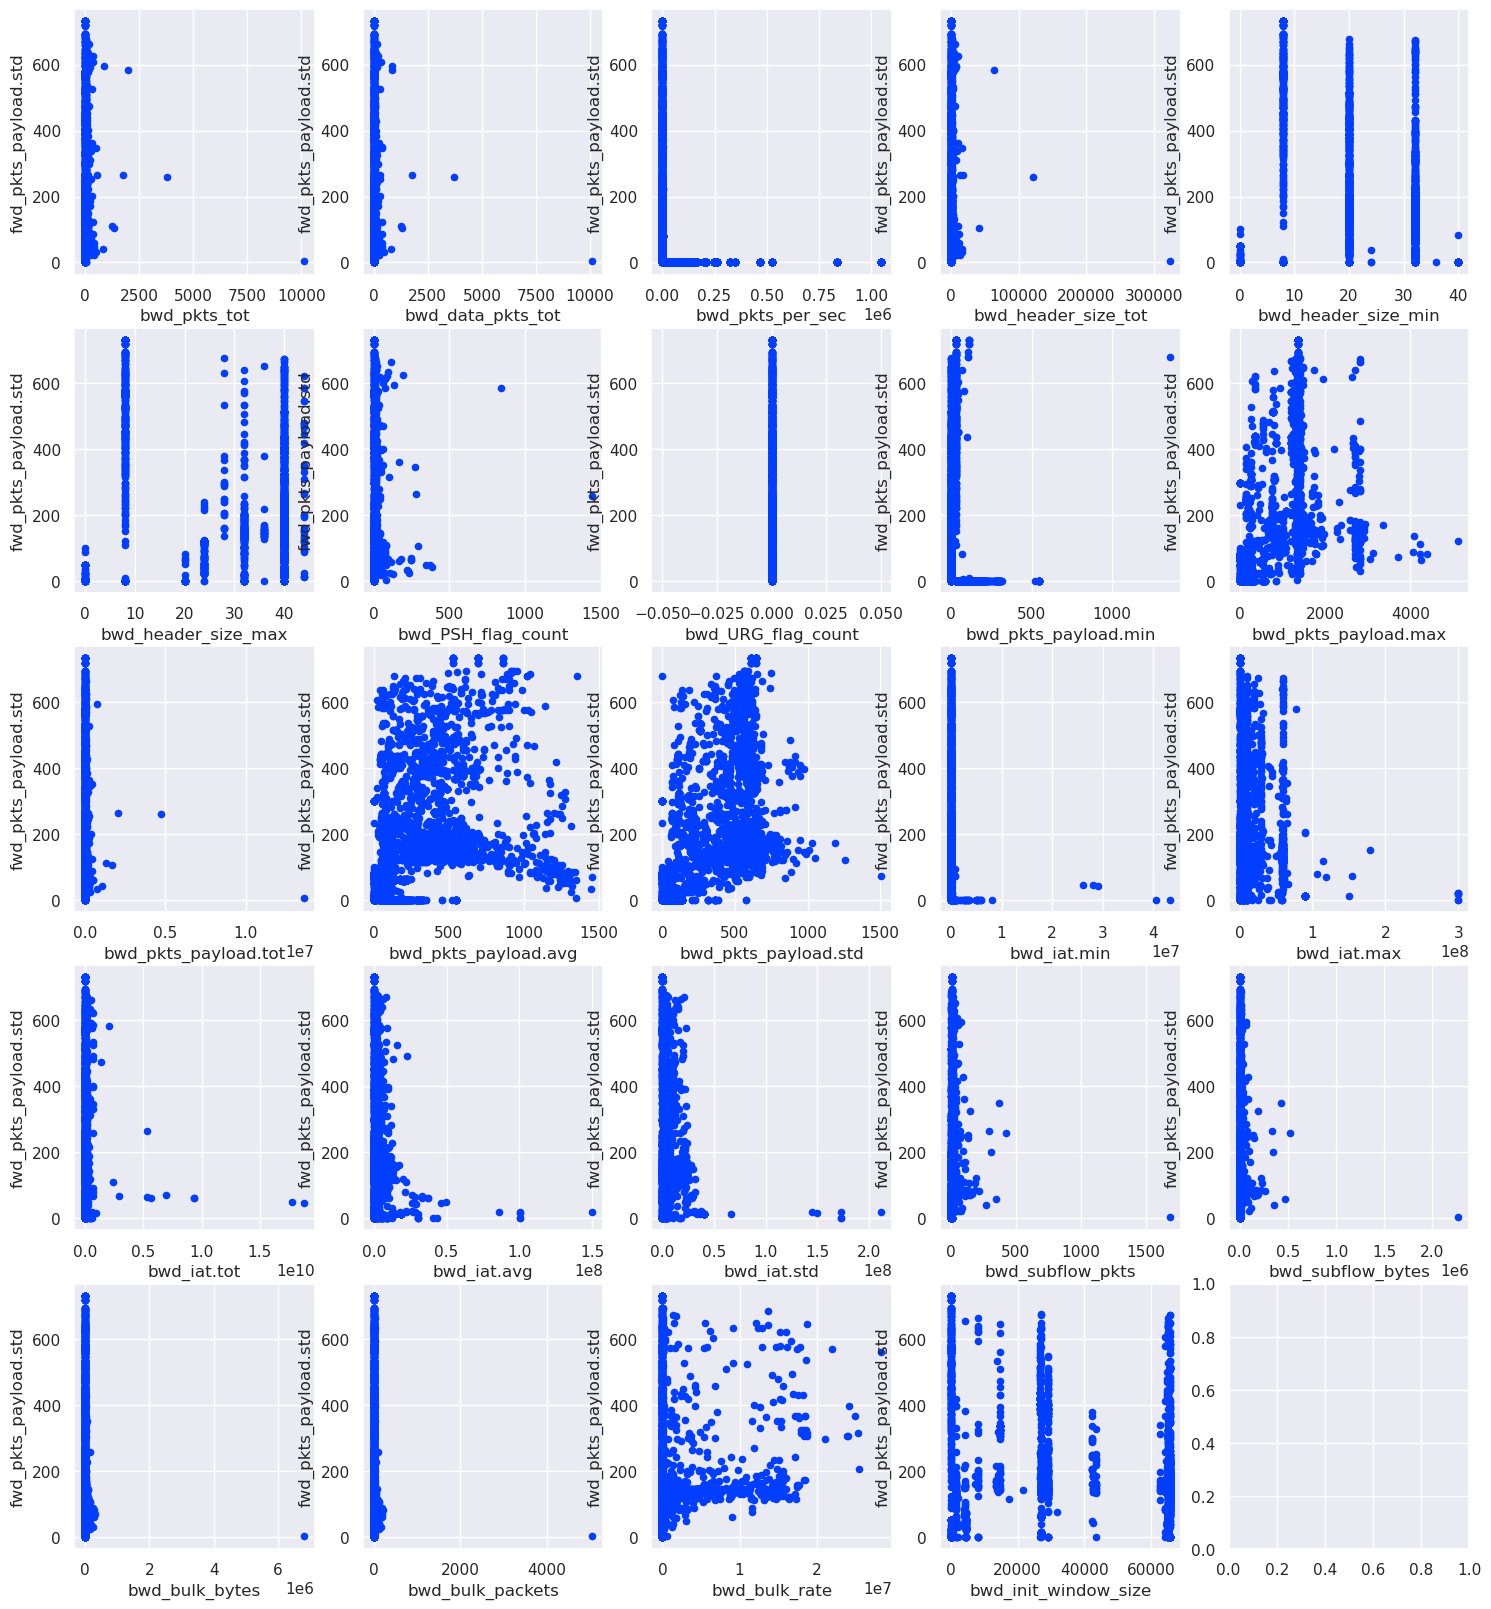

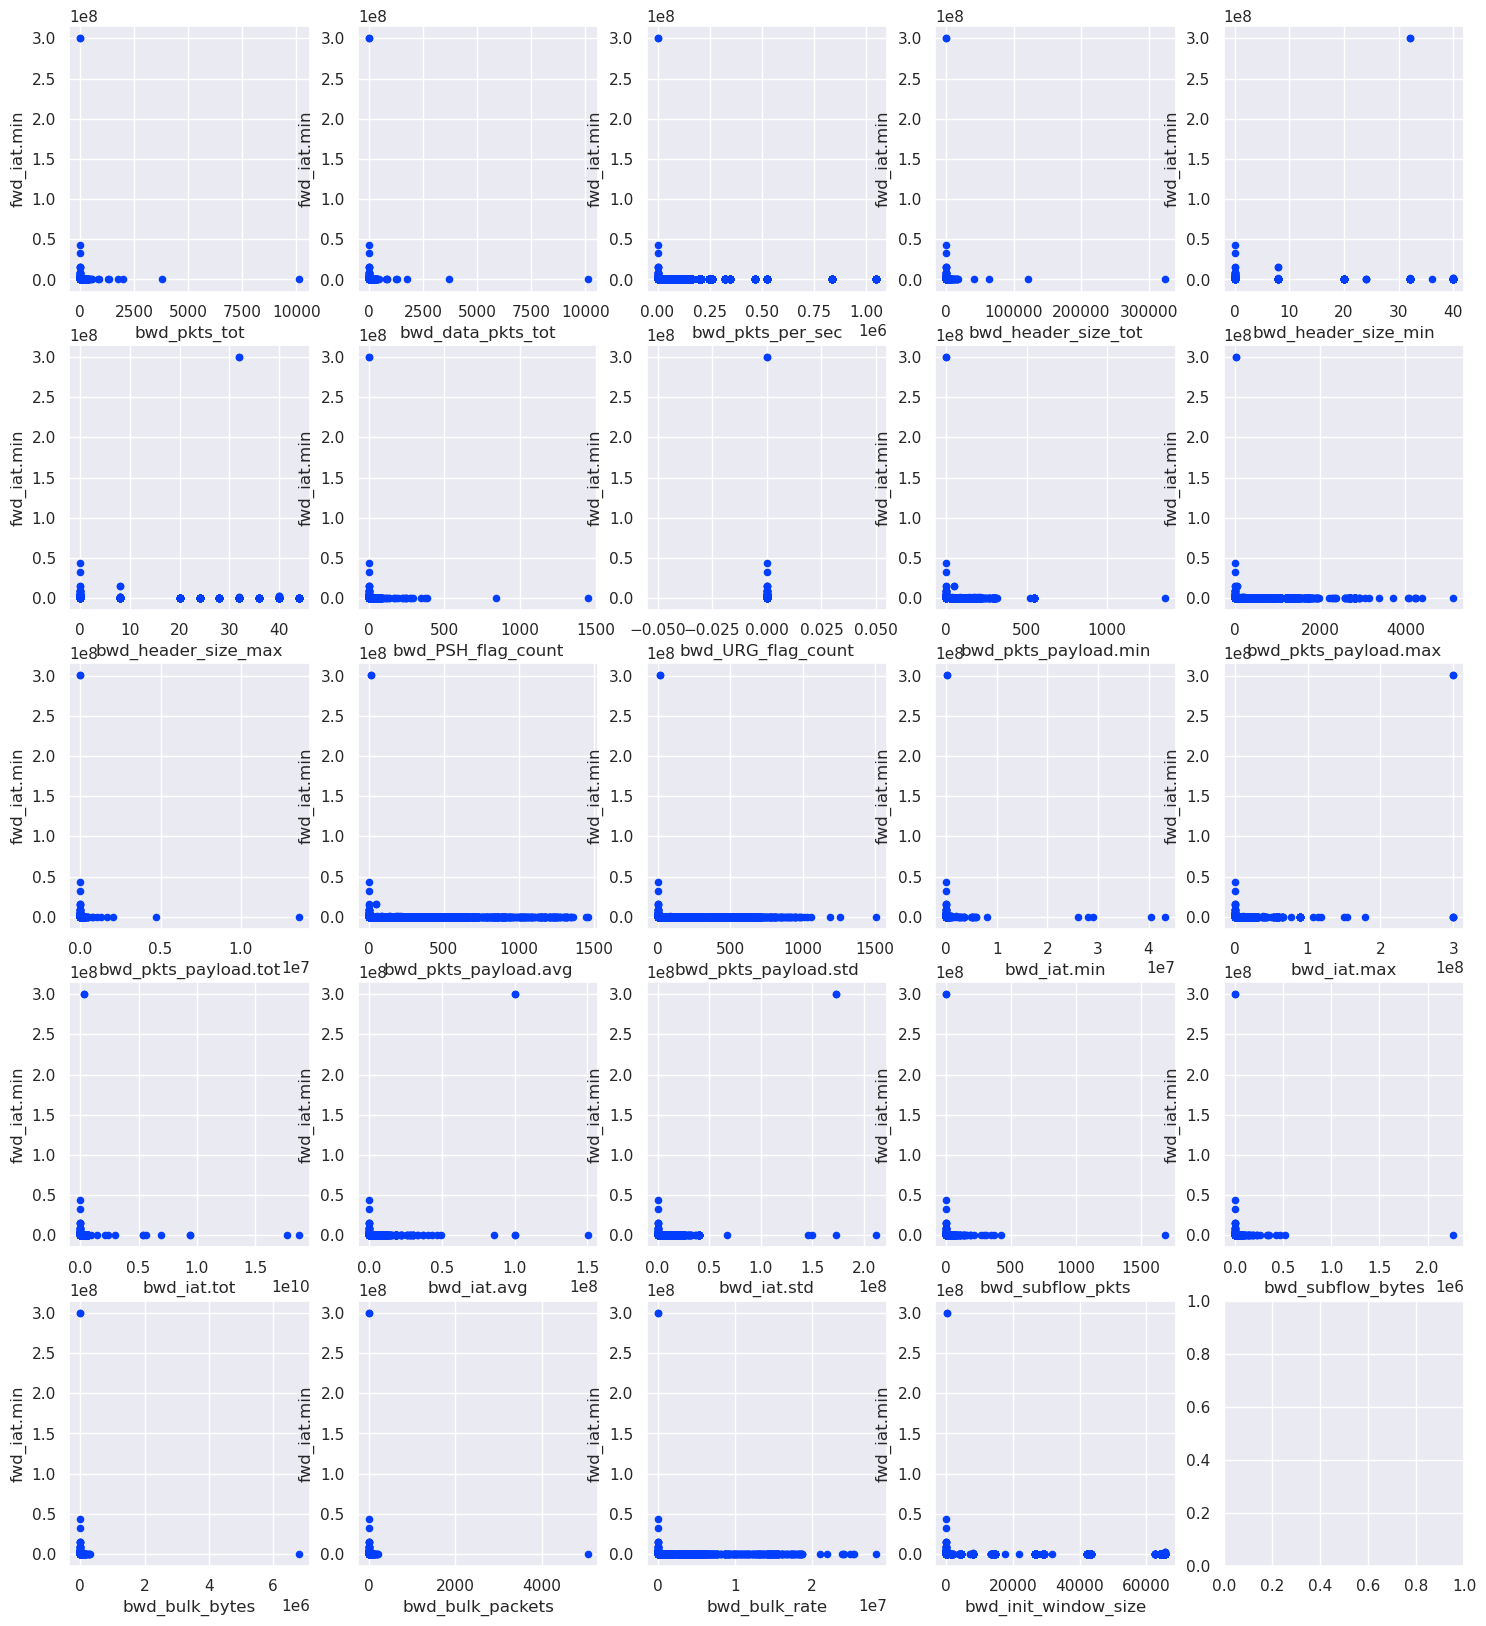

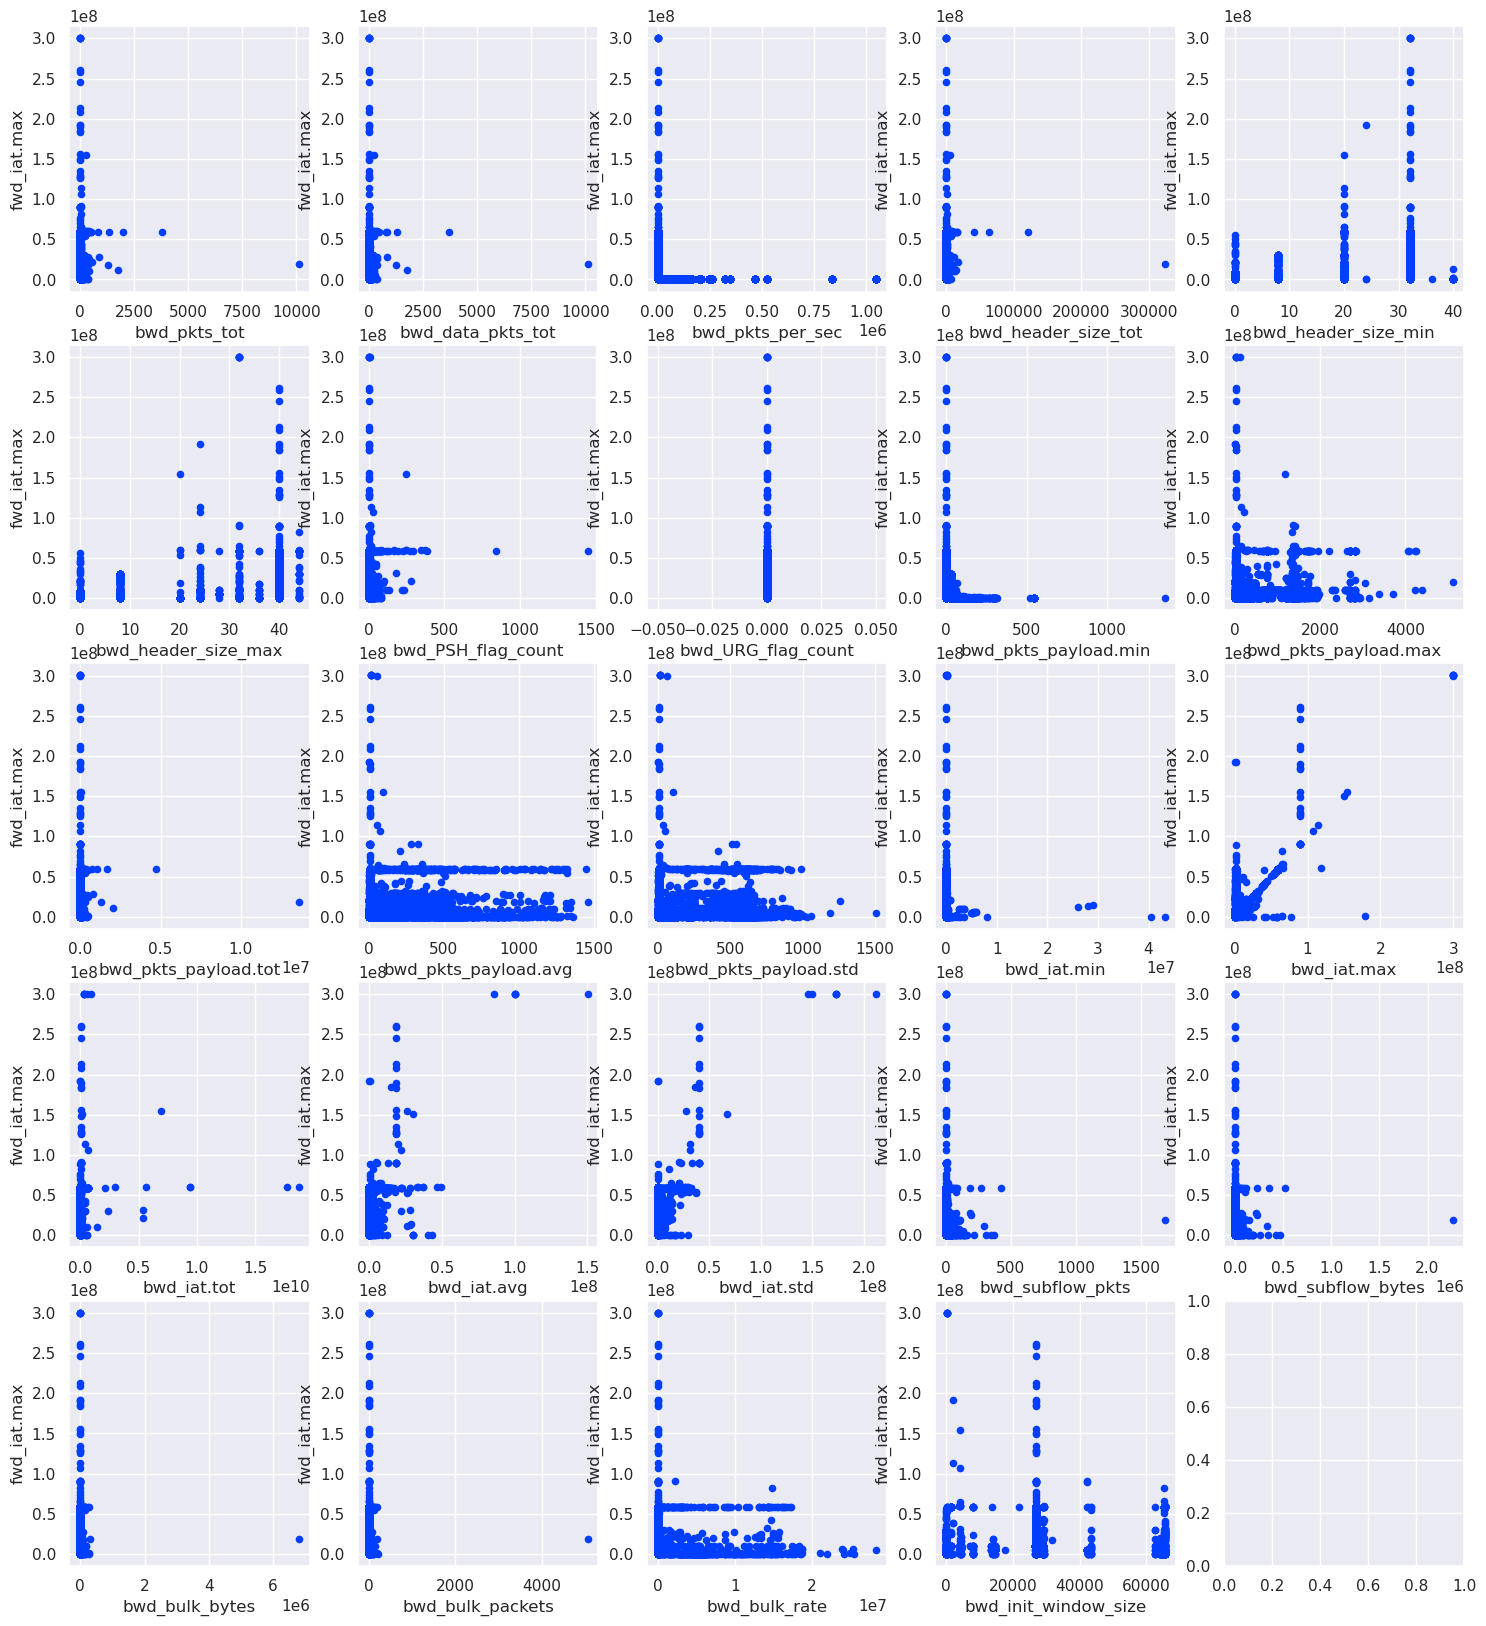

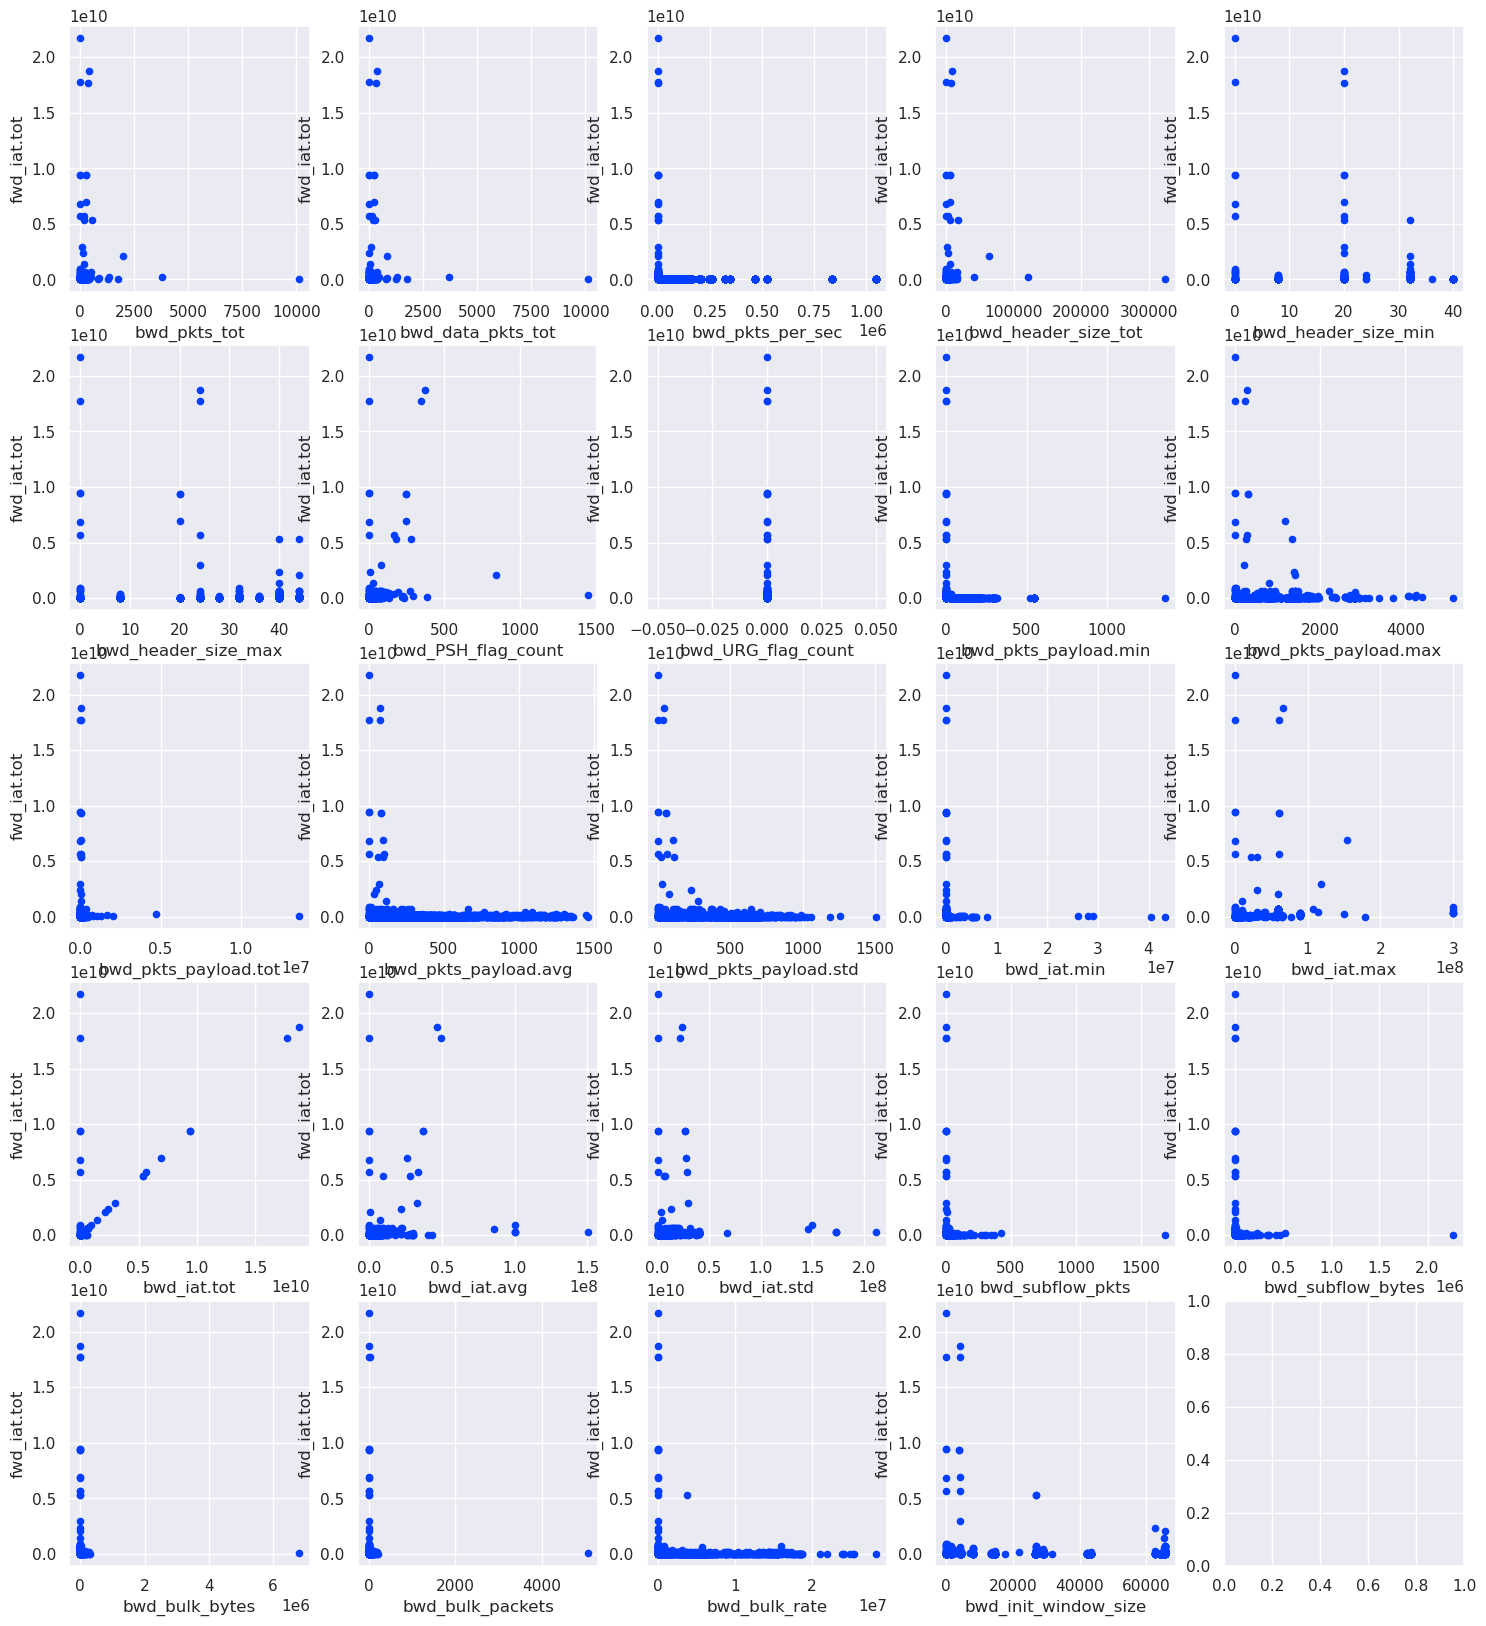

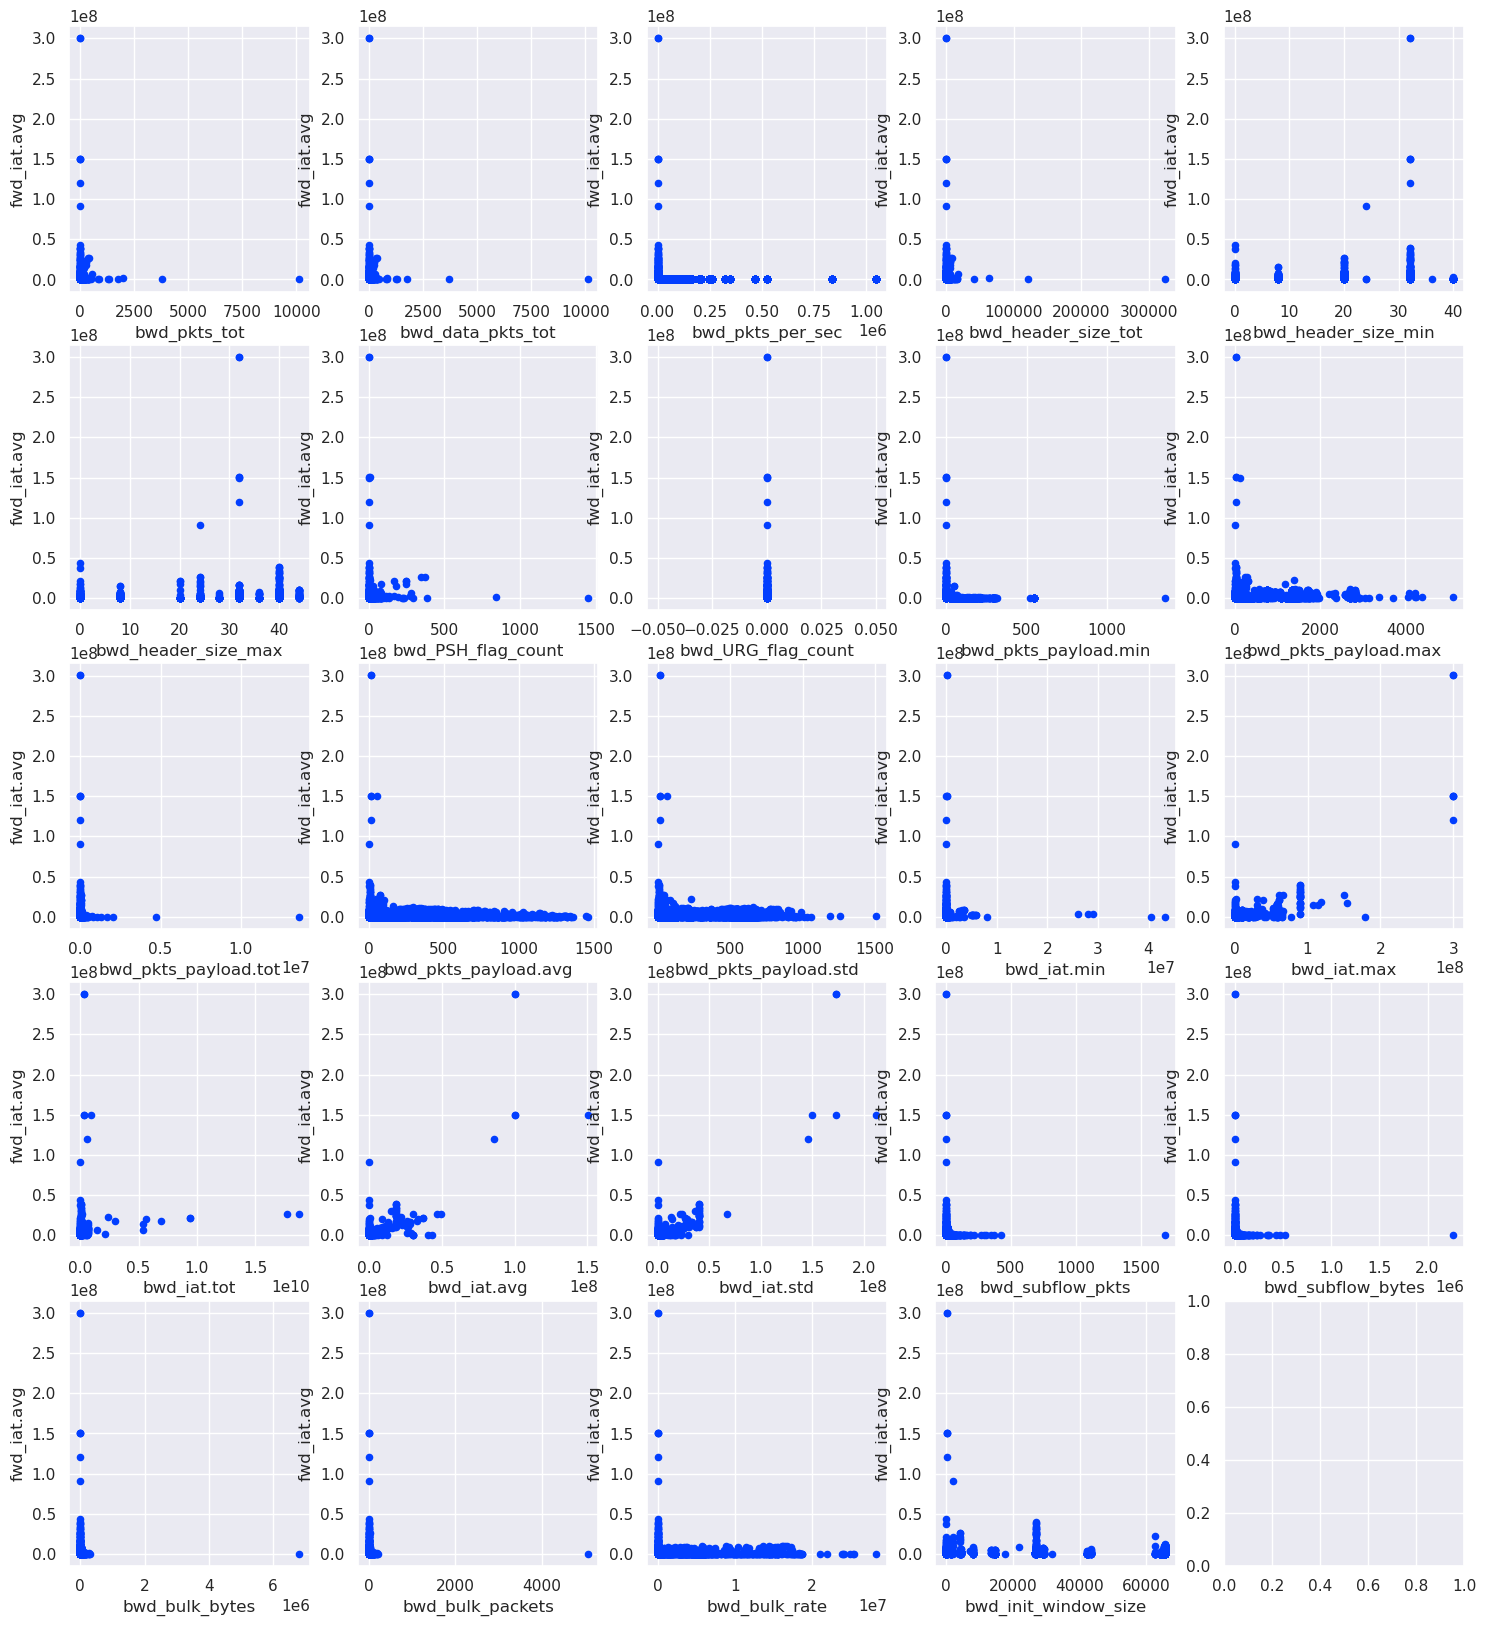

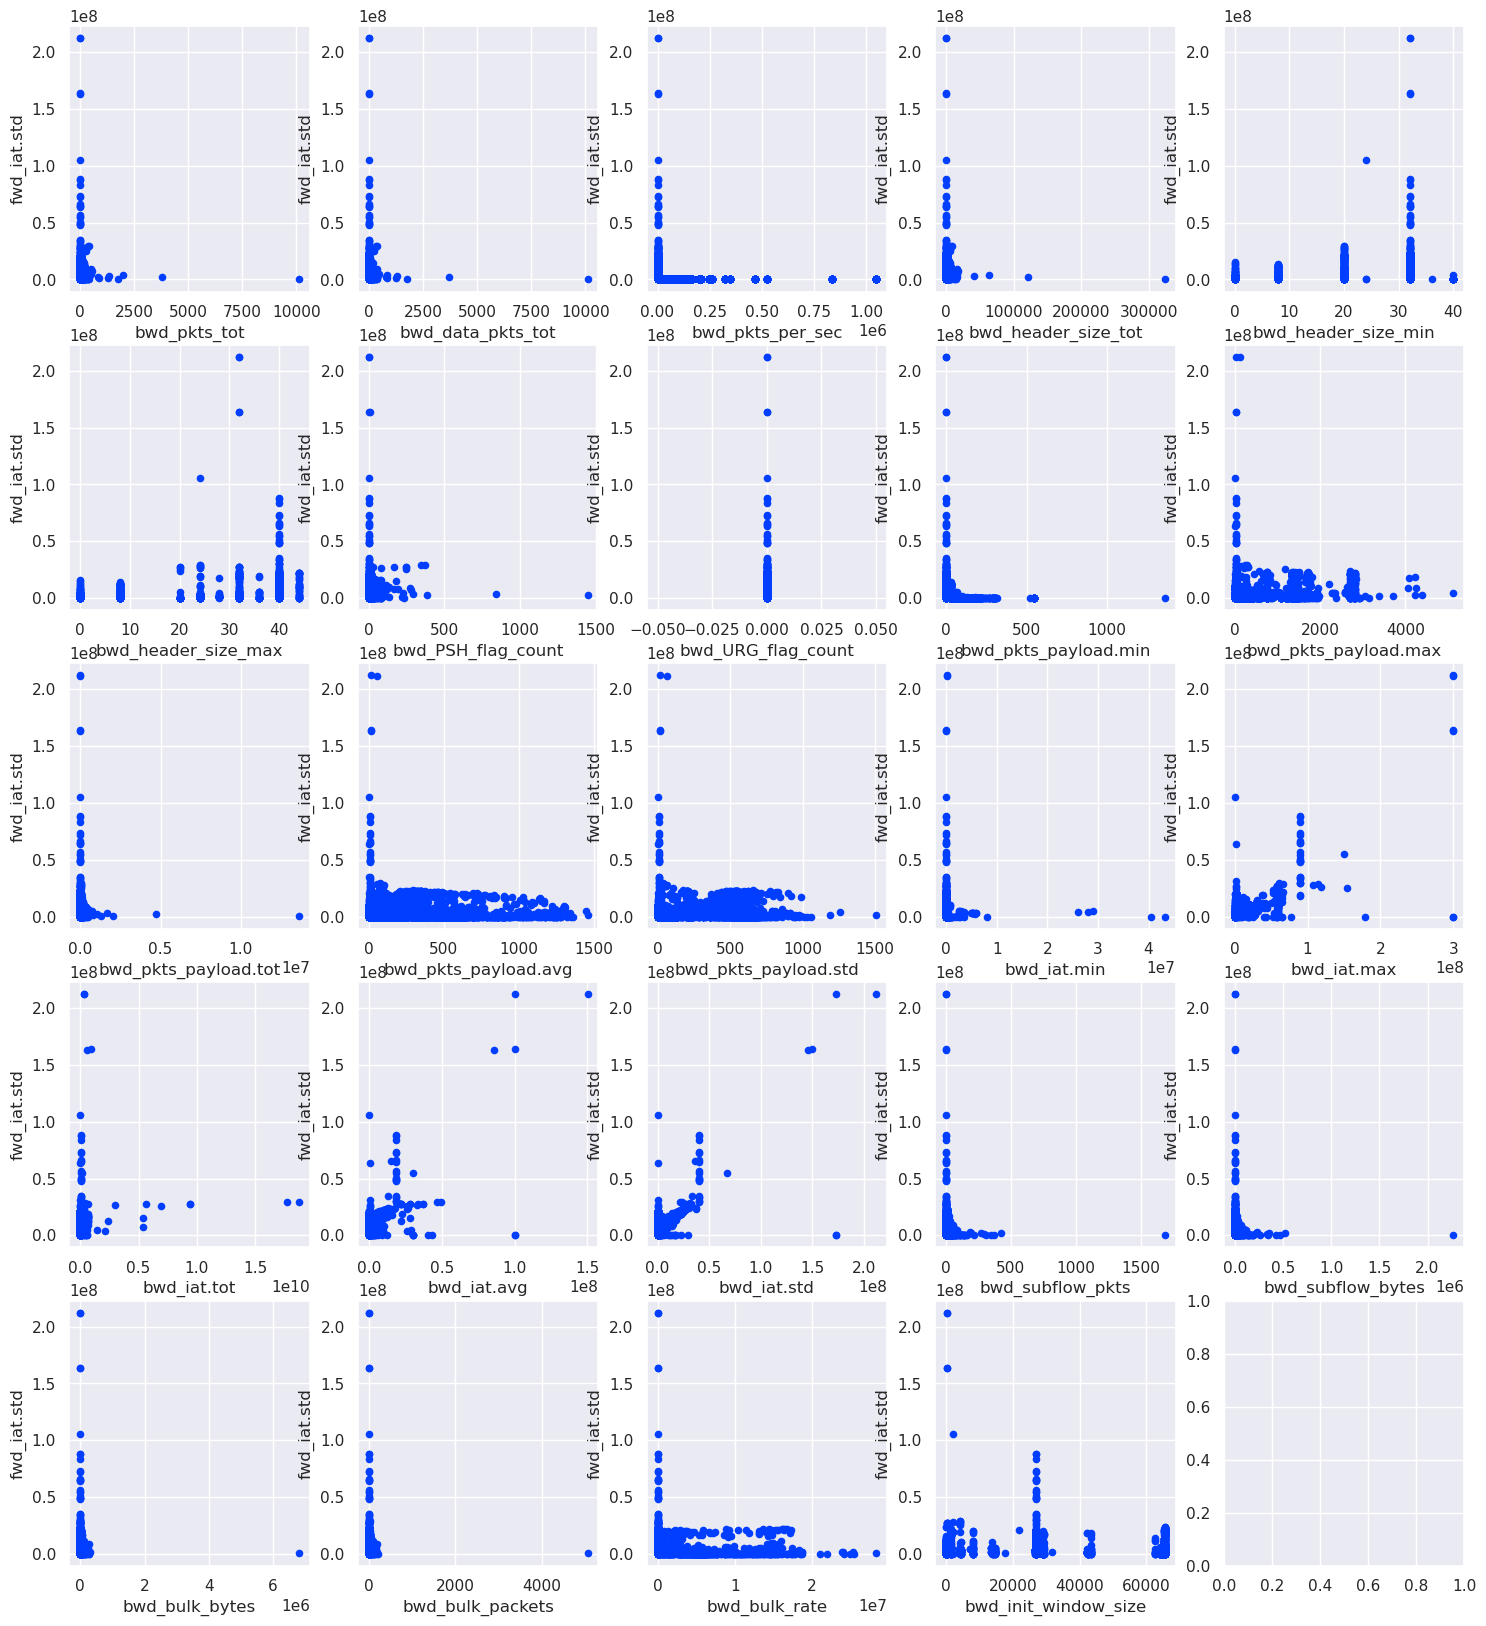

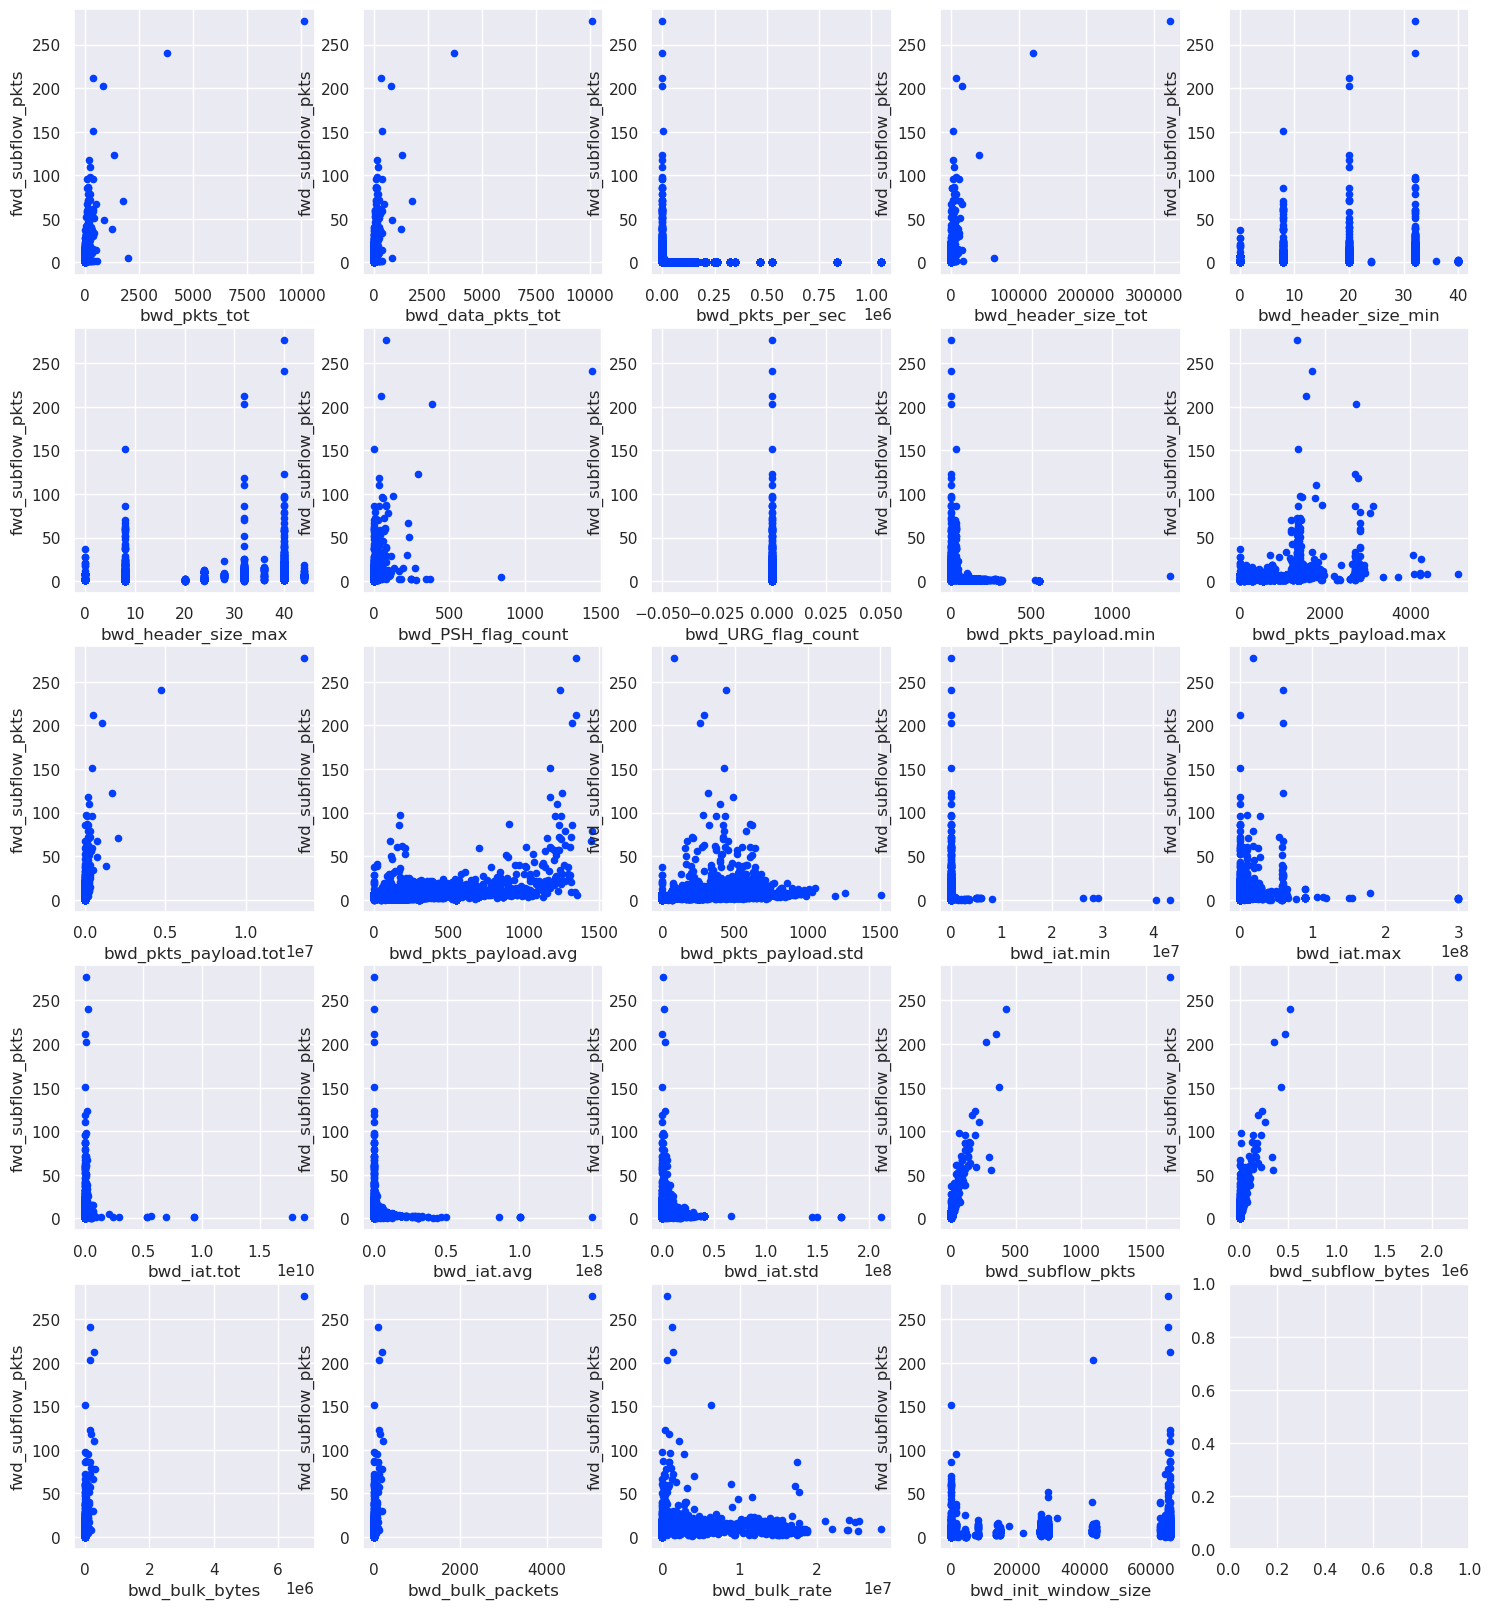

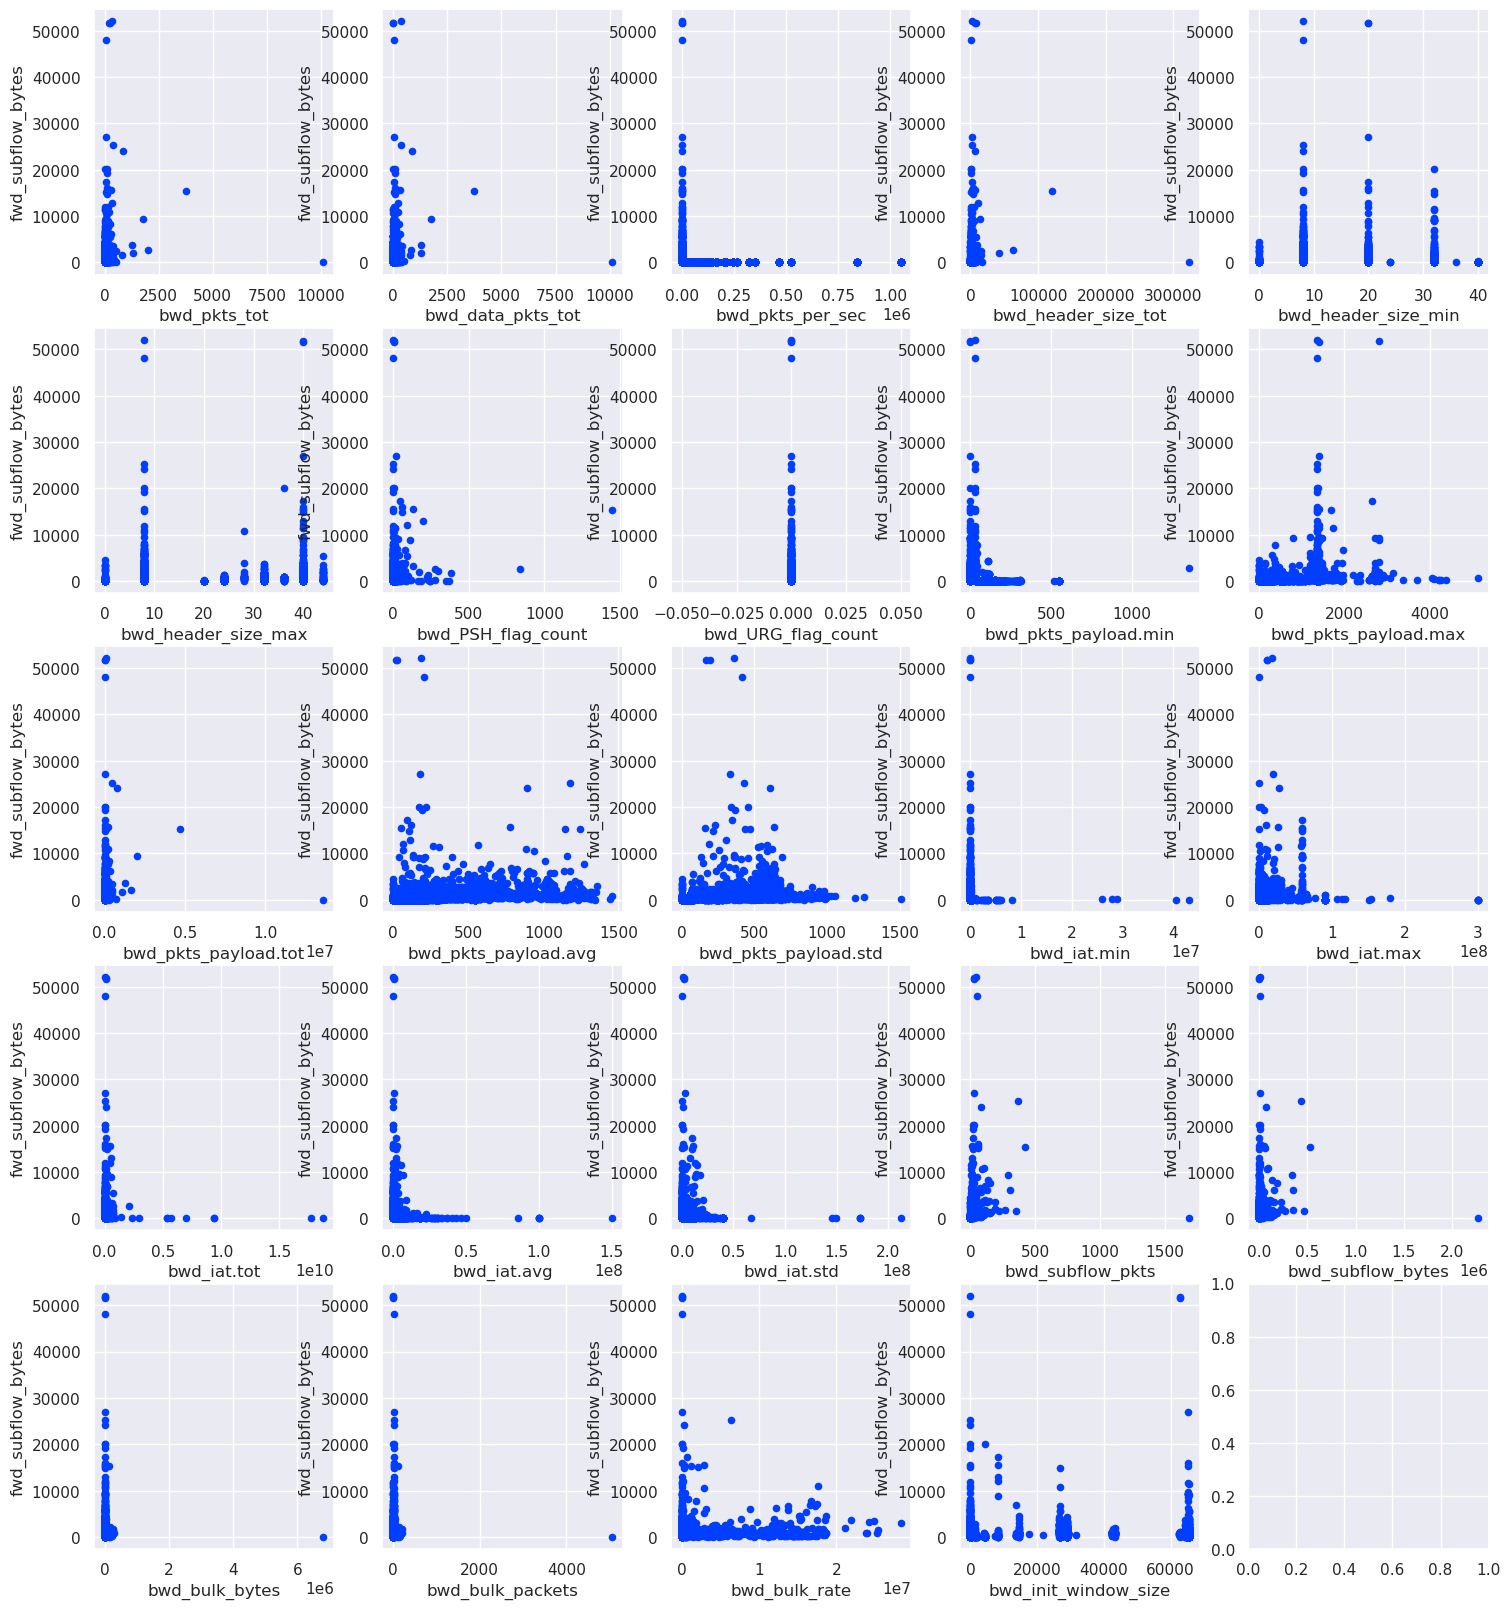

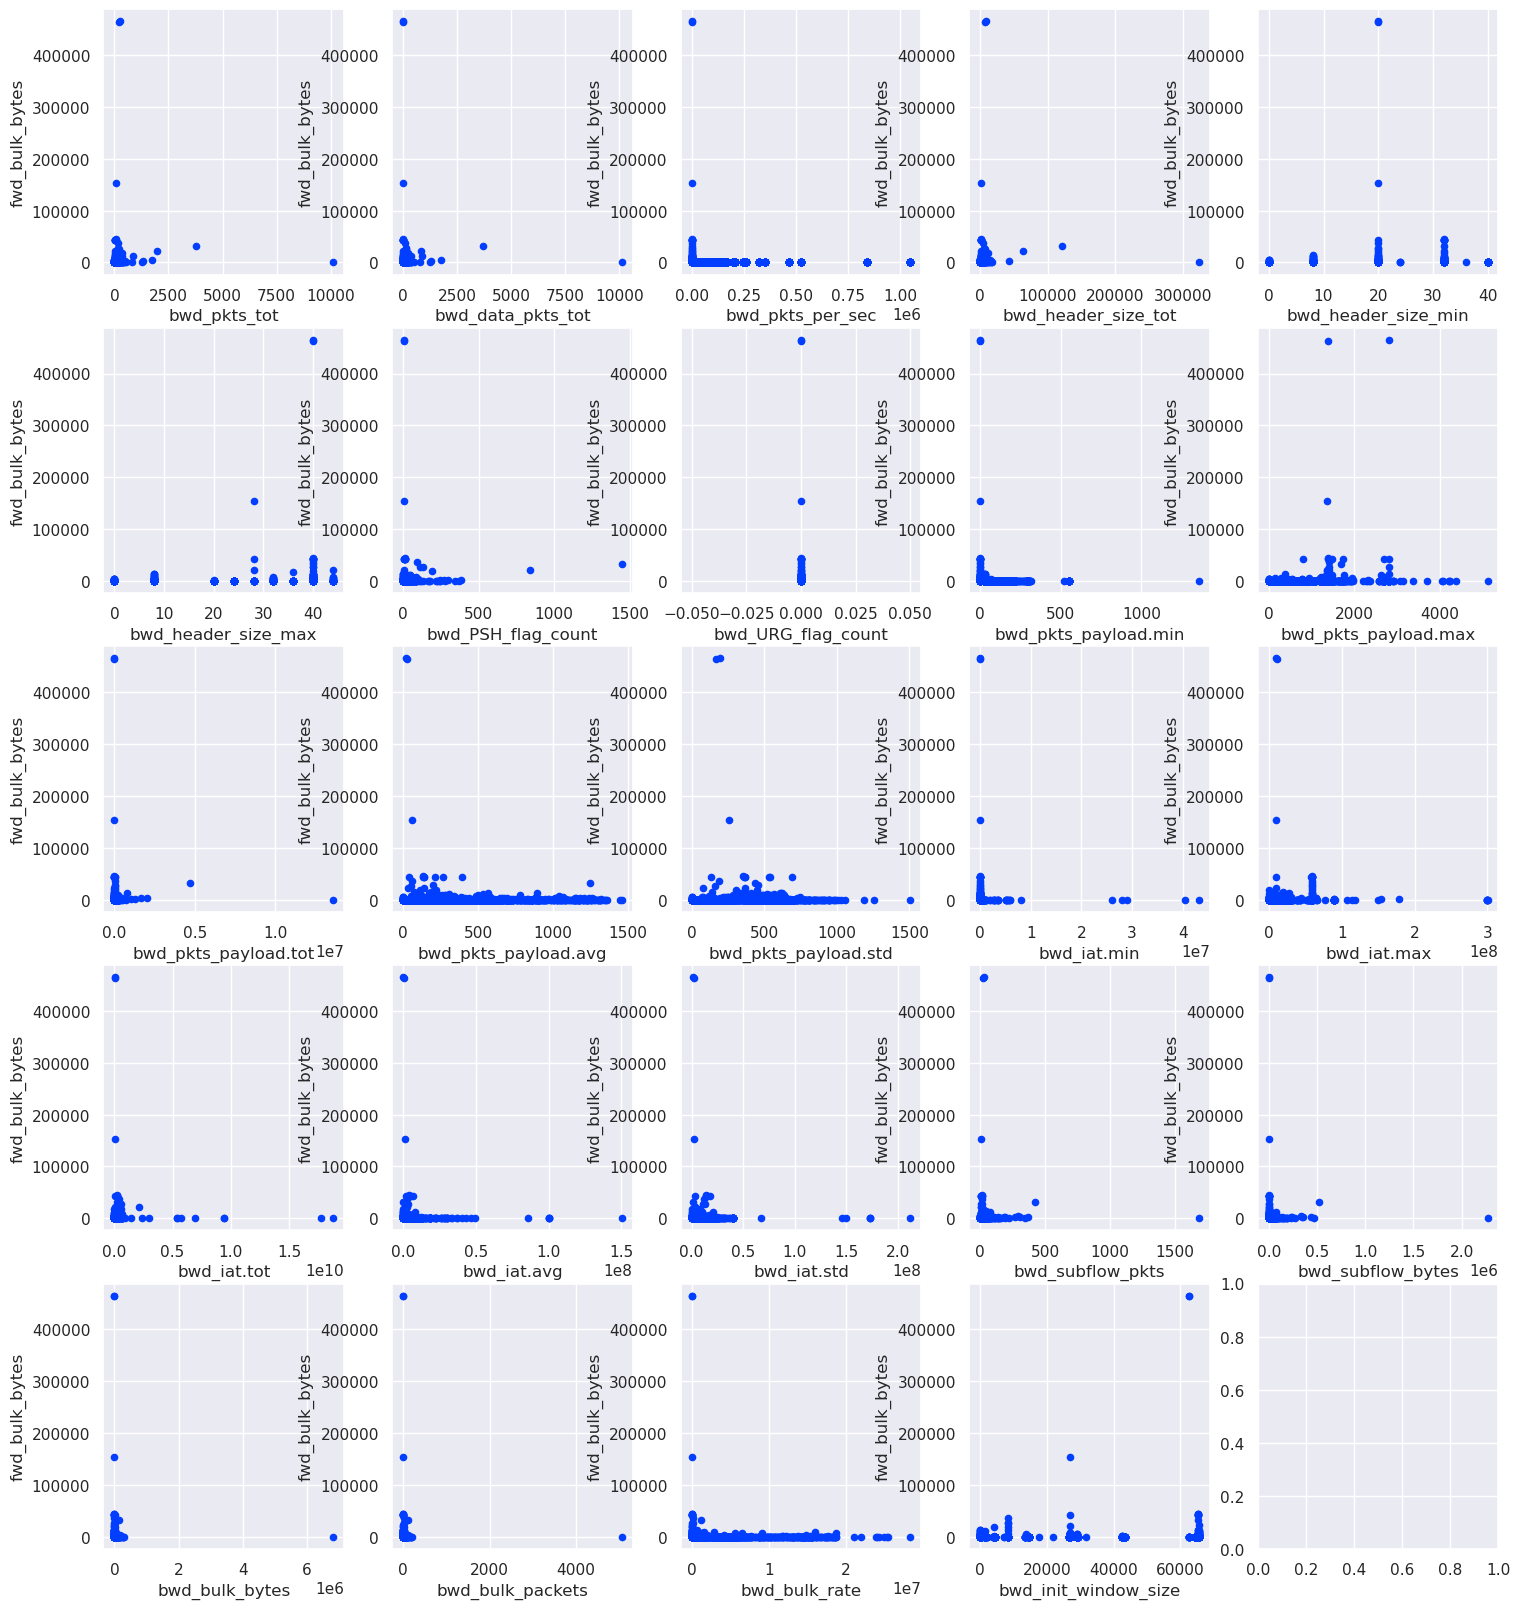

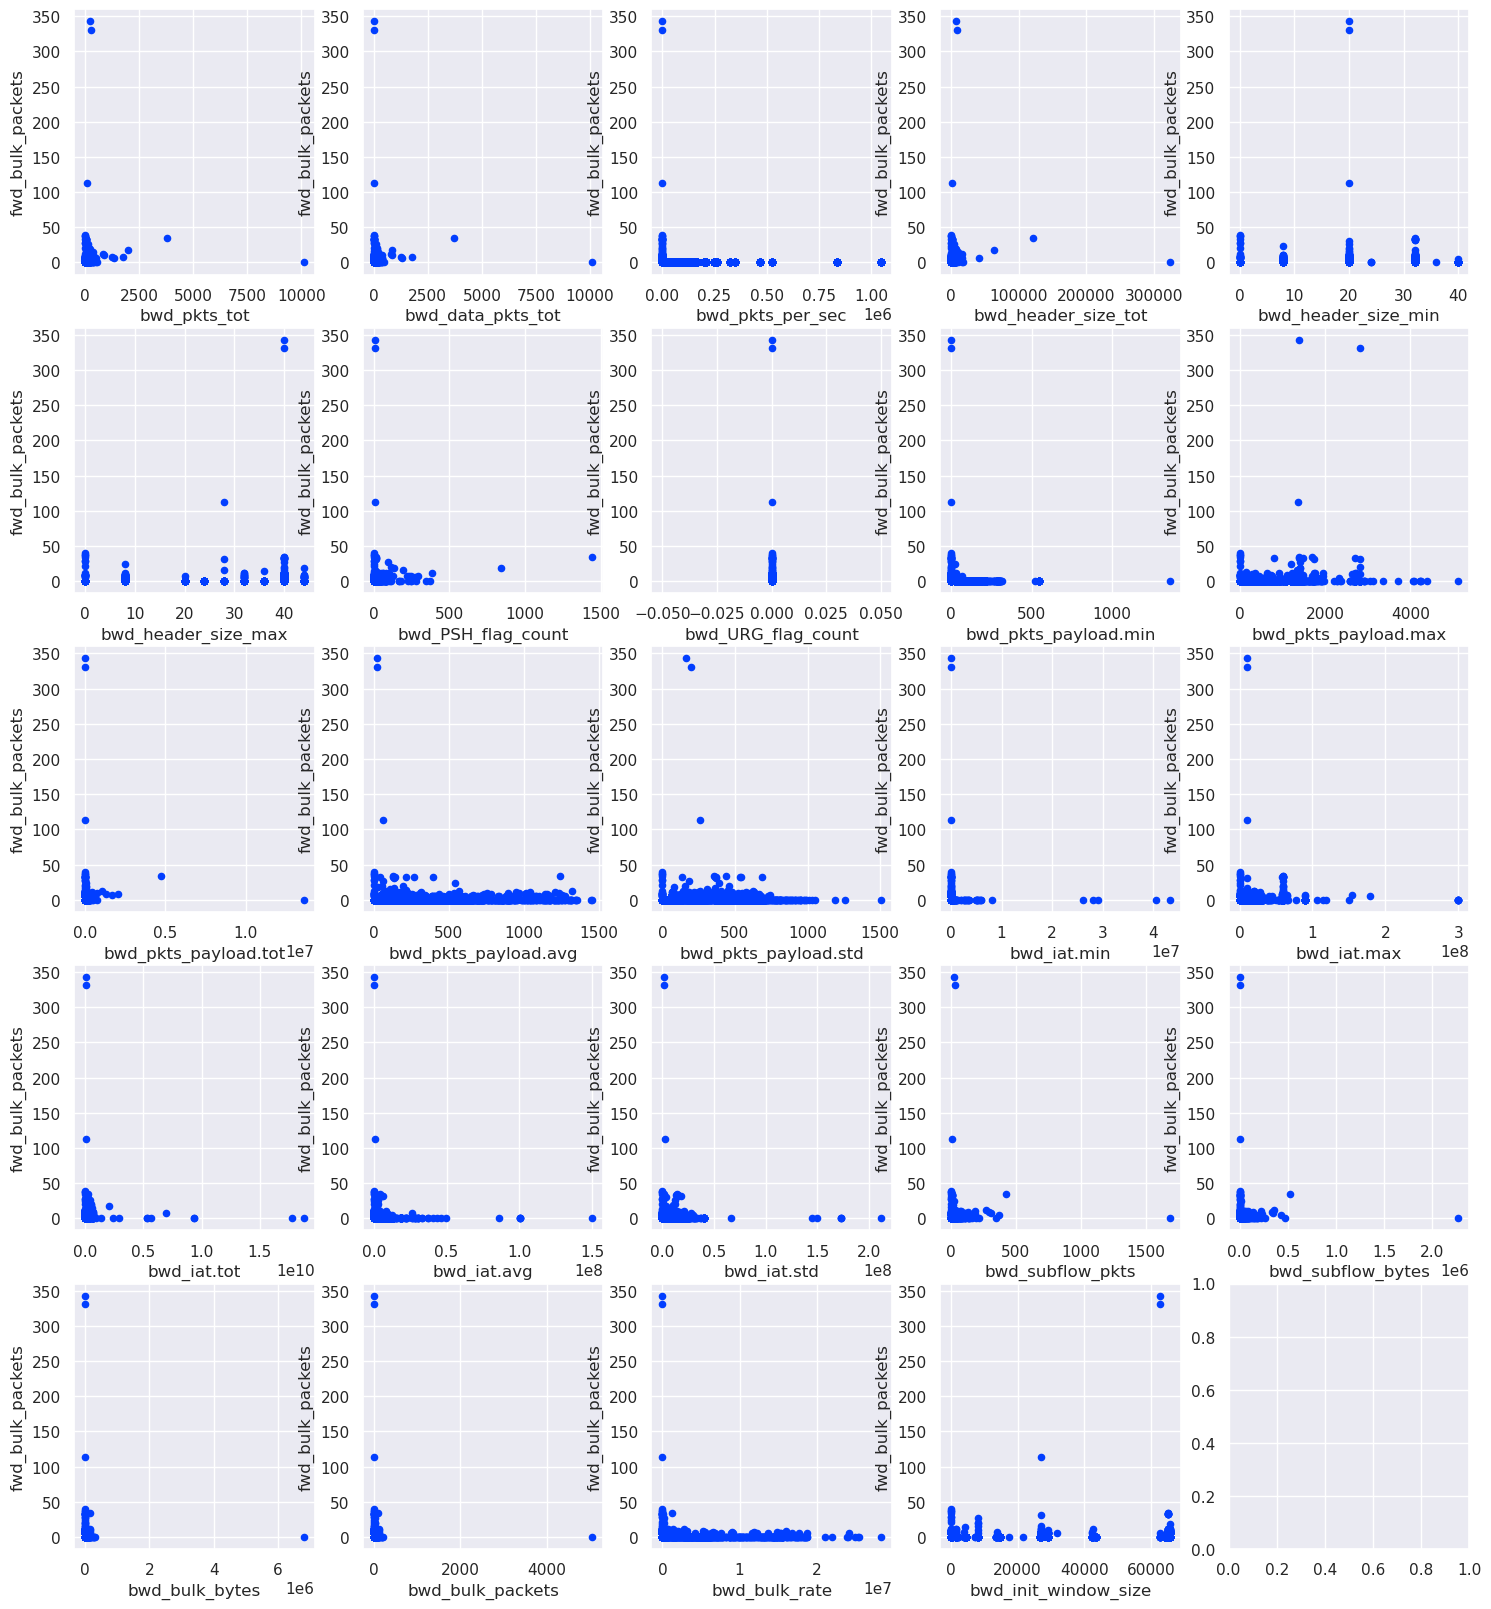

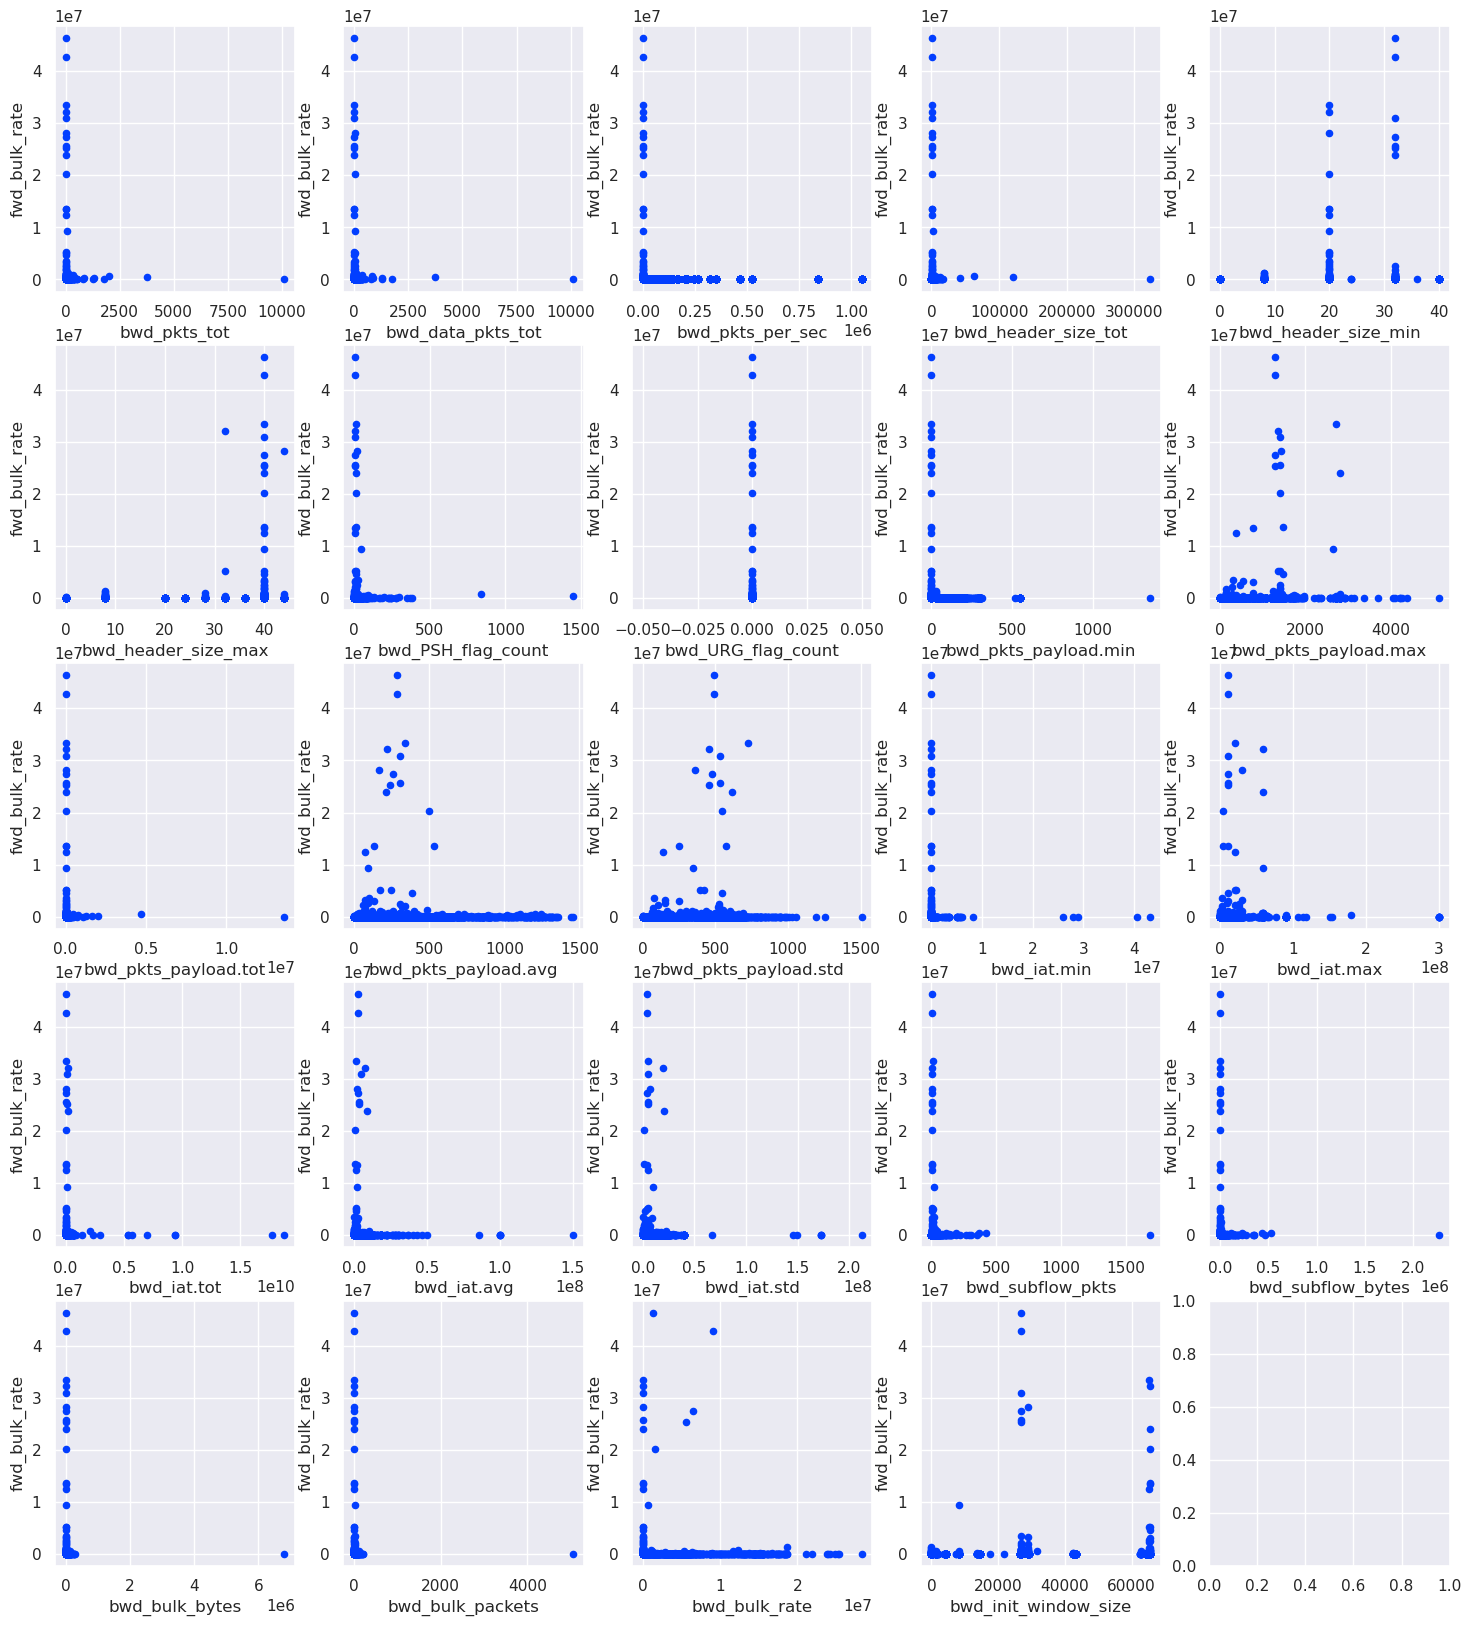

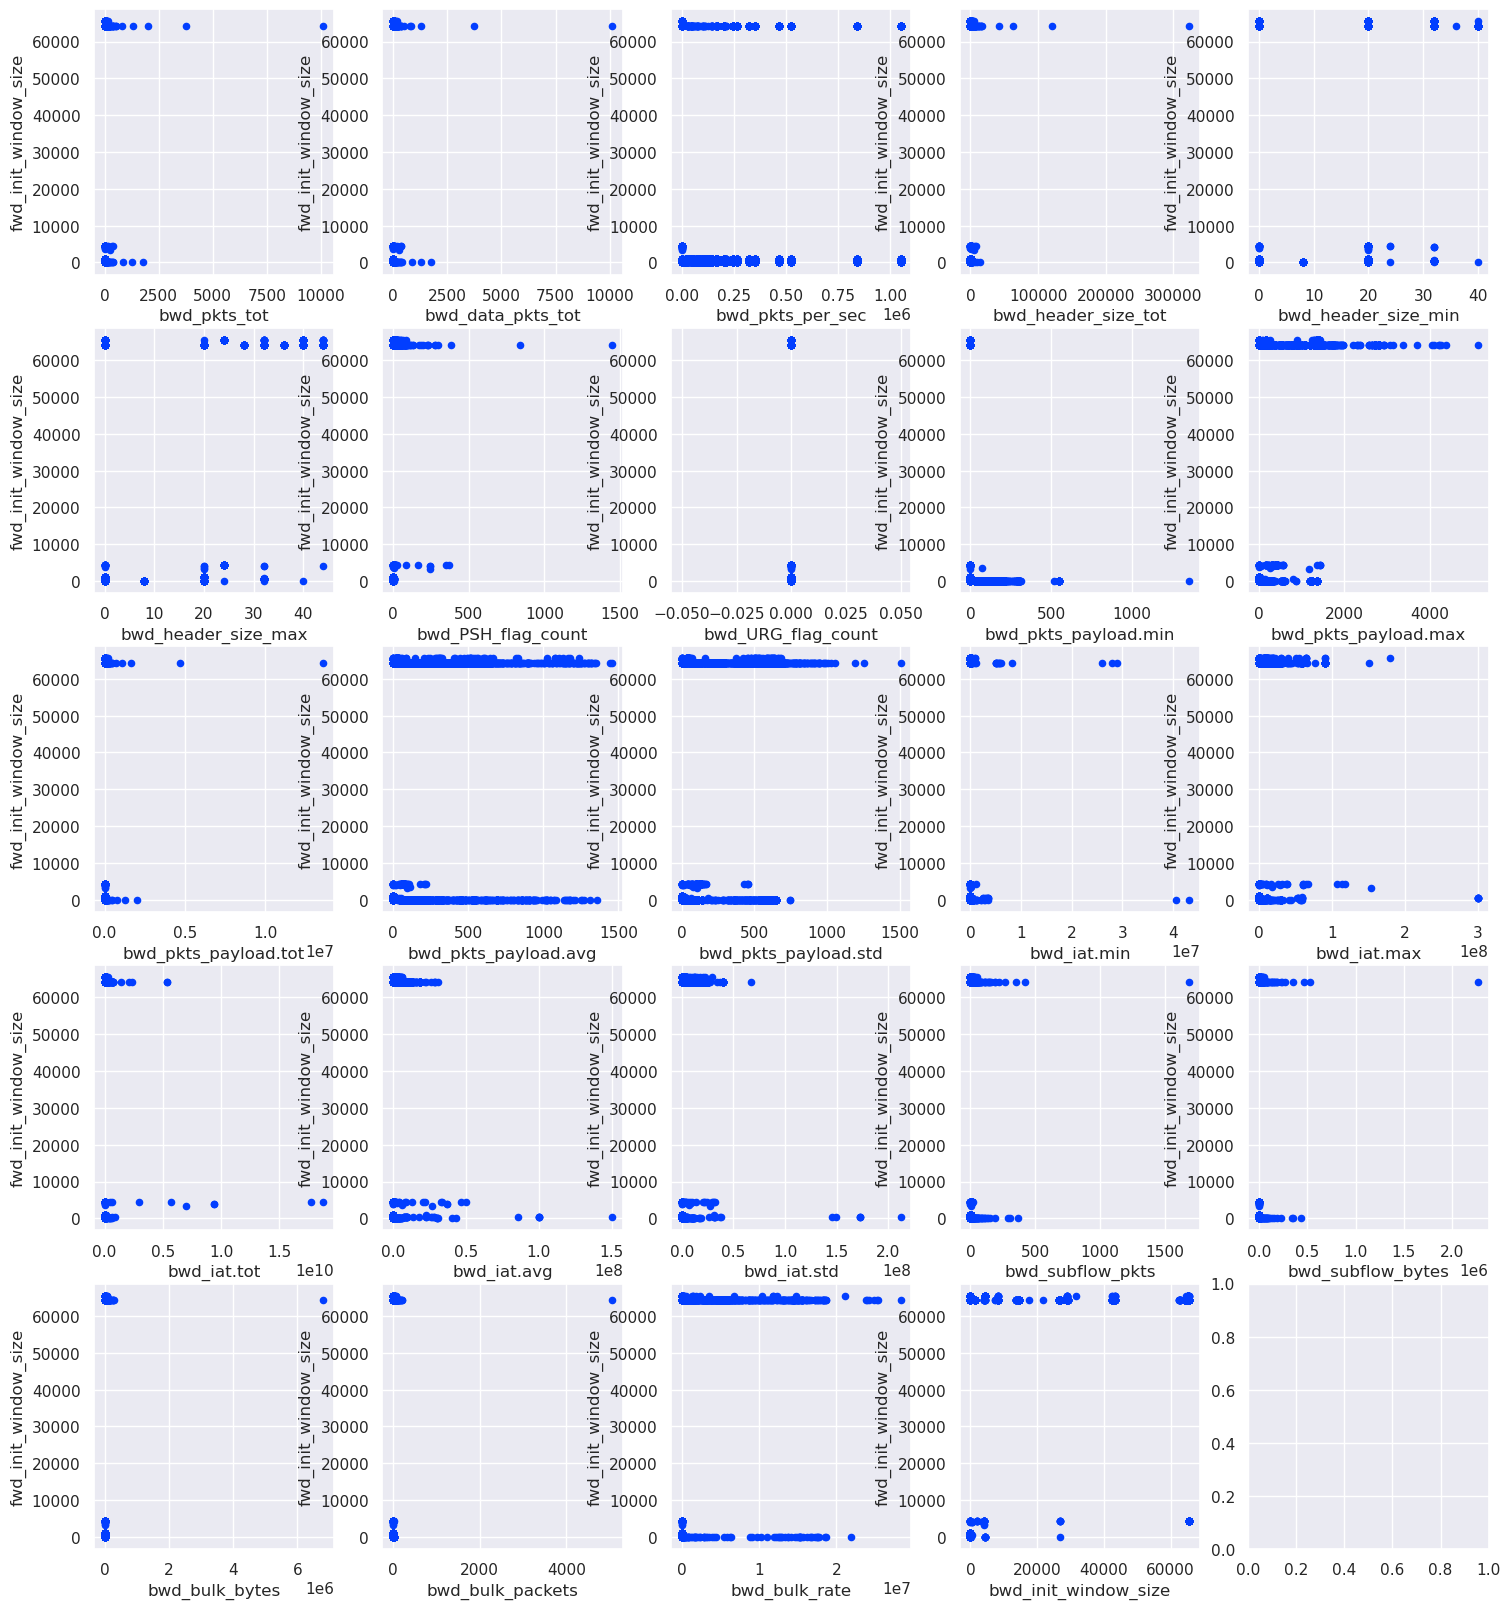

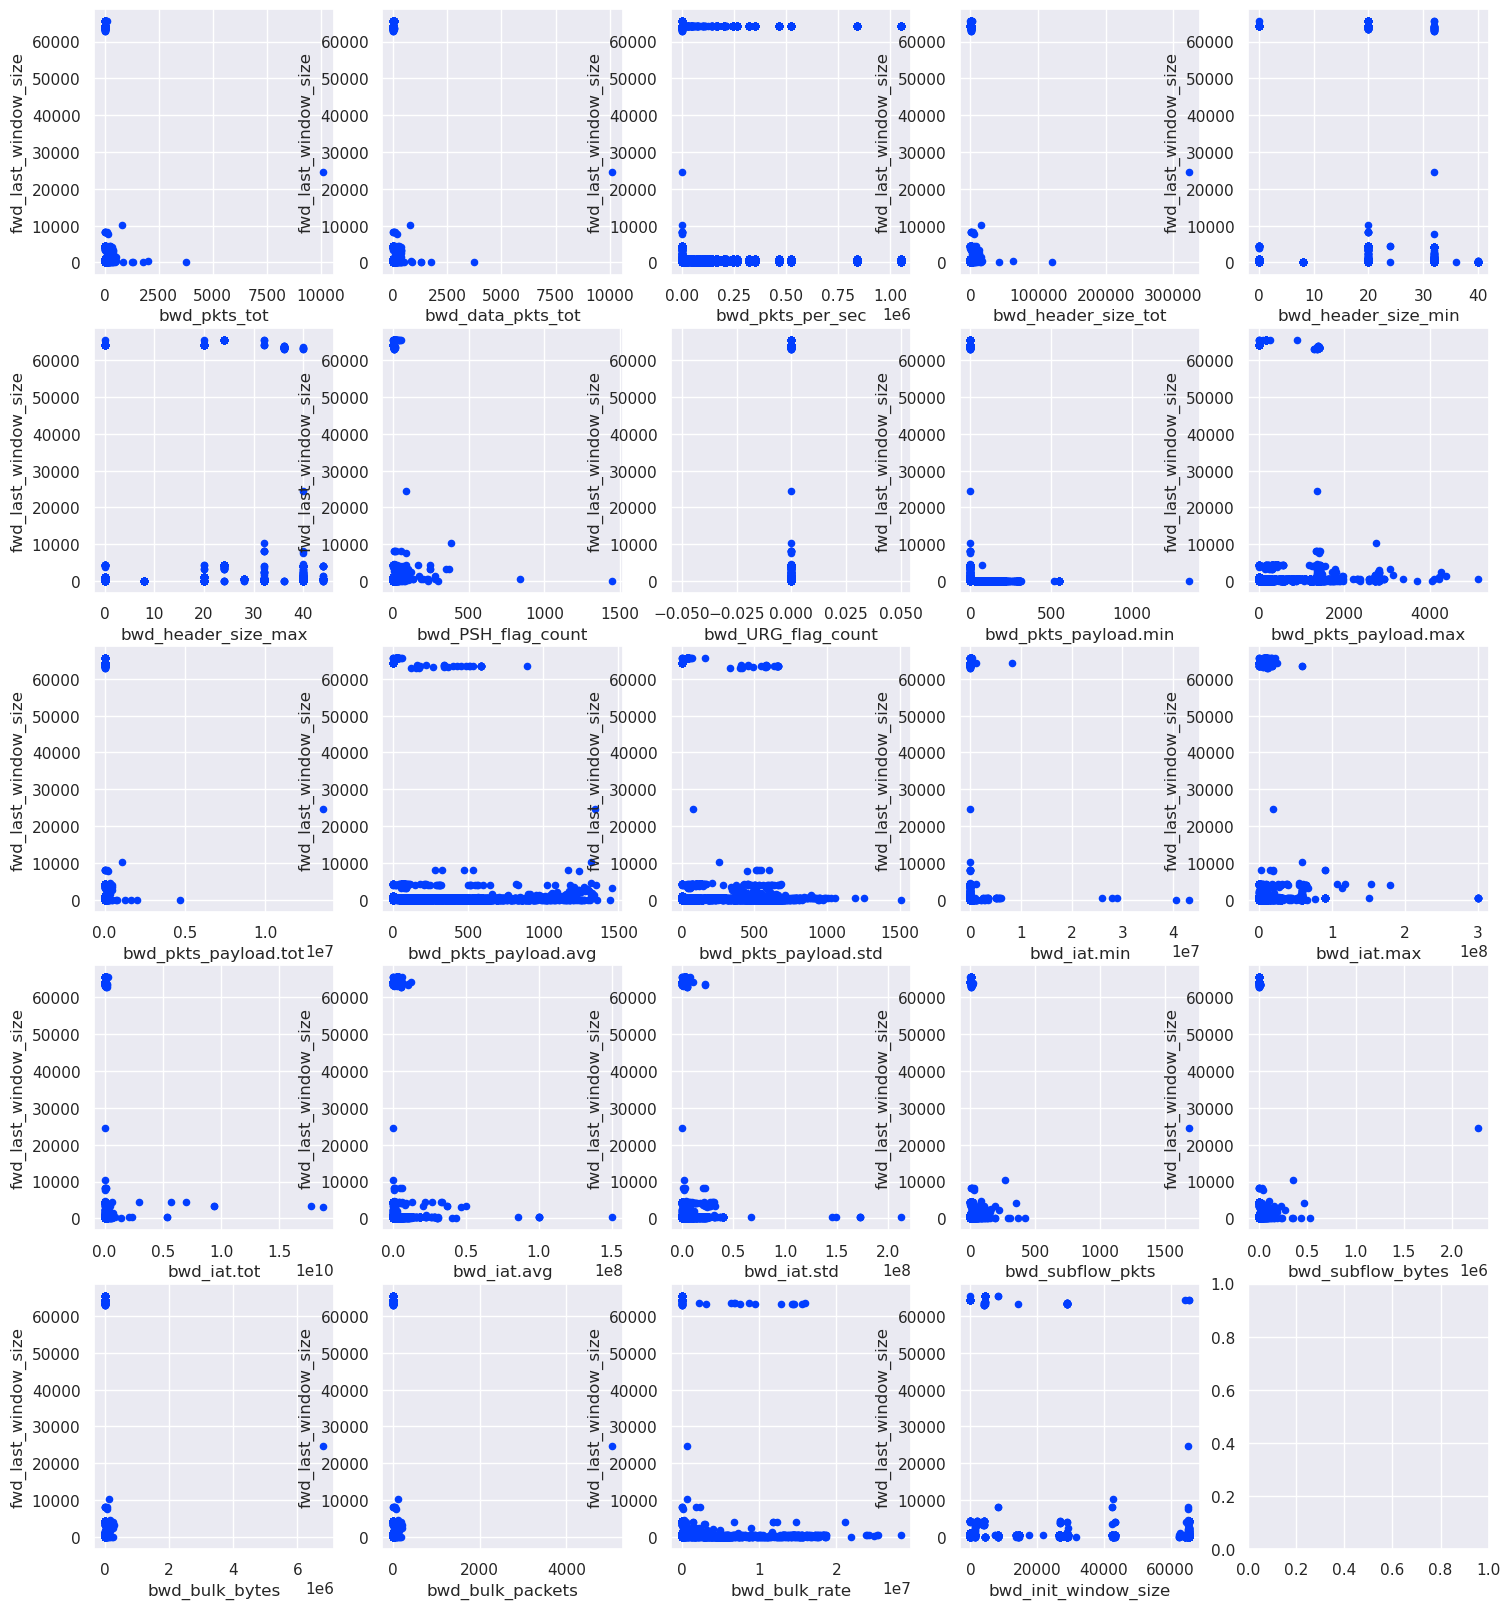

In [21]:
cols = data.filter(like="fwd").columns
rows = data.filter(like="bwd").columns
nr = len(rows)
nc = len(cols)


for c in cols:
    nr = math.ceil(len(rows)/5)
    fig, axes = plt.subplots(nrows=nr,ncols=5, figsize=(18, nr*4))

    for idx, feature in enumerate(rows):
        data.plot(feature, c, subplots=True, kind='scatter', ax=axes[idx // 5, idx % 5])